In [1]:
#importing modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading dataset
!pip install wget

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [3]:
!pip install tpot

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
from sklearn.model_selection import cross_validate,GridSearchCV,RandomizedSearchCV
from tpot import TPOTClassifier
from scipy.stats import randint
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics


In [5]:
a=[]
for i in ["PS1","PS2","PS3","PS4","PS5","PS6"]:
    PS=np.genfromtxt(r"C:\Users\amita\OneDrive\Desktop\jr\ml\churn prediction\Condition monitoring of hydraulic systems\dataset"+"/"+i+".txt")
    a.append(PS)
ps1,ps2,ps3,ps4,ps5,ps6=a

In [6]:
ps1.shape

(2205, 6000)

In [7]:
np.isnan(ps1).sum()

0

In [8]:
ps2

array([[125.5 , 125.39, 125.4 , ..., 125.11, 125.14, 125.1 ],
       [125.06, 125.08, 125.09, ..., 125.13, 125.09, 125.04],
       [125.13, 125.27, 125.23, ..., 124.73, 124.77, 124.88],
       ...,
       [125.41, 125.49, 125.63, ..., 125.84, 125.84, 125.94],
       [125.91, 125.73, 125.59, ..., 125.73, 125.86, 125.91],
       [125.88, 125.86, 125.84, ..., 125.77, 125.66, 125.77]])

In [9]:
ps1_arr=ps1.mean(axis=1)
ps1_arr

array([160.67349167, 160.60332   , 160.34772   , ..., 161.19212   ,
       161.20891667, 161.21712833])

In [10]:
ps2_arr=ps2.mean(axis=1)
ps2_arr

array([109.4669135 , 109.35489033, 109.15884467, ..., 109.75617433,
       109.79388383, 109.7921765 ])

In [11]:
ps3_arr=ps3.mean(axis=1)
ps3_arr


array([1.99147533, 1.97623433, 1.972224  , ..., 1.99343617, 2.00707683,
       2.00269017])

In [12]:
ps4_arr=ps4.mean(axis=1)
ps4_arr

array([ 0.        ,  0.        ,  0.        , ..., 10.19682367,
       10.19858833, 10.20312583])

In [13]:
ps5_arr=ps5.mean(axis=1)
ps5_arr

array([9.8421695 , 9.63514217, 9.53054783, ..., 9.96432917, 9.96823183,
       9.97363767])

In [14]:
ps6_arr=ps6.mean(axis=1)
ps6_arr

array([9.7280975 , 9.52948783, 9.42794883, ..., 9.8426285 , 9.84668967,
       9.85194917])

In [15]:
df=pd.DataFrame({"PS1":ps1_arr,"PS2":ps2_arr,"PS3":ps3_arr,"PS4":ps4_arr,"PS5":ps5_arr,"PS6":ps6_arr})

In [16]:
df.head()

,PS1,PS2,PS3,PS4,PS5,PS6
0,160.673492,109.466914,1.991475,0.0,9.842169,9.728098
1,160.603320,109.354890,1.976234,0.0,9.635142,9.529488
2,160.347720,109.158845,1.972224,0.0,9.530548,9.427949
3,160.188088,109.064807,1.946576,0.0,9.438827,9.337429
4,160.000472,108.931434,1.922707,0.0,9.358762,9.260636


In [17]:
eps1=np.genfromtxt(r"C:\Users\amita\OneDrive\Desktop\jr\ml\churn prediction\Condition monitoring of hydraulic systems\dataset\EPS1.txt")


In [18]:
esp1_arr=eps1.mean(axis=1)
esp1_arr

array([2538.92916667, 2531.4989    , 2519.928     , ..., 2542.72976667,
       2544.04633333, 2543.8183    ])

In [19]:
df["ESP1"]=esp1_arr

In [20]:
df.head()

,PS1,PS2,PS3,PS4,PS5,PS6,ESP1
0,160.673492,109.466914,1.991475,0.0,9.842169,9.728098,2538.929167
1,160.603320,109.354890,1.976234,0.0,9.635142,9.529488,2531.498900
2,160.347720,109.158845,1.972224,0.0,9.530548,9.427949,2519.928000
3,160.188088,109.064807,1.946576,0.0,9.438827,9.337429,2511.541633
4,160.000472,108.931434,1.922707,0.0,9.358762,9.260636,2503.449500


In [21]:
a=[]
for i in ["FS1","FS2"]:
    FS=np.genfromtxt(r"C:\Users\amita\OneDrive\Desktop\jr\ml\churn prediction\Condition monitoring of hydraulic systems\dataset"+"/"+i+".txt")
    a.append(FS)
fs1,fs2=a


In [22]:
fs1_arr=fs1.mean(axis=1)
fs1_arr

array([6.709815  , 6.715315  , 6.71852167, ..., 6.69327667, 6.68412833,
       6.69230167])

In [23]:
fs2_arr=fs2.mean(axis=1)
fs2_arr

array([10.30459167, 10.40309833, 10.36625   , ..., 10.17617167,
       10.17835333, 10.18339333])

In [24]:
df["FS1"]=fs1_arr
df["FS2"]=fs2_arr

In [25]:
df.head()

,PS1,PS2,PS3,PS4,PS5,PS6,ESP1,FS1,FS2
0,160.673492,109.466914,1.991475,0.0,9.842169,9.728098,2538.929167,6.709815,10.304592
1,160.603320,109.354890,1.976234,0.0,9.635142,9.529488,2531.498900,6.715315,10.403098
2,160.347720,109.158845,1.972224,0.0,9.530548,9.427949,2519.928000,6.718522,10.366250
3,160.188088,109.064807,1.946576,0.0,9.438827,9.337429,2511.541633,6.720565,10.302678
4,160.000472,108.931434,1.922707,0.0,9.358762,9.260636,2503.449500,6.690308,10.237750


In [26]:
df.shape

(2205, 9)

In [27]:
a=[]
for i in ["TS1","TS2","TS3","TS4"]:
    TS=np.genfromtxt(r"C:\Users\amita\OneDrive\Desktop\jr\ml\churn prediction\Condition monitoring of hydraulic systems\dataset"+"/"+i+".txt")
    a.append(TS)
ts1,ts2,ts3,ts4=a


In [28]:
ts1_arr=ts1.mean(axis=1)
ts1_arr

array([35.62198333, 36.67696667, 37.8808    , ..., 35.31918333,
       35.32476667, 35.32223333])

In [29]:
ts2_arr=ts2.mean(axis=1)
ts2_arr

array([40.97876667, 41.53276667, 42.44245   , ..., 40.87595   ,
       40.87606667, 40.8594    ])

In [30]:
ts3_arr=ts3.mean(axis=1)
ts3_arr

array([38.47101667, 38.97896667, 39.63195   , ..., 38.24636667,
       38.24573333, 38.24891667])

In [31]:
ts4_arr=ts4.mean(axis=1)
ts4_arr

array([31.74525   , 34.49386667, 35.64615   , ..., 30.42625   ,
       30.41428333, 30.3908    ])

In [32]:
df["TS1"]=ts1_arr
df["TS2"]=ts2_arr
df["TS3"]=ts3_arr
df["TS4"]=ts4_arr

In [33]:
df.head()

,PS1,PS2,PS3,PS4,PS5,PS6,ESP1,FS1,FS2,TS1,TS2,TS3,TS4
0,160.673492,109.466914,1.991475,0.0,9.842169,9.728098,2538.929167,6.709815,10.304592,35.621983,40.978767,38.471017,31.745250
1,160.603320,109.354890,1.976234,0.0,9.635142,9.529488,2531.498900,6.715315,10.403098,36.676967,41.532767,38.978967,34.493867
2,160.347720,109.158845,1.972224,0.0,9.530548,9.427949,2519.928000,6.718522,10.366250,37.880800,42.442450,39.631950,35.646150
3,160.188088,109.064807,1.946576,0.0,9.438827,9.337429,2511.541633,6.720565,10.302678,38.879050,43.403983,40.403383,36.579467
4,160.000472,108.931434,1.922707,0.0,9.358762,9.260636,2503.449500,6.690308,10.237750,39.803917,44.332750,41.310550,37.427900


In [34]:
vs1=np.genfromtxt(r"C:\Users\amita\OneDrive\Desktop\jr\ml\churn prediction\Condition monitoring of hydraulic systems\dataset/VS1.txt")

In [35]:
vs1

array([[0.604, 0.605, 0.611, ..., 0.545, 0.535, 0.543],
       [0.59 , 0.61 , 0.626, ..., 0.533, 0.531, 0.534],
       [0.578, 0.603, 0.638, ..., 0.544, 0.53 , 0.534],
       ...,
       [0.566, 0.562, 0.561, ..., 0.512, 0.515, 0.517],
       [0.529, 0.539, 0.552, ..., 0.522, 0.52 , 0.528],
       [0.541, 0.553, 0.565, ..., 0.522, 0.522, 0.531]])

In [36]:
vs1_arr=vs1.mean(axis=1)
vs1_arr

array([0.57695   , 0.56585   , 0.57653333, ..., 0.54523333, 0.53701667,
       0.54658333])

In [37]:
df["VS1"]=vs1_arr

In [38]:
df.head()

,PS1,PS2,PS3,PS4,PS5,PS6,ESP1,FS1,FS2,TS1,TS2,TS3,TS4,VS1
0,160.673492,109.466914,1.991475,0.0,9.842169,9.728098,2538.929167,6.709815,10.304592,35.621983,40.978767,38.471017,31.745250,0.576950
1,160.603320,109.354890,1.976234,0.0,9.635142,9.529488,2531.498900,6.715315,10.403098,36.676967,41.532767,38.978967,34.493867,0.565850
2,160.347720,109.158845,1.972224,0.0,9.530548,9.427949,2519.928000,6.718522,10.366250,37.880800,42.442450,39.631950,35.646150,0.576533
3,160.188088,109.064807,1.946576,0.0,9.438827,9.337429,2511.541633,6.720565,10.302678,38.879050,43.403983,40.403383,36.579467,0.569267
4,160.000472,108.931434,1.922707,0.0,9.358762,9.260636,2503.449500,6.690308,10.237750,39.803917,44.332750,41.310550,37.427900,0.577367


In [39]:
a=[]
for i in ["CE","CP"]:
    C=np.genfromtxt(r"C:\Users\amita\OneDrive\Desktop\jr\ml\churn prediction\Condition monitoring of hydraulic systems\dataset"+"/"+i+".txt")
    a.append(C)
ce,cp=a

In [40]:
ce_arr=ce.mean(axis=1)
ce_arr

array([39.60135   , 25.78643333, 22.21823333, ..., 46.4723    ,
       46.54496667, 46.64793333])

In [41]:
cp_arr=cp.mean(axis=1)
cp_arr

array([1.86275   , 1.25555   , 1.11321667, ..., 2.1433    , 2.14848333,
       2.15705   ])

In [42]:
df["CE"]=ce_arr
df["CP"]=cp_arr

In [43]:
df.head()

,PS1,PS2,PS3,PS4,PS5,PS6,ESP1,FS1,FS2,TS1,TS2,TS3,TS4,VS1,CE,CP
0,160.673492,109.466914,1.991475,0.0,9.842169,9.728098,2538.929167,6.709815,10.304592,35.621983,40.978767,38.471017,31.745250,0.576950,39.601350,1.862750
1,160.603320,109.354890,1.976234,0.0,9.635142,9.529488,2531.498900,6.715315,10.403098,36.676967,41.532767,38.978967,34.493867,0.565850,25.786433,1.255550
2,160.347720,109.158845,1.972224,0.0,9.530548,9.427949,2519.928000,6.718522,10.366250,37.880800,42.442450,39.631950,35.646150,0.576533,22.218233,1.113217
3,160.188088,109.064807,1.946576,0.0,9.438827,9.337429,2511.541633,6.720565,10.302678,38.879050,43.403983,40.403383,36.579467,0.569267,20.459817,1.062150
4,160.000472,108.931434,1.922707,0.0,9.358762,9.260636,2503.449500,6.690308,10.237750,39.803917,44.332750,41.310550,37.427900,0.577367,19.787017,1.070467


In [44]:
se=np.genfromtxt(r"C:\Users\amita\OneDrive\Desktop\jr\ml\churn prediction\Condition monitoring of hydraulic systems\dataset\SE.txt")

In [45]:
se_arr=se.mean(axis=1)
se_arr

array([59.15718333, 59.33561667, 59.54315   , ..., 59.13235   ,
       58.9708    , 59.0539    ])

In [46]:
df["SE"]=se_arr

In [47]:
df.head()

,PS1,PS2,PS3,PS4,PS5,PS6,ESP1,FS1,FS2,TS1,TS2,TS3,TS4,VS1,CE,CP,SE
0,160.673492,109.466914,1.991475,0.0,9.842169,9.728098,2538.929167,6.709815,10.304592,35.621983,40.978767,38.471017,31.745250,0.576950,39.601350,1.862750,59.157183
1,160.603320,109.354890,1.976234,0.0,9.635142,9.529488,2531.498900,6.715315,10.403098,36.676967,41.532767,38.978967,34.493867,0.565850,25.786433,1.255550,59.335617
2,160.347720,109.158845,1.972224,0.0,9.530548,9.427949,2519.928000,6.718522,10.366250,37.880800,42.442450,39.631950,35.646150,0.576533,22.218233,1.113217,59.543150
3,160.188088,109.064807,1.946576,0.0,9.438827,9.337429,2511.541633,6.720565,10.302678,38.879050,43.403983,40.403383,36.579467,0.569267,20.459817,1.062150,59.794900
4,160.000472,108.931434,1.922707,0.0,9.358762,9.260636,2503.449500,6.690308,10.237750,39.803917,44.332750,41.310550,37.427900,0.577367,19.787017,1.070467,59.455267


In [48]:
target=np.genfromtxt(r"C:\Users\amita\OneDrive\Desktop\jr\ml\churn prediction\Condition monitoring of hydraulic systems\dataset\profile.txt")

In [49]:
target

array([[  3., 100.,   0., 130.,   1.],
       [  3., 100.,   0., 130.,   1.],
       [  3., 100.,   0., 130.,   1.],
       ...,
       [100., 100.,   0.,  90.,   0.],
       [100., 100.,   0.,  90.,   0.],
       [100., 100.,   0.,  90.,   0.]])

In [50]:
target.shape

(2205, 5)

In [51]:
df_temp=pd.DataFrame(target,columns=["Cooler_Condition","Valve_Condition","Internal_Pump_Leakage","Hydraulic_Accumulator","Stable_Flag"])
df_temp.head()


,Cooler_Condition,Valve_Condition,Internal_Pump_Leakage,Hydraulic_Accumulator,Stable_Flag
0,3.0,100.0,0.0,130.0,1.0
1,3.0,100.0,0.0,130.0,1.0
2,3.0,100.0,0.0,130.0,1.0
3,3.0,100.0,0.0,130.0,1.0
4,3.0,100.0,0.0,130.0,1.0


In [52]:
df_final=pd.concat([df,df_temp],axis=1)

In [53]:
df_final.head(20)

,PS1,PS2,PS3,PS4,PS5,PS6,ESP1,FS1,FS2,TS1,...,TS4,VS1,CE,CP,SE,Cooler_Condition,Valve_Condition,Internal_Pump_Leakage,Hydraulic_Accumulator,Stable_Flag
0,160.673492,109.466914,1.991475,0.000000e+00,9.842169,9.728098,2538.929167,6.709815,10.304592,35.621983,...,31.745250,0.576950,39.601350,1.862750,59.157183,3.0,100.0,0.0,130.0,1.0
1,160.603320,109.354890,1.976234,0.000000e+00,9.635142,9.529488,2531.498900,6.715315,10.403098,36.676967,...,34.493867,0.565850,25.786433,1.255550,59.335617,3.0,100.0,0.0,130.0,1.0
2,160.347720,109.158845,1.972224,0.000000e+00,9.530548,9.427949,2519.928000,6.718522,10.366250,37.880800,...,35.646150,0.576533,22.218233,1.113217,59.543150,3.0,100.0,0.0,130.0,1.0
3,160.188088,109.064807,1.946576,0.000000e+00,9.438827,9.337429,2511.541633,6.720565,10.302678,38.879050,...,36.579467,0.569267,20.459817,1.062150,59.794900,3.0,100.0,0.0,130.0,1.0
4,160.000472,108.931434,1.922707,0.000000e+00,9.358762,9.260636,2503.449500,6.690308,10.237750,39.803917,...,37.427900,0.577367,19.787017,1.070467,59.455267,3.0,100.0,0.0,130.0,1.0
5,159.920210,108.887682,1.913285,0.000000e+00,9.301160,9.206877,2501.007067,6.699023,10.178720,40.659450,...,38.212067,0.572683,19.149683,1.072083,59.563333,3.0,100.0,0.0,130.0,1.0
6,159.672675,108.676466,1.888100,0.000000e+00,9.233942,9.143320,2494.416900,6.698573,10.140810,41.463633,...,38.932100,0.573033,18.666383,1.081683,59.789900,3.0,100.0,0.0,130.0,1.0
7,159.614452,108.651745,1.874894,0.000000e+00,9.194159,9.105058,2489.421533,6.678027,10.095978,42.215267,...,39.558967,0.572000,18.178433,1.078700,59.590617,3.0,100.0,0.0,130.0,1.0
8,159.475745,108.529738,1.858120,0.000000e+00,9.144616,9.057067,2484.419067,6.671652,10.039710,42.891983,...,40.080533,0.567067,18.334867,1.115083,59.608883,3.0,100.0,0.0,130.0,1.0
9,159.437997,108.510885,1.841063,0.000000e+00,9.104831,9.019265,2480.434867,6.659990,9.997762,43.532833,...,40.612550,0.571683,18.205733,1.129133,59.473733,3.0,100.0,0.0,130.0,1.0


In [54]:
df_final.shape

(2205, 22)

In [55]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   PS1                    2205 non-null   float64
 1   PS2                    2205 non-null   float64
 2   PS3                    2205 non-null   float64
 3   PS4                    2205 non-null   float64
 4   PS5                    2205 non-null   float64
 5   PS6                    2205 non-null   float64
 6   ESP1                   2205 non-null   float64
 7   FS1                    2205 non-null   float64
 8   FS2                    2205 non-null   float64
 9   TS1                    2205 non-null   float64
 10  TS2                    2205 non-null   float64
 11  TS3                    2205 non-null   float64
 12  TS4                    2205 non-null   float64
 13  VS1                    2205 non-null   float64
 14  CE                     2205 non-null   float64
 15  CP  

In [56]:
df_final.describe()

,PS1,PS2,PS3,PS4,PS5,PS6,ESP1,FS1,FS2,TS1,...,TS4,VS1,CE,CP,SE,Cooler_Condition,Valve_Condition,Internal_Pump_Leakage,Hydraulic_Accumulator,Stable_Flag
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,...,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000
mean,160.485315,109.379906,1.753227,2.600266,9.163320,9.079363,2495.509203,6.198549,9.649453,45.424567,...,40.735654,0.613315,31.299077,1.808399,55.287900,41.240816,90.693878,0.669388,107.199546,0.342857
std,4.699425,4.986585,0.251902,4.279355,0.576296,0.549589,73.836682,1.032883,0.449246,7.991933,...,8.107878,0.060260,11.575330,0.278263,8.960189,42.383143,10.681802,0.817233,16.435848,0.474772
min,155.391547,104.406307,0.840252,0.000000,8.365801,8.321527,2361.747267,2.018572,8.857513,35.313783,...,30.390800,0.524367,17.555983,1.062150,18.276617,3.000000,73.000000,0.000000,90.000000,0.000000
25%,158.100195,106.962382,1.729733,0.000000,8.547239,8.487167,2442.933467,6.391670,9.203397,36.237150,...,31.272567,0.555100,20.084650,1.550100,56.270183,3.000000,80.000000,0.000000,90.000000,0.000000
50%,158.960895,107.730169,1.779631,0.000000,9.115781,9.031516,2480.926633,6.576673,9.692270,44.836650,...,40.429050,0.610183,27.392533,1.739683,58.758150,20.000000,100.000000,0.000000,100.000000,0.000000
75%,161.000735,109.421612,1.932047,3.503266,9.844351,9.729276,2548.211467,6.657508,10.155008,54.104317,...,49.409500,0.649850,46.677383,2.148483,59.656900,100.000000,100.000000,1.000000,130.000000,1.000000
max,180.922708,131.589089,2.023398,10.207068,9.978511,9.856591,2740.641000,6.722707,10.403098,57.899283,...,53.060417,0.839067,47.903667,2.840100,60.755300,100.000000,100.000000,2.000000,130.000000,1.000000


In [57]:
df_final.var()

PS1                        22.084591
PS2                        24.866035
PS3                         0.063454
PS4                        18.312876
PS5                         0.332117
PS6                         0.302048
ESP1                     5451.855603
FS1                         1.066847
FS2                         0.201822
TS1                        63.871000
TS2                        54.704580
TS3                        55.530634
TS4                        65.737688
VS1                         0.003631
CE                        133.988270
CP                          0.077430
SE                         80.284993
Cooler_Condition         1796.330820
Valve_Condition           114.100893
Internal_Pump_Leakage       0.667869
Hydraulic_Accumulator     270.137114
Stable_Flag                 0.225408
dtype: float64

In [58]:
df_final.corr()

,PS1,PS2,PS3,PS4,PS5,PS6,ESP1,FS1,FS2,TS1,...,TS4,VS1,CE,CP,SE,Cooler_Condition,Valve_Condition,Internal_Pump_Leakage,Hydraulic_Accumulator,Stable_Flag
PS1,1.000000,0.995294,-0.719679,0.043416,-0.125801,-0.124423,0.831429,-0.924036,-0.224179,0.176661,...,0.171001,0.442242,-0.044862,-0.065850,-0.943953,-0.002000,-0.152883,0.311859,-0.198940,-0.232049
PS2,0.995294,1.000000,-0.767557,-0.020001,-0.200835,-0.199468,0.787771,-0.946450,-0.295798,0.250480,...,0.245184,0.503126,-0.119934,-0.137819,-0.957972,-0.075386,-0.098491,0.309810,-0.180580,-0.206720
PS3,-0.719679,-0.767557,1.000000,0.484111,0.755438,0.754532,-0.268738,0.921187,0.798910,-0.776377,...,-0.776001,-0.894019,0.697820,0.680701,0.884123,0.662852,0.163278,-0.355070,-0.006242,0.237027
PS4,0.043416,-0.020001,0.484111,1.000000,0.744478,0.744778,0.457372,0.198654,0.688770,-0.706899,...,-0.718159,-0.661116,0.814459,0.752728,0.125883,0.832446,-0.146385,0.154950,-0.001021,-0.244314
PS5,-0.125801,-0.200835,0.755438,0.744478,1.000000,0.999993,0.418587,0.461261,0.979715,-0.992716,...,-0.995100,-0.898647,0.973995,0.936972,0.377765,0.949962,0.020317,-0.016579,-0.209262,0.021458
PS6,-0.124423,-0.199468,0.754532,0.744778,0.999993,1.000000,0.419764,0.460014,0.979356,-0.992523,...,-0.994925,-0.898289,0.974220,0.937112,0.376471,0.950316,0.020284,-0.016262,-0.210282,0.021353
ESP1,0.831429,0.787771,-0.268738,0.457372,0.418587,0.419764,1.000000,-0.608338,0.325387,-0.371933,...,-0.377500,-0.077260,0.475030,0.433904,-0.677823,0.497514,-0.174618,0.426320,-0.239692,-0.267649
FS1,-0.924036,-0.946450,0.921187,0.198654,0.461261,0.460014,-0.608338,1.000000,0.545412,-0.505347,...,-0.500738,-0.710475,0.376376,0.382178,0.994564,0.330446,0.190141,-0.421702,0.092695,0.288568
FS2,-0.224179,-0.295798,0.798910,0.688770,0.979715,0.979356,0.325387,0.545412,1.000000,-0.994654,...,-0.991432,-0.921744,0.919353,0.876955,0.466177,0.881340,0.038651,-0.034926,-0.139471,0.055942
TS1,0.176661,0.250480,-0.776377,-0.706899,-0.992716,-0.992523,-0.371933,-0.505347,-0.994654,1.000000,...,0.999242,0.913102,-0.945977,-0.912048,-0.423296,-0.910865,-0.023876,0.019793,0.193597,-0.029021


<Axes: >

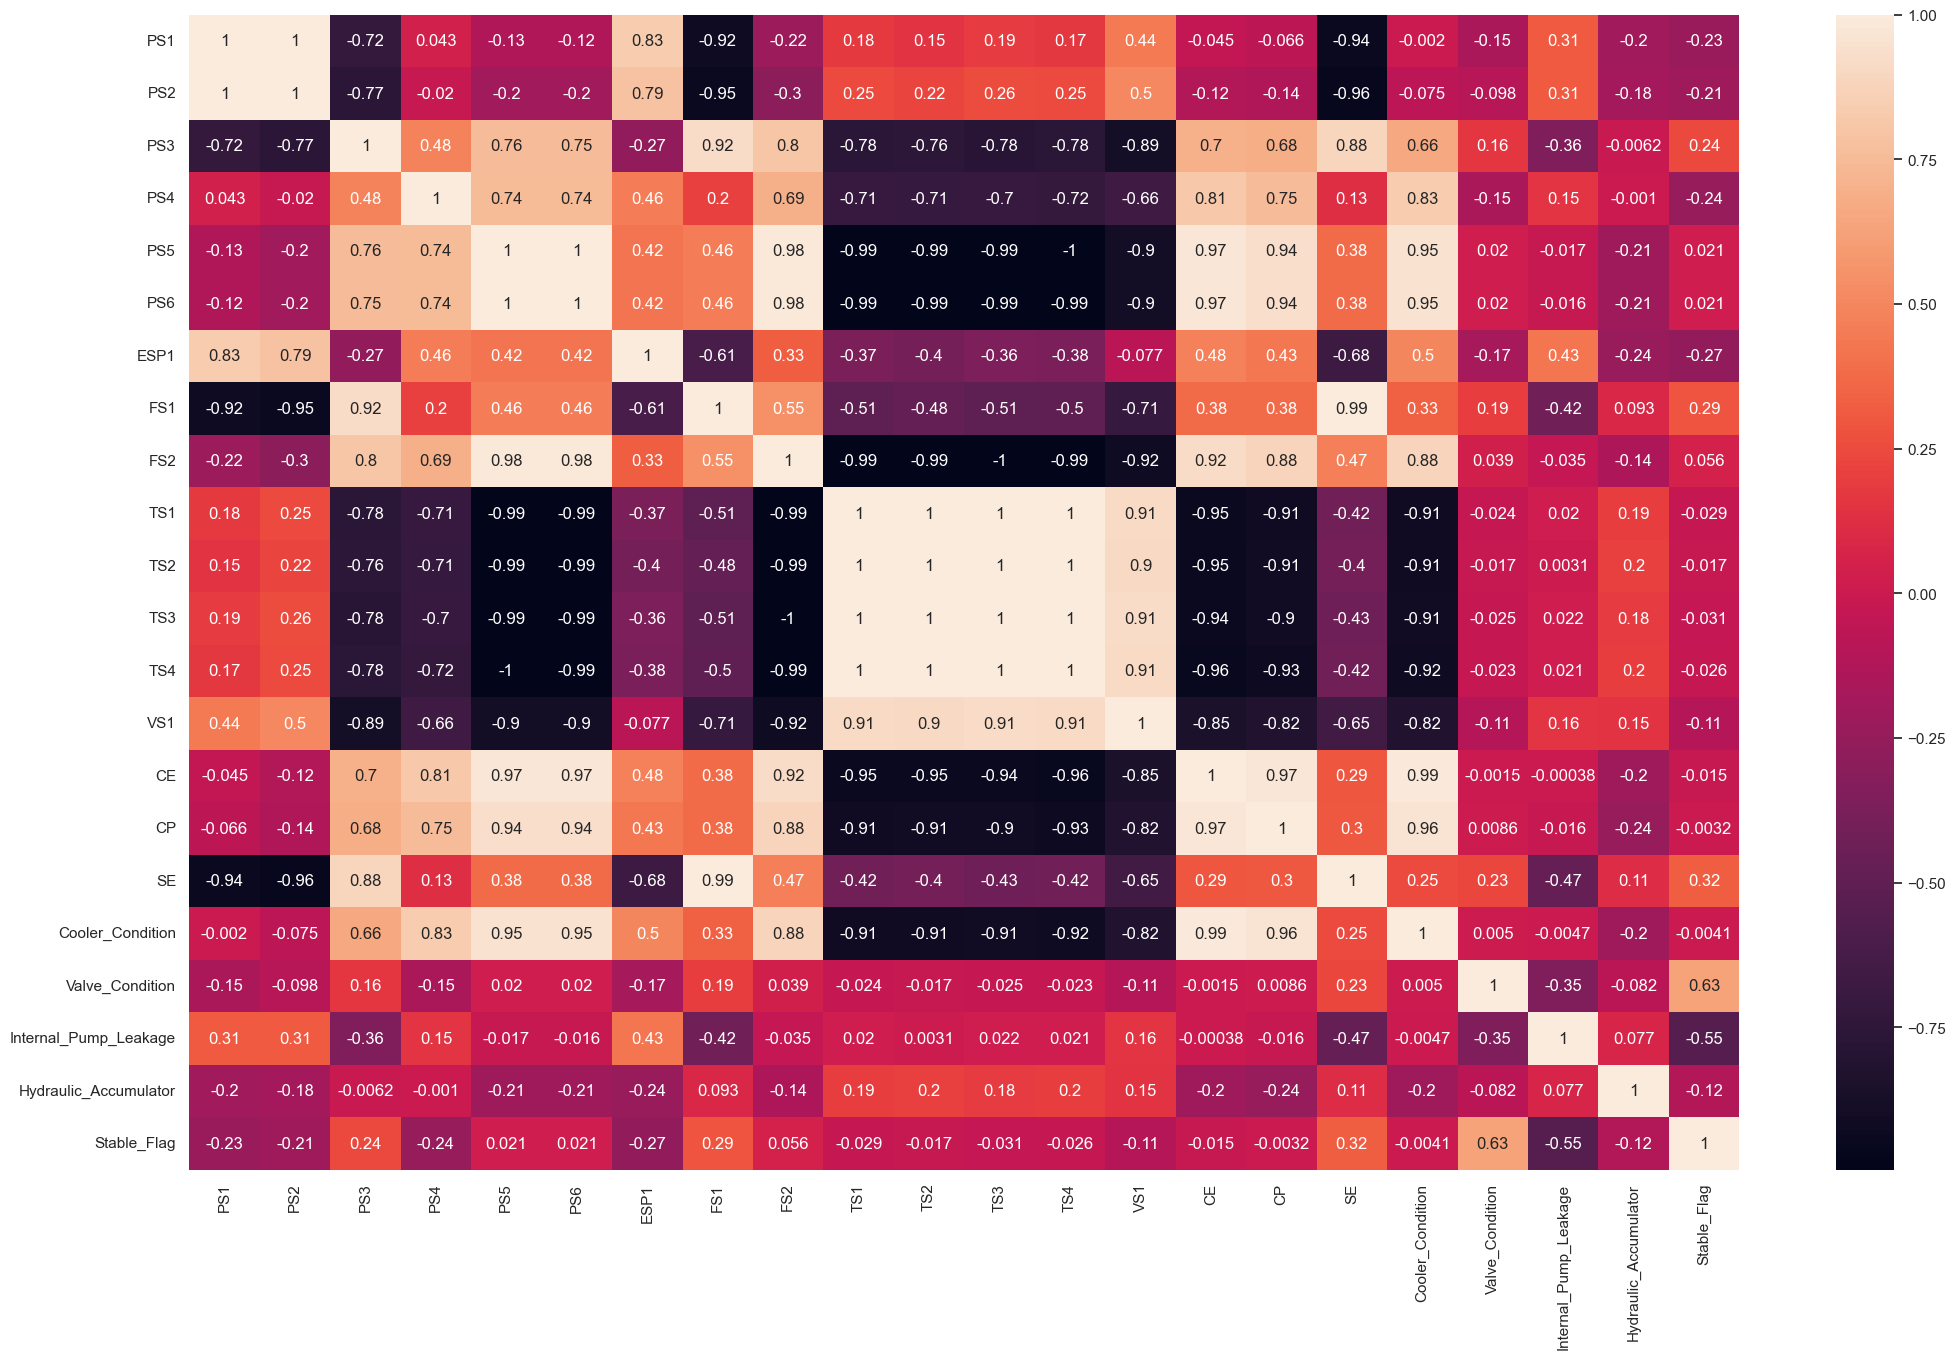

In [59]:
fig=plt.gcf()
fig.set_size_inches((25,15))
sns.heatmap(df_final.corr(),annot=True)

In [60]:
fig.savefig("corr.png")

In [61]:
df_final_corr=df_final.corr().sort_values(["Cooler_Condition","Valve_Condition","Internal_Pump_Leakage","Hydraulic_Accumulator","Stable_Flag"],ascending=False)
df_final_corr.head()

,PS1,PS2,PS3,PS4,PS5,PS6,ESP1,FS1,FS2,TS1,...,TS4,VS1,CE,CP,SE,Cooler_Condition,Valve_Condition,Internal_Pump_Leakage,Hydraulic_Accumulator,Stable_Flag
Cooler_Condition,-0.002000,-0.075386,0.662852,0.832446,0.949962,0.950316,0.497514,0.330446,0.881340,-0.910865,...,-0.922572,-0.818256,0.991943,0.956220,0.249273,1.000000,0.004952,-0.004656,-0.203954,-0.004105
CE,-0.044862,-0.119934,0.697820,0.814459,0.973995,0.974220,0.475030,0.376376,0.919353,-0.945977,...,-0.955987,-0.852222,1.000000,0.974136,0.293130,0.991943,-0.001463,-0.000381,-0.204599,-0.015316
CP,-0.065850,-0.137819,0.680701,0.752728,0.936972,0.937112,0.433904,0.382178,0.876955,-0.912048,...,-0.926772,-0.821073,0.974136,1.000000,0.303047,0.956220,0.008605,-0.015806,-0.241432,-0.003231
PS6,-0.124423,-0.199468,0.754532,0.744778,0.999993,1.000000,0.419764,0.460014,0.979356,-0.992523,...,-0.994925,-0.898289,0.974220,0.937112,0.376471,0.950316,0.020284,-0.016262,-0.210282,0.021353
PS5,-0.125801,-0.200835,0.755438,0.744478,1.000000,0.999993,0.418587,0.461261,0.979715,-0.992716,...,-0.995100,-0.898647,0.973995,0.936972,0.377765,0.949962,0.020317,-0.016579,-0.209262,0.021458


In [62]:
df_final_corr_target=df_final_corr[["Cooler_Condition","Valve_Condition","Internal_Pump_Leakage","Hydraulic_Accumulator","Stable_Flag"]]
df_final_corr_target.drop(["Cooler_Condition","Valve_Condition","Internal_Pump_Leakage","Hydraulic_Accumulator","Stable_Flag"],axis=0,inplace=True)

In [63]:
df_final_corr_target

,Cooler_Condition,Valve_Condition,Internal_Pump_Leakage,Hydraulic_Accumulator,Stable_Flag
CE,0.991943,-0.001463,-0.000381,-0.204599,-0.015316
CP,0.956220,0.008605,-0.015806,-0.241432,-0.003231
PS6,0.950316,0.020284,-0.016262,-0.210282,0.021353
PS5,0.949962,0.020317,-0.016579,-0.209262,0.021458
FS2,0.881340,0.038651,-0.034926,-0.139471,0.055942
PS4,0.832446,-0.146385,0.154950,-0.001021,-0.244314
PS3,0.662852,0.163278,-0.355070,-0.006242,0.237027
ESP1,0.497514,-0.174618,0.426320,-0.239692,-0.267649
FS1,0.330446,0.190141,-0.421702,0.092695,0.288568
SE,0.249273,0.231354,-0.469243,0.112756,0.324695


In [64]:
x=df_final.iloc[:,:-5]

In [65]:
x.head(2)

,PS1,PS2,PS3,PS4,PS5,PS6,ESP1,FS1,FS2,TS1,TS2,TS3,TS4,VS1,CE,CP,SE
0,160.673492,109.466914,1.991475,0.0,9.842169,9.728098,2538.929167,6.709815,10.304592,35.621983,40.978767,38.471017,31.745250,0.57695,39.601350,1.86275,59.157183
1,160.603320,109.354890,1.976234,0.0,9.635142,9.529488,2531.498900,6.715315,10.403098,36.676967,41.532767,38.978967,34.493867,0.56585,25.786433,1.25555,59.335617


In [66]:
y=df_final.iloc[:,-5:]

In [67]:
y.head(2)

,Cooler_Condition,Valve_Condition,Internal_Pump_Leakage,Hydraulic_Accumulator,Stable_Flag
0,3.0,100.0,0.0,130.0,1.0
1,3.0,100.0,0.0,130.0,1.0


In [68]:
target_1=y.iloc[:,-5]
target_2=y.iloc[:,-4]
target_3=y.iloc[:,-3]
target_4=y.iloc[:,-2]
final_target=y.iloc[:,-1]
final_target=(final_target.astype(int))

In [69]:
x.head()

,PS1,PS2,PS3,PS4,PS5,PS6,ESP1,FS1,FS2,TS1,TS2,TS3,TS4,VS1,CE,CP,SE
0,160.673492,109.466914,1.991475,0.0,9.842169,9.728098,2538.929167,6.709815,10.304592,35.621983,40.978767,38.471017,31.745250,0.576950,39.601350,1.862750,59.157183
1,160.603320,109.354890,1.976234,0.0,9.635142,9.529488,2531.498900,6.715315,10.403098,36.676967,41.532767,38.978967,34.493867,0.565850,25.786433,1.255550,59.335617
2,160.347720,109.158845,1.972224,0.0,9.530548,9.427949,2519.928000,6.718522,10.366250,37.880800,42.442450,39.631950,35.646150,0.576533,22.218233,1.113217,59.543150
3,160.188088,109.064807,1.946576,0.0,9.438827,9.337429,2511.541633,6.720565,10.302678,38.879050,43.403983,40.403383,36.579467,0.569267,20.459817,1.062150,59.794900
4,160.000472,108.931434,1.922707,0.0,9.358762,9.260636,2503.449500,6.690308,10.237750,39.803917,44.332750,41.310550,37.427900,0.577367,19.787017,1.070467,59.455267


In [70]:
round((target_1.value_counts(normalize=True)),4)    #cooler condition is normal

Cooler_Condition
100.0    0.3361
3.0      0.3320
20.0     0.3320
Name: proportion, dtype: float64

In [71]:
train_x,test_x,train_y,test_y=train_test_split(x,target_1,test_size=0.2,random_state=1)

In [72]:
from sklearn.preprocessing import StandardScaler

In [73]:
sc=StandardScaler()

In [74]:
train_x=sc.fit_transform(train_x)
test_x=sc.transform(test_x)

In [75]:
l_classifier=LogisticRegression(random_state=42)

In [76]:
l_classifier.fit(train_x,train_y)

LogisticRegression(random_state=42)

In [77]:
LogisticRegression(random_state=42)

LogisticRegression(random_state=42)

accuracy_score_lr_train=  0.9977324263038548
accuracy_score_lr_test=  1.0

confusion_matrix:-


<Axes: >

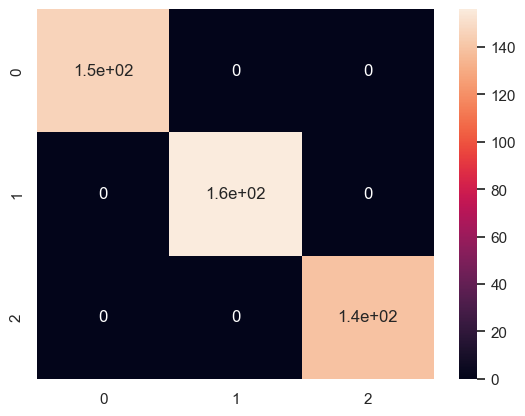

In [78]:
pred_train_y=l_classifier.predict(train_x)
pred_test_y=l_classifier.predict(test_x)
accuracy_score_lr_train=accuracy_score(train_y,pred_train_y)
accuracy_score_lr_test=accuracy_score(test_y,pred_test_y)
print("accuracy_score_lr_train= ",accuracy_score_lr_train)
print("accuracy_score_lr_test= ",accuracy_score_lr_test)
print("\nconfusion_matrix:-")
sns.heatmap(confusion_matrix(test_y,pred_test_y),annot=True)


In [79]:
precision_score_lr_train=precision_score(train_y,pred_train_y,average="weighted")
precision_score_lr_test=precision_score(test_y,pred_test_y,average="weighted")
print("precision_score_lr_train= ",precision_score_lr_train)
print("precision_score_lr_test= ",precision_score_lr_test)


precision_score_lr_train=  0.9977334222238077
precision_score_lr_test=  1.0


In [80]:
precision_score_lr_train=precision_score(train_y,pred_train_y,average="weighted")
precision_score_lr_test=precision_score(test_y,pred_test_y,average="weighted")
print("precision_score_lr_train= ",precision_score_lr_train)
print("precision_score_lr_test= ",precision_score_lr_test)


precision_score_lr_train=  0.9977334222238077
precision_score_lr_test=  1.0


In [81]:
scores=cross_validate(l_classifier,train_x,train_y,scoring=["accuracy","precision_weighted"],cv=10)
scores

{'fit_time': array([0.01107049, 0.01001   , 0.01100993, 0.01059985, 0.01052499,
        0.0100143 , 0.00901747, 0.01001787, 0.01101255, 0.01069474]),
 'score_time': array([0.00200367, 0.00099969, 0.00199962, 0.00099969, 0.00200319,
        0.00300026, 0.00199986, 0.00200057, 0.00228357, 0.0020411 ]),
 'test_accuracy': array([0.99435028, 1.        , 0.98870056, 1.        , 1.        ,
        1.        , 1.        , 1.        , 0.99431818, 1.        ]),
 'test_precision_weighted': array([0.9944429 , 1.        , 0.98907721, 1.        , 1.        ,
        1.        , 1.        , 1.        , 0.99441448, 1.        ])}

In [82]:
accuracy_score_lr_cross=scores["test_accuracy"].mean()
print("accuracy_score_lr_cross= ",accuracy_score_lr_cross)
precision_score_lr_cross=scores["test_precision_weighted"].mean()
print("precision_score_lr_cross= ",precision_score_lr_cross)      

accuracy_score_lr_cross=  0.997736902927581
precision_score_lr_cross=  0.9977934597433069


In [83]:
knn=KNeighborsClassifier(n_neighbors=10,p=2)

In [84]:
knn.fit(train_x,train_y)

KNeighborsClassifier(n_neighbors=10)

accuracy_score_knn_train=  0.9982993197278912
accuracy_score_knn_test=  1.0

confusion_matrix:-


<Axes: >

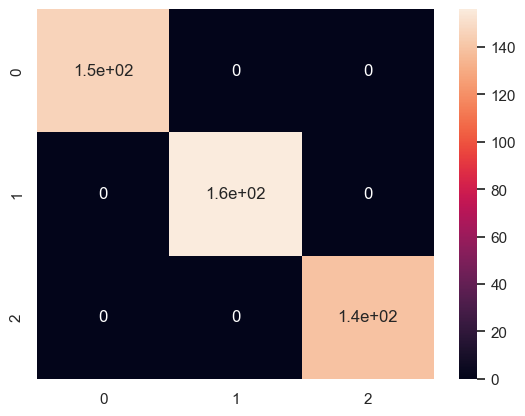

In [85]:
pred_train_y=knn.predict(train_x)
pred_test_y=knn.predict(test_x)
accuracy_score_knn_train=accuracy_score(train_y,pred_train_y)
accuracy_score_knn_test=accuracy_score(test_y,pred_test_y)
print("accuracy_score_knn_train= ",accuracy_score_knn_train)
print("accuracy_score_knn_test= ",accuracy_score_knn_test)
print("\nconfusion_matrix:-")
sns.heatmap(confusion_matrix(test_y,pred_test_y),annot=True)


In [86]:
precision_score_knn_train=precision_score(train_y,pred_train_y,average="weighted")
precision_score_knn_test=precision_score(test_y,pred_test_y,average="weighted")
print("precision_score_knn_train= ",precision_score_knn_train)
print("precision_score_knn_test= ",precision_score_knn_test)


precision_score_knn_train=  0.9982993197278912
precision_score_knn_test=  1.0


In [87]:
scores=cross_validate(knn,train_x,train_y,scoring=["accuracy","precision_weighted"],cv=10)
scores

{'fit_time': array([0.0010004 , 0.00099802, 0.00099945, 0.0009985 , 0.00100684,
        0.00099993, 0.00099969, 0.        , 0.00099969, 0.00100112]),
 'score_time': array([0.00400138, 0.00308299, 0.00500321, 0.00392365, 0.0039525 ,
        0.00357175, 0.00399995, 0.00357246, 0.0030005 , 0.00307536]),
 'test_accuracy': array([0.99435028, 1.        , 0.99435028, 1.        , 1.        ,
        1.        , 1.        , 1.        , 0.99431818, 1.        ]),
 'test_precision_weighted': array([0.9944429 , 1.        , 0.99444604, 1.        , 1.        ,
        1.        , 1.        , 1.        , 0.99441448, 1.        ])}

In [88]:
accuracy_score_knn_cross=scores["test_accuracy"].mean()
print("accuracy_score_knn_cross= ",accuracy_score_knn_cross)
precision_score_knn_cross=scores["test_precision_weighted"].mean()
print("precision_score_knn_cross= ",precision_score_knn_cross)

accuracy_score_knn_cross=  0.9983018746789935
precision_score_knn_cross=  0.9983303425036887


In [89]:
svc=SVC(kernel="rbf")

In [90]:
svc.fit(train_x,train_y)

SVC()

accuracy_score_svc_train=  0.9982993197278912
accuracy_score_svc_test=  1.0

confusion_matrix:-


<Axes: >

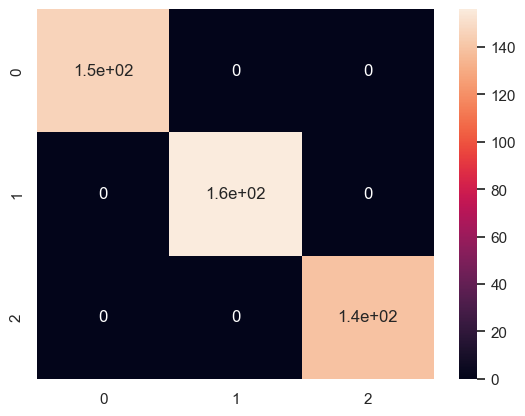

In [91]:
pred_train_y=svc.predict(train_x)
pred_test_y=svc.predict(test_x)
accuracy_score_svc_train=accuracy_score(train_y,pred_train_y)
accuracy_score_svc_test=accuracy_score(test_y,pred_test_y)
print("accuracy_score_svc_train= ",accuracy_score_svc_train)
print("accuracy_score_svc_test= ",accuracy_score_svc_test)
print("\nconfusion_matrix:-")
sns.heatmap(confusion_matrix(test_y,pred_test_y),annot=True)

In [92]:
precision_score_svc_train=precision_score(train_y,pred_train_y,average="weighted")
precision_score_svc_test=precision_score(test_y,pred_test_y,average="weighted")
print("precision_score_svc_train= ",precision_score_svc_train)
print("precision_score_svc_test= ",precision_score_svc_test)

precision_score_svc_train=  0.9982993197278912
precision_score_svc_test=  1.0


In [93]:
scores=cross_validate(svc,train_x,train_y,scoring=["accuracy","precision_weighted"],cv=10)
scores

{'fit_time': array([0.00450587, 0.00499892, 0.00400448, 0.00501895, 0.00300121,
        0.0059998 , 0.00300002, 0.00299978, 0.00399828, 0.00305367]),
 'score_time': array([0.00304699, 0.00250411, 0.00300002, 0.00299883, 0.00333476,
        0.00369   , 0.00200009, 0.0033114 , 0.00199986, 0.00199986]),
 'test_accuracy': array([0.99435028, 1.        , 0.99435028, 1.        , 1.        ,
        1.        , 1.        , 1.        , 0.99431818, 1.        ]),
 'test_precision_weighted': array([0.9944429 , 1.        , 0.99444604, 1.        , 1.        ,
        1.        , 1.        , 1.        , 0.99441448, 1.        ])}

In [94]:
accuracy_score_svc_cross=scores["test_accuracy"].mean()
print("accuracy_score_svc_cross= ",accuracy_score_svc_cross)
precision_score_svc_cross=scores["test_precision_weighted"].mean()
print("precision_score_svc_cross= ",precision_score_svc_cross)

accuracy_score_svc_cross=  0.9983018746789935
precision_score_svc_cross=  0.9983303425036887


In [95]:
dtc=DecisionTreeClassifier(criterion="entropy",random_state=1)

In [96]:
dtc.fit(train_x,train_y)

DecisionTreeClassifier(criterion='entropy', random_state=1)

accuracy_score_dtc_train=  1.0
accuracy_score_dtc_test=  1.0

confusion_matrix:-


<Axes: >

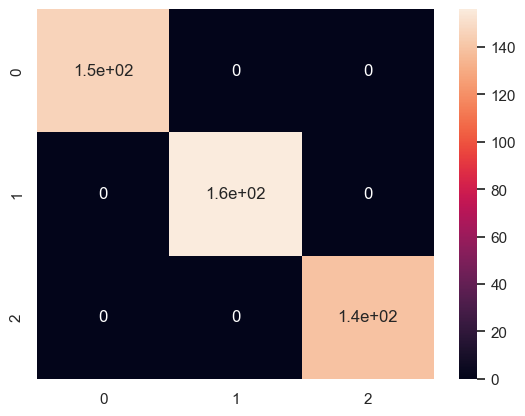

In [97]:
pred_train_y=dtc.predict(train_x)
pred_test_y=dtc.predict(test_x)
accuracy_score_dtc_train=accuracy_score(train_y,pred_train_y)
accuracy_score_dtc_test=accuracy_score(test_y,pred_test_y)
print("accuracy_score_dtc_train= ",accuracy_score_dtc_train)
print("accuracy_score_dtc_test= ",accuracy_score_dtc_test)
print("\nconfusion_matrix:-")
sns.heatmap(confusion_matrix(test_y,pred_test_y),annot=True) 


In [98]:
precision_score_dtc_train=precision_score(train_y,pred_train_y,average="weighted")
precision_score_dtc_test=precision_score(test_y,pred_test_y,average="weighted")
print("precision_score_dtc_train= ",precision_score_dtc_train)
print("precision_score_dtc_test= ",precision_score_dtc_test)     #overfitting

precision_score_dtc_train=  1.0
precision_score_dtc_test=  1.0


In [99]:
scores=cross_validate(dtc,train_x,train_y,scoring=["accuracy","precision_weighted"],cv=10)
scores

{'fit_time': array([0.01201463, 0.01301312, 0.01201963, 0.01208925, 0.01200724,
        0.01203966, 0.01301003, 0.01200914, 0.01183915, 0.01201653]),
 'score_time': array([0.00150704, 0.00199962, 0.00203419, 0.0010004 , 0.00099993,
        0.00200367, 0.00099993, 0.00201035, 0.00200009, 0.00250316]),
 'test_accuracy': array([0.99435028, 1.        , 0.99435028, 1.        , 1.        ,
        1.        , 1.        , 1.        , 0.99431818, 1.        ]),
 'test_precision_weighted': array([0.9944429 , 1.        , 0.99444604, 1.        , 1.        ,
        1.        , 1.        , 1.        , 0.99441448, 1.        ])}

In [100]:
accuracy_score_dtc_cross=scores["test_accuracy"].mean()
print("accuracy_score_dtc_cross= ",accuracy_score_dtc_cross)
precision_score_dtc_cross=scores["test_precision_weighted"].mean()
print("precision_score_dtc_cross= ",precision_score_dtc_cross)

accuracy_score_dtc_cross=  0.9983018746789935
precision_score_dtc_cross=  0.9983303425036887


In [101]:
rfc=RandomForestClassifier(n_estimators=100,random_state=1)

In [102]:
rfc.fit(train_x,train_y)

RandomForestClassifier(random_state=1)

accuracy_score_rfc_train=  1.0
accuracy_score_rfc_test=  1.0

confusion_matrix:-


<Axes: >

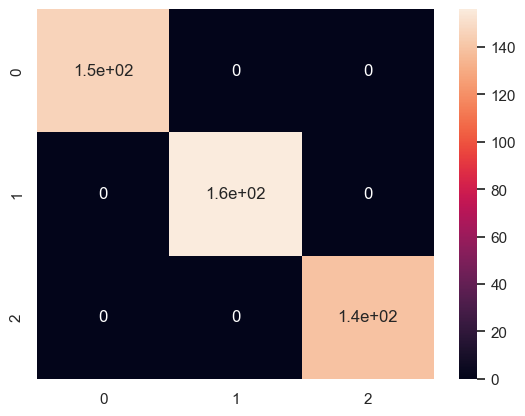

In [103]:
pred_train_y=rfc.predict(train_x)
pred_test_y=rfc.predict(test_x)
accuracy_score_rfc_train=accuracy_score(train_y,pred_train_y)
accuracy_score_rfc_test=accuracy_score(test_y,pred_test_y)
print("accuracy_score_rfc_train= ",accuracy_score_rfc_train)
print("accuracy_score_rfc_test= ",accuracy_score_rfc_test)
print("\nconfusion_matrix:-")
sns.heatmap(confusion_matrix(test_y,pred_test_y),annot=True) #overfitting

In [104]:
precision_score_rfc_train=precision_score(train_y,pred_train_y,average="weighted")
precision_score_rfc_test=precision_score(test_y,pred_test_y,average="weighted")
print("precision_score_rfc_train= ",precision_score_rfc_train)
print("precision_score_rfc_test= ",precision_score_rfc_test) 

precision_score_rfc_train=  1.0
precision_score_rfc_test=  1.0


In [105]:
scores=cross_validate(rfc,train_x,train_y,scoring=["accuracy","precision_weighted"],cv=10)
scores

{'fit_time': array([0.33051848, 0.34179163, 0.3253715 , 0.35140467, 0.35813189,
        0.36655474, 0.35947657, 0.36181641, 0.33822346, 0.34151173]),
 'score_time': array([0.00500298, 0.00601029, 0.00652361, 0.00550842, 0.00600243,
        0.0045073 , 0.00584912, 0.00589252, 0.00499773, 0.00433874]),
 'test_accuracy': array([0.99435028, 1.        , 0.99435028, 1.        , 1.        ,
        1.        , 1.        , 1.        , 0.99431818, 1.        ]),
 'test_precision_weighted': array([0.9944429 , 1.        , 0.99444604, 1.        , 1.        ,
        1.        , 1.        , 1.        , 0.99441448, 1.        ])}

In [106]:
accuracy_score_rfc_cross=scores["test_accuracy"].mean()
print("accuracy_score_rfc_cross= ",accuracy_score_rfc_cross)
precision_score_rfc_cross=scores["test_precision_weighted"].mean()
print("precision_score_rfc_cross= ",precision_score_rfc_cross)


accuracy_score_rfc_cross=  0.9983018746789935
precision_score_rfc_cross=  0.9983303425036887


In [107]:
tpotc=TPOTClassifier(generations=20,population_size=50,scoring=["accuracy","precision"],cv=5,verbosity=2,n_jobs=-1,random_state=42,config_dict="TPOT light")

In [108]:
tpotc.fit(train_x,train_y)

Version 0.12.1 of tpot is outdated. Version 0.12.2 was released Friday February 23, 2024.


                                                                              
Generation 1 - Current best internal CV score: 0.9988668555240793
                                                                               
Generation 2 - Current best internal CV score: 0.9988668555240793
                                                                               
Generation 3 - Current best internal CV score: 0.9988668555240793
                                                                               
Generation 4 - Current best internal CV score: 0.9988668555240793
                                                                               
Generation 5 - Current best internal CV score: 0.9988668555240793
                                                                               
Generation 6 - Current best internal CV score: 0.9988668555240793
                                                                               
Generation 7 - Current best internal CV score

TPOTClassifier(config_dict='TPOT light', generations=20, n_jobs=-1,
               population_size=50, random_state=42,
               scoring=['accuracy', 'precision'], verbosity=2)

In [109]:
tpotc.fitted_pipeline_

Pipeline(steps=[('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=2, min_samples_leaf=12,
                                        min_samples_split=7,
                                        random_state=42))])

accuracy_score_tpotc_train=  0.9988662131519275
accuracy_score_tpotc_test=  1.0

confusion_matrix:-


<Axes: >

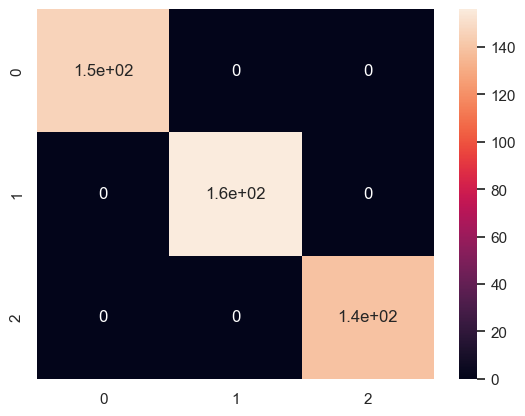

In [110]:
pred_train_y=tpotc.predict(train_x)
pred_test_y=tpotc.predict(test_x)
accuracy_score_tpotc_train=accuracy_score(train_y,pred_train_y)
accuracy_score_tpotc_test=accuracy_score(test_y,pred_test_y)
print("accuracy_score_tpotc_train= ",accuracy_score_tpotc_train)
print("accuracy_score_tpotc_test= ",accuracy_score_tpotc_test)
print("\nconfusion_matrix:-")
sns.heatmap(confusion_matrix(test_y,pred_test_y),annot=True)

In [111]:
precision_score_tpotc_train=precision_score(train_y,pred_train_y,average="weighted")
precision_score_tpotc_test=precision_score(test_y,pred_test_y,average="weighted")
print("precision_score_tpotc_train= ",precision_score_tpotc_train)
print("precision_score_tpotc_test= ",precision_score_tpotc_test)

precision_score_tpotc_train=  0.99887013628981
precision_score_tpotc_test=  1.0


In [112]:
scores=cross_validate(tpotc,train_x,train_y,scoring=["accuracy","precision_weighted"],cv=5)
scores

Version 0.12.1 of tpot is outdated. Version 0.12.2 was released Friday February 23, 2024.


                                                                               
Generation 1 - Current best internal CV score: 0.9992932862190813
                                                                               
Generation 2 - Current best internal CV score: 0.9992932862190813
                                                                                
Generation 3 - Current best internal CV score: 0.9992932862190813
                                                                                
Generation 4 - Current best internal CV score: 0.9992932862190813
                                                                                
Generation 5 - Current best internal CV score: 0.9992932862190813
                                                                                
Generation 6 - Current best internal CV score: 0.9992932862190813
                                                                                
Generation 7 - Current best internal CV

Version 0.12.1 of tpot is outdated. Version 0.12.2 was released Friday February 23, 2024.



Best pipeline: DecisionTreeClassifier(input_matrix, criterion=gini, max_depth=2, min_samples_leaf=12, min_samples_split=7)
                                                                              
Generation 1 - Current best internal CV score: 0.9992932862190813
                                                                               
Generation 2 - Current best internal CV score: 0.9992932862190813
                                                                               
Generation 3 - Current best internal CV score: 0.9992932862190813
                                                                                
Generation 4 - Current best internal CV score: 0.9992932862190813
                                                                                
Generation 5 - Current best internal CV score: 0.9992932862190813
                                                                                
Generation 6 - Current best internal CV score: 0.999293286219081

Version 0.12.1 of tpot is outdated. Version 0.12.2 was released Friday February 23, 2024.



Best pipeline: DecisionTreeClassifier(input_matrix, criterion=gini, max_depth=2, min_samples_leaf=12, min_samples_split=7)
                                                                               
Generation 1 - Current best internal CV score: 0.9985840663609252
                                                                               
Generation 2 - Current best internal CV score: 0.9985840663609252
                                                                               
Generation 3 - Current best internal CV score: 0.9985840663609252
                                                                               
Generation 4 - Current best internal CV score: 0.9985840663609252
                                                                                
Generation 5 - Current best internal CV score: 0.9985840663609252
                                                                                
Generation 6 - Current best internal CV score: 0.998584066360925

Version 0.12.1 of tpot is outdated. Version 0.12.2 was released Friday February 23, 2024.


                                                                              
Generation 1 - Current best internal CV score: 0.9985840663609252
                                                                               
Generation 2 - Current best internal CV score: 0.9985840663609252
                                                                               
Generation 3 - Current best internal CV score: 0.9985840663609252
                                                                               
Generation 4 - Current best internal CV score: 0.9985840663609252
                                                                                
Generation 5 - Current best internal CV score: 0.9985840663609252
                                                                                
Generation 6 - Current best internal CV score: 0.9985840663609252
                                                                                
Generation 7 - Current best internal CV sc

Version 0.12.1 of tpot is outdated. Version 0.12.2 was released Friday February 23, 2024.



Best pipeline: DecisionTreeClassifier(input_matrix, criterion=entropy, max_depth=7, min_samples_leaf=16, min_samples_split=5)
                                                                              
Generation 1 - Current best internal CV score: 0.9985865724381625
                                                                               
Generation 2 - Current best internal CV score: 0.9985865724381625
                                                                               
Generation 3 - Current best internal CV score: 0.9985865724381625
                                                                               
Generation 4 - Current best internal CV score: 0.9985865724381625
                                                                               
Generation 5 - Current best internal CV score: 0.9985865724381625
                                                                                
Generation 6 - Current best internal CV score: 0.99858657243816

{'fit_time': array([10.0828948 , 11.16907263, 11.43316507, 11.33693504, 11.44872093]),
 'score_time': array([0.00200009, 0.00200057, 0.00197887, 0.00200629, 0.00150681]),
 'test_accuracy': array([0.99716714, 0.99716714, 1.        , 1.        , 1.        ]),
 'test_precision_weighted': array([0.99719055, 0.99719199, 1.        , 1.        , 1.        ])}

In [113]:
print("tpot_accuracy_score_target1= ",scores["test_accuracy"].mean())
print("tpot_precision_score_target1= ",scores["test_precision_weighted"].mean())

tpot_accuracy_score_target1=  0.9988668555240793
tpot_precision_score_target1=  0.998876507871181


In [114]:
accuracy_score_tpotc_train=0.9994331065759637
accuracy_score_tpotc_test=1.0
precision_score_tpotc_train=0.9994340890602342
precision_score_tpotc_test=1.0

In [115]:
pred_train_accuracy=[accuracy_score_lr_train,accuracy_score_knn_train,accuracy_score_svc_train
                     ,accuracy_score_tpotc_train]
pred_test_accuracy=[accuracy_score_lr_test,accuracy_score_knn_test,accuracy_score_svc_test
                     ,accuracy_score_tpotc_test]
pred_train_precision=[precision_score_lr_train,precision_score_knn_train,precision_score_svc_train
                     ,precision_score_tpotc_train]
pred_test_precision=[precision_score_lr_test,precision_score_knn_test,precision_score_svc_test
                     ,precision_score_tpotc_test]


In [116]:
df_train_accuracy=pd.DataFrame(pred_train_accuracy,columns=["train"])
df_test_accuracy=pd.DataFrame(pred_test_accuracy,columns=["test"])
df_train_precision=pd.DataFrame(pred_train_precision,columns=["train"])
df_test_precision=pd.DataFrame(pred_test_precision,columns=["test"])

In [117]:
# Concatenating train and test accuracy, and train and test precision
df_accuracy = pd.concat([df_train_accuracy, df_test_accuracy], axis=1)
df_precision = pd.concat([df_train_precision, df_test_precision], axis=1)

# Combining accuracy and precision into one DataFrame with hierarchical columns
df_best_model = pd.concat([df_accuracy, df_precision], keys=["accuracy", "precision"], axis=1)

# Setting the model names as row indices
df_best_model = df_best_model.set_axis(["logistic_reg", "knn", "svc", "tpotclassifier"], axis=0)

# Display the result
df_best_model


accuracy      precision     
                   train test     train test
logistic_reg    0.997732  1.0  0.997733  1.0
knn             0.998299  1.0  0.998299  1.0
svc             0.998299  1.0  0.998299  1.0
tpotclassifier  0.999433  1.0  0.999434  1.0

In [118]:
print("logistic_regression_target1= ",max(df_best_model.accuracy.test))


logistic_regression_target1=  1.0


In [119]:
target1_pred_values=l_classifier.predict(test_x)

In [120]:
round((target_2.value_counts(normalize=True)),4)     # valve's condition is good

Valve_Condition
100.0    0.5102
73.0     0.1633
80.0     0.1633
90.0     0.1633
Name: proportion, dtype: float64

In [121]:
train_x,test_x,train_y,test_y=train_test_split(x,target_2,test_size=0.2,random_state=1)

In [122]:
sc=StandardScaler()

In [123]:
train_x=sc.fit_transform(train_x)
test_x=sc.transform(test_x)

In [124]:
l_classifier=LogisticRegression(random_state=42)

In [125]:
l_classifier.fit(train_x,train_y)

LogisticRegression(random_state=42)

accuracy_score_lr_train=  0.7210884353741497
accuracy_score_lr_test=  0.7165532879818595

confusion_matrix:-


<Axes: >

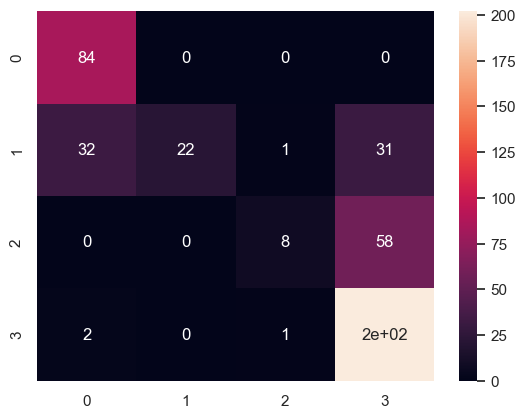

In [126]:
pred_train_y=l_classifier.predict(train_x)
pred_test_y=l_classifier.predict(test_x)
accuracy_score_lr_train=accuracy_score(train_y,pred_train_y)
accuracy_score_lr_test=accuracy_score(test_y,pred_test_y)
print("accuracy_score_lr_train= ",accuracy_score_lr_train)
print("accuracy_score_lr_test= ",accuracy_score_lr_test)
print("\nconfusion_matrix:-")
sns.heatmap(confusion_matrix(test_y,pred_test_y),annot=True)

In [127]:
precision_score_lr_train=precision_score(train_y,pred_train_y,average="weighted")
precision_score_lr_test=precision_score(test_y,pred_test_y,average="weighted")
print("precision_score_lr_train= ",precision_score_lr_train)
print("precision_score_lr_test= ",precision_score_lr_test)

precision_score_lr_train=  0.7323126422217866
precision_score_lr_test=  0.7730136409700075


In [128]:
scores=cross_validate(l_classifier,train_x,train_y,scoring=["accuracy","precision_weighted"],cv=10)
scores

{'fit_time': array([0.02052808, 0.02031708, 0.02183175, 0.02054524, 0.01989198,
        0.01963115, 0.01845574, 0.01956201, 0.02206826, 0.02008581]),
 'score_time': array([0.00199938, 0.00200057, 0.00200033, 0.00185394, 0.00200319,
        0.00203967, 0.00200081, 0.0009954 , 0.0021081 , 0.00099969]),
 'test_accuracy': array([0.71751412, 0.70621469, 0.75141243, 0.6779661 , 0.70454545,
        0.72159091, 0.71022727, 0.72727273, 0.72159091, 0.69318182]),
 'test_precision_weighted': array([0.79841131, 0.68478163, 0.7916134 , 0.67775705, 0.66060606,
        0.73117544, 0.71723879, 0.76536114, 0.71740976, 0.74807209])}

In [129]:
accuracy_score_lr_cross=scores["test_accuracy"].mean()
print("accuracy_score_lr_cross= ",accuracy_score_lr_cross)
precision_score_lr_cross=scores["test_precision_weighted"].mean()
print("precision_score_lr_cross= ",precision_score_lr_cross)

accuracy_score_lr_cross=  0.713151643554186
precision_score_lr_cross=  0.7292426672964005


In [130]:
knn=KNeighborsClassifier(n_neighbors=5,p=2)

In [131]:
knn.fit(train_x,train_y)

KNeighborsClassifier()

accuracy_score_knn_train=  0.8996598639455783
accuracy_score_knn_test=  0.8412698412698413

confusion_matrix:-


<Axes: >

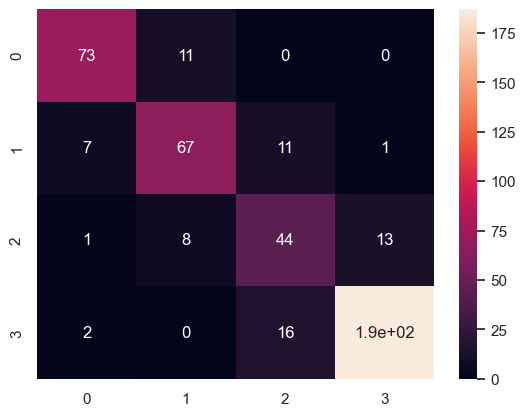

In [132]:
pred_train_y=knn.predict(train_x)
pred_test_y=knn.predict(test_x)
accuracy_score_knn_train=accuracy_score(train_y,pred_train_y)
accuracy_score_knn_test=accuracy_score(test_y,pred_test_y)
print("accuracy_score_knn_train= ",accuracy_score_knn_train)
print("accuracy_score_knn_test= ",accuracy_score_knn_test)
print("\nconfusion_matrix:-")
sns.heatmap(confusion_matrix(test_y,pred_test_y),annot=True)

In [133]:
precision_score_knn_train=precision_score(train_y,pred_train_y,average="weighted")
precision_score_knn_test=precision_score(test_y,pred_test_y,average="weighted")
print("precision_score_knn_train= ",precision_score_knn_train)
print("precision_score_knn_test= ",precision_score_knn_test)


precision_score_knn_train=  0.9019295076403129
precision_score_knn_test=  0.8446764615823565


In [134]:
scores=cross_validate(knn,train_x,train_y,scoring=["accuracy","precision_weighted"],cv=10)
scores

{'fit_time': array([0.0010004 , 0.        , 0.00100374, 0.00099993, 0.00082755,
        0.00150204, 0.        , 0.        , 0.        , 0.        ]),
 'score_time': array([0.00300002, 0.003021  , 0.00299573, 0.00301242, 0.00217509,
        0.00200248, 0.00401473, 0.00300026, 0.00299954, 0.00300884]),
 'test_accuracy': array([0.76836158, 0.85875706, 0.78531073, 0.80225989, 0.84659091,
        0.79545455, 0.82954545, 0.82386364, 0.78977273, 0.81818182]),
 'test_precision_weighted': array([0.77971513, 0.85491166, 0.79968188, 0.82483609, 0.84967821,
        0.80658698, 0.83192624, 0.8299954 , 0.8154693 , 0.82171522])}

In [135]:
accuracy_score_knn_cross=scores["test_accuracy"].mean()
print("accuracy_score_knn_cross= ",accuracy_score_knn_cross)
precision_score_knn_cross=scores["test_precision_weighted"].mean()
print("precision_score_knn_cross= ",precision_score_knn_cross)

accuracy_score_knn_cross=  0.8118098356445813
precision_score_knn_cross=  0.8214516114181736


In [136]:
svc=SVC(kernel="rbf")

In [137]:
svc.fit(train_x,train_y)

SVC()

accuracy_score_svc_train=  0.5481859410430839
accuracy_score_svc_test=  0.4875283446712018

confusion_matrix:-


<Axes: >

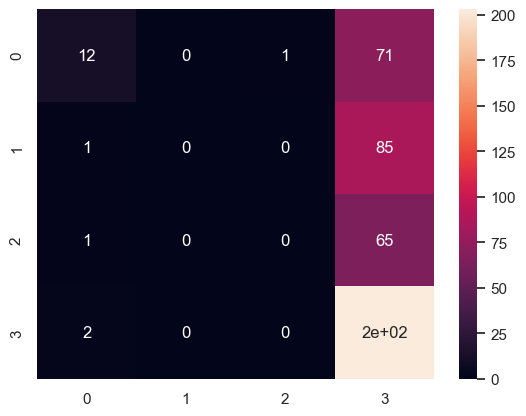

In [138]:
pred_train_y=svc.predict(train_x)
pred_test_y=svc.predict(test_x)
accuracy_score_svc_train=accuracy_score(train_y,pred_train_y)
accuracy_score_svc_test=accuracy_score(test_y,pred_test_y)
print("accuracy_score_svc_train= ",accuracy_score_svc_train)
print("accuracy_score_svc_test= ",accuracy_score_svc_test)
print("\nconfusion_matrix:-")
sns.heatmap(confusion_matrix(test_y,pred_test_y),annot=True)     # not accepted

In [139]:
precision_score_svc_train=precision_score(train_y,pred_train_y,average="weighted")
precision_score_svc_test=precision_score(test_y,pred_test_y,average="weighted")
print("precision_score_svc_train= ",precision_score_svc_train)
print("precision_score_svc_test= ",precision_score_svc_test)

precision_score_svc_train=  0.4779536514055529
precision_score_svc_test=  0.3654162923030847


In [140]:
dtc=DecisionTreeClassifier(criterion="entropy",random_state=1)

In [141]:
dtc.fit(train_x,train_y)

DecisionTreeClassifier(criterion='entropy', random_state=1)

accuracy_score_dtc_train=  1.0
accuracy_score_dtc_test=  0.9410430839002267

confusion_matrix:-


<Axes: >

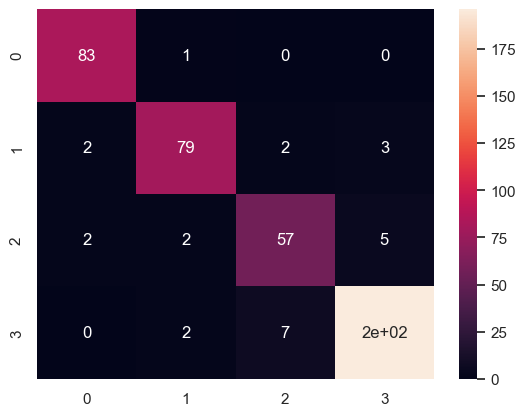

In [142]:
pred_train_y=dtc.predict(train_x)
pred_test_y=dtc.predict(test_x)
accuracy_score_dtc_train=accuracy_score(train_y,pred_train_y)
accuracy_score_dtc_test=accuracy_score(test_y,pred_test_y)
print("accuracy_score_dtc_train= ",accuracy_score_dtc_train)
print("accuracy_score_dtc_test= ",accuracy_score_dtc_test)
print("\nconfusion_matrix:-")
sns.heatmap(confusion_matrix(test_y,pred_test_y),annot=True) #overfitting

In [143]:
precision_score_dtc_train=precision_score(train_y,pred_train_y,average="weighted")
precision_score_dtc_test=precision_score(test_y,pred_test_y,average="weighted")
print("precision_score_dtc_train= ",precision_score_dtc_train)
print("precision_score_dtc_test= ",precision_score_dtc_test)   

precision_score_dtc_train=  1.0
precision_score_dtc_test=  0.9409969789776884


In [144]:
scores=cross_validate(dtc,train_x,train_y,scoring=["accuracy","precision_weighted"],cv=10)
scores


{'fit_time': array([0.04735303, 0.04257131, 0.04863334, 0.04517007, 0.04333234,
        0.04765916, 0.04130197, 0.04634452, 0.04080153, 0.04290676]),
 'score_time': array([0.00200391, 0.00199866, 0.00199986, 0.00199842, 0.00204182,
        0.00201368, 0.00199986, 0.00179577, 0.00099826, 0.00199819]),
 'test_accuracy': array([0.90960452, 0.92655367, 0.94350282, 0.87570621, 0.89772727,
        0.9375    , 0.93181818, 0.9375    , 0.92613636, 0.94318182]),
 'test_precision_weighted': array([0.91269504, 0.92708357, 0.94343068, 0.87891628, 0.90246212,
        0.94165929, 0.93602101, 0.93729995, 0.93194663, 0.94394454])}

In [145]:
accuracy_score_dtc_cross=scores["test_accuracy"].mean()
print("accuracy_score_dtc_cross= ",accuracy_score_dtc_cross)
precision_score_dtc_cross=scores["test_precision_weighted"].mean()
print("precision_score_dtc_cross= ",precision_score_dtc_cross)

accuracy_score_dtc_cross=  0.9229230868002054
precision_score_dtc_cross=  0.925545910598867


In [146]:
rfc=RandomForestClassifier(n_estimators=50,random_state=1)

In [147]:
rfc.fit(train_x,train_y)

RandomForestClassifier(n_estimators=50, random_state=1)

accuracy_score_rfc_train=  1.0
accuracy_score_rfc_test=  0.963718820861678

confusion_matrix:-


<Axes: >

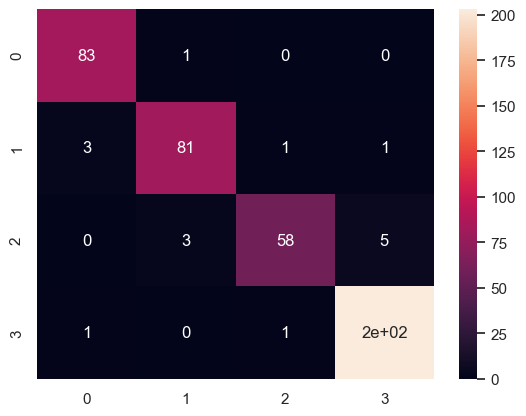

In [148]:
pred_train_y=rfc.predict(train_x)
pred_test_y=rfc.predict(test_x)
accuracy_score_rfc_train=accuracy_score(train_y,pred_train_y)
accuracy_score_rfc_test=accuracy_score(test_y,pred_test_y)
print("accuracy_score_rfc_train= ",accuracy_score_rfc_train)
print("accuracy_score_rfc_test= ",accuracy_score_rfc_test)
print("\nconfusion_matrix:-")
sns.heatmap(confusion_matrix(test_y,pred_test_y),annot=True) #overfitting

In [149]:
precision_score_rfc_train=precision_score(train_y,pred_train_y,average="weighted")
precision_score_rfc_test=precision_score(test_y,pred_test_y,average="weighted")
print("precision_score_rfc_train= ",precision_score_rfc_train)
print("precision_score_rfc_test= ",precision_score_rfc_test)     

precision_score_rfc_train=  1.0
precision_score_rfc_test=  0.9637317567955521


In [150]:
scores=cross_validate(rfc,train_x,train_y,scoring=["accuracy","precision_weighted"],cv=10)
scores

{'fit_time': array([0.43524814, 0.43012738, 0.43008471, 0.42893648, 0.44886661,
        0.45852089, 0.45911503, 0.46168542, 0.43222928, 0.44266009]),
 'score_time': array([0.00350761, 0.00400543, 0.00400329, 0.00501561, 0.0049994 ,
        0.00402522, 0.00400519, 0.00353765, 0.00400066, 0.00400925]),
 'test_accuracy': array([0.94915254, 0.97175141, 0.97740113, 0.95480226, 0.97727273,
        0.98295455, 0.97159091, 0.97159091, 0.95454545, 0.97727273]),
 'test_precision_weighted': array([0.95048168, 0.9715808 , 0.9779726 , 0.9564425 , 0.97766458,
        0.98315747, 0.97329545, 0.97140198, 0.95747893, 0.97740191])}

In [151]:
accuracy_score_rfc_cross=scores["test_accuracy"].mean()
print("accuracy_score_rfc_cross= ",accuracy_score_rfc_cross)
precision_score_rfc_cross=scores["test_precision_weighted"].mean()
print("precision_score_rfc_cross= ",precision_score_rfc_cross)


accuracy_score_rfc_cross=  0.9688334617360039
precision_score_rfc_cross=  0.9696877906574967


In [152]:
tpotc=TPOTClassifier(generations=20,population_size=50,scoring=["accuracy","precision"],cv=5,
                    random_state=2,verbosity=2,config_dict="TPOT light",n_jobs=-1)

In [153]:
tpotc.fit(train_x,train_y)

Version 0.12.1 of tpot is outdated. Version 0.12.2 was released Friday February 23, 2024.


                                                                              
Generation 1 - Current best internal CV score: 0.8973924800412052
                                                                               
Generation 2 - Current best internal CV score: 0.8973924800412052
                                                                               
Generation 3 - Current best internal CV score: 0.8973924800412052
                                                                               
Generation 4 - Current best internal CV score: 0.9155340587174866
                                                                               
Generation 5 - Current best internal CV score: 0.9382130440381149
                                                                               
Generation 6 - Current best internal CV score: 0.9382130440381149
                                                                               
Generation 7 - Current best internal CV score

TPOTClassifier(config_dict='TPOT light', generations=20, n_jobs=-1,
               population_size=50, random_state=2,
               scoring=['accuracy', 'precision'], verbosity=2)

accuracy_score_tpotc_train=  0.9971655328798186
accuracy_score_tpotc_test=  0.9795918367346939

confusion_matrix:-


<Axes: >

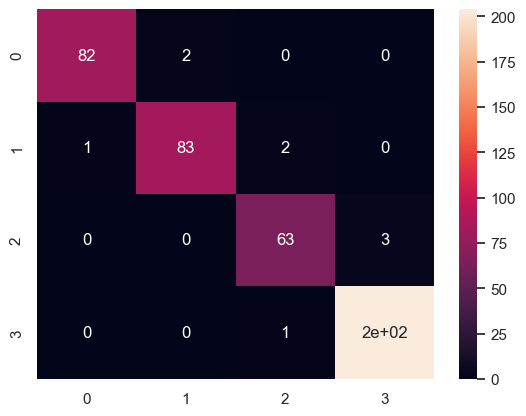

In [154]:
pred_train_y=tpotc.predict(train_x)
pred_test_y=tpotc.predict(test_x)
accuracy_score_tpotc_train=accuracy_score(train_y,pred_train_y)
accuracy_score_tpotc_test=accuracy_score(test_y,pred_test_y)
print("accuracy_score_tpotc_train= ",accuracy_score_tpotc_train)
print("accuracy_score_tpotc_test= ",accuracy_score_tpotc_test)
print("\nconfusion_matrix:-")
sns.heatmap(confusion_matrix(test_y,pred_test_y),annot=True)

In [155]:
precision_score_tpotc_train=precision_score(train_y,pred_train_y,average="weighted")
precision_score_tpotc_test=precision_score(test_y,pred_test_y,average="weighted")
print("precision_score_tpotc_train= ",precision_score_tpotc_train)
print("precision_score_tpotc_test= ",precision_score_tpotc_test)


precision_score_tpotc_train=  0.997172115148564
precision_score_tpotc_test=  0.979576888668278


In [156]:
accuracy_score_tpotc_train= 0.9931972789115646
accuracy_score_tpotc_test=0.9841269841269841
precision_score_tpotc_train=0.9932222784708485
precision_score_tpotc_test=0.9841349279175272

In [157]:
pred_train_accuracy=np.array([accuracy_score_lr_train,accuracy_score_knn_train,accuracy_score_svc_train
                     ,accuracy_score_dtc_train,accuracy_score_rfc_train,accuracy_score_tpotc_train])
pred_test_accuracy=[accuracy_score_lr_test,accuracy_score_knn_test,accuracy_score_svc_test
                     ,accuracy_score_dtc_test,accuracy_score_rfc_test,accuracy_score_tpotc_test]
pred_train_precision=[precision_score_lr_train,precision_score_knn_train,precision_score_svc_train
                   ,precision_score_dtc_train,precision_score_rfc_train,precision_score_tpotc_train]
pred_test_precision=[precision_score_lr_test,precision_score_knn_test,precision_score_svc_test
                     ,precision_score_dtc_test,precision_score_rfc_test,precision_score_tpotc_test]

In [158]:
df_train_accuracy=pd.DataFrame(pred_train_accuracy,columns=["train"])
df_test_accuracy=pd.DataFrame(pred_test_accuracy,columns=["test"])
df_train_precision=pd.DataFrame(pred_train_precision,columns=["train"])
df_test_precision=pd.DataFrame(pred_test_precision,columns=["test"])


In [159]:
df_accuracy = pd.concat([df_train_accuracy, df_test_accuracy], axis=1)
df_precision = pd.concat([df_train_precision, df_test_precision], axis=1)
df_best_model = pd.concat([df_accuracy, df_precision], keys=["accuracy", "precision"], axis=1)
df_best_model = df_best_model.set_axis(["logistic_reg", "knn", "svc", "decision_tree_cl", "random_forest_cl", "tpotclassifier"], axis=0)
df_best_model


accuracy           precision          
                     train      test     train      test
logistic_reg      0.721088  0.716553  0.732313  0.773014
knn               0.899660  0.841270  0.901930  0.844676
svc               0.548186  0.487528  0.477954  0.365416
decision_tree_cl  1.000000  0.941043  1.000000  0.940997
random_forest_cl  1.000000  0.963719  1.000000  0.963732
tpotclassifier    0.993197  0.984127  0.993222  0.984135

In [160]:
print("tpotclassifier(logisticregression)_target2= ",max(df_best_model.accuracy.test))

tpotclassifier(logisticregression)_target2=  0.9841269841269841


In [161]:
target2_pred_values=tpotc.predict(test_x)

In [162]:
round((target_3.value_counts(normalize=True)),4)  #pump's condition is also good

Internal_Pump_Leakage
0.0    0.5537
2.0    0.2231
1.0    0.2231
Name: proportion, dtype: float64

In [163]:
train_x,test_x,train_y,test_y=train_test_split(x,target_3,test_size=0.2,random_state=1)

In [164]:
train_x=sc.fit_transform(train_x)
test_x=sc.transform(test_x)

In [165]:
l_classifier=LogisticRegression(random_state=42)

In [166]:
l_classifier.fit(train_x,train_y)

LogisticRegression(random_state=42)

accuracy_score_lr_train=  0.9880952380952381
accuracy_score_lr_test=  0.9886621315192744

confusion_matrix:-


<Axes: >

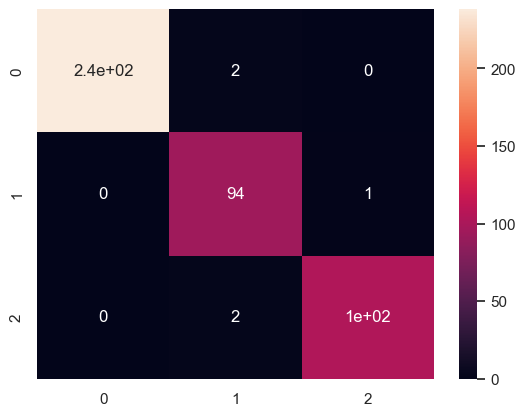

In [167]:
pred_train_y=l_classifier.predict(train_x)
pred_test_y=l_classifier.predict(test_x)
accuracy_score_lr_train=accuracy_score(train_y,pred_train_y)
accuracy_score_lr_test=accuracy_score(test_y,pred_test_y)
print("accuracy_score_lr_train= ",accuracy_score_lr_train)
print("accuracy_score_lr_test= ",accuracy_score_lr_test)
print("\nconfusion_matrix:-")
sns.heatmap(confusion_matrix(test_y,pred_test_y),annot=True)

In [168]:
precision_score_lr_train=precision_score(train_y,pred_train_y,average="weighted")
precision_score_lr_test=precision_score(test_y,pred_test_y,average="weighted")
print("precision_score_lr_train= ",precision_score_lr_train)
print("precision_score_lr_test= ",precision_score_lr_test)

precision_score_lr_train=  0.9882234932040569
precision_score_lr_test=  0.9889181976645534


In [169]:
scores=cross_validate(l_classifier,train_x,train_y,scoring=["accuracy","precision_weighted"],cv=10)
scores

{'fit_time': array([0.02405906, 0.02203655, 0.02309322, 0.02108645, 0.02004576,
        0.02186728, 0.01896548, 0.02013779, 0.02363706, 0.02143788]),
 'score_time': array([0.00300622, 0.00099993, 0.00200462, 0.00199962, 0.00200129,
        0.0013833 , 0.00200367, 0.00199986, 0.00227499, 0.00099778]),
 'test_accuracy': array([0.98305085, 0.97175141, 0.98870056, 0.98870056, 0.98295455,
        0.98863636, 0.98863636, 1.        , 0.97727273, 0.98295455]),
 'test_precision_weighted': array([0.98346769, 0.97186745, 0.98884181, 0.98884181, 0.98417208,
        0.98919069, 0.98920455, 1.        , 0.97808442, 0.98323171])}

In [170]:
accuracy_score_lr_cross=scores["test_accuracy"].mean()
print("accuracy_score_lr_cross= ",accuracy_score_lr_cross)
precision_score_lr_cross=scores["test_precision_weighted"].mean()
print("precision_score_lr_cross= ",precision_score_lr_cross)

accuracy_score_lr_cross=  0.9852657935285054
precision_score_lr_cross=  0.9856902188670971


In [171]:
knn=KNeighborsClassifier(n_neighbors=10,p=2)

In [172]:
knn.fit(train_x,train_y)

KNeighborsClassifier(n_neighbors=10)

accuracy_score_knn_train=  0.9852607709750567
accuracy_score_knn_test=  0.9795918367346939

confusion_matrix:-


<Axes: >

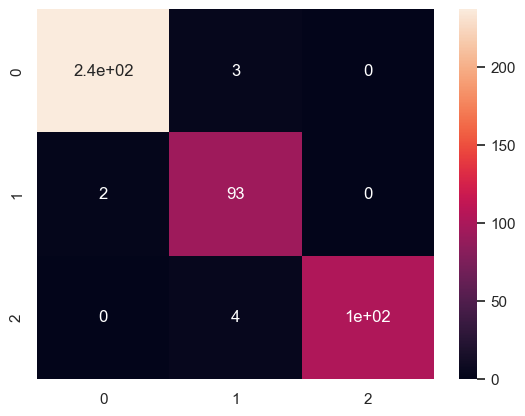

In [173]:
pred_train_y=knn.predict(train_x)
pred_test_y=knn.predict(test_x)
accuracy_score_knn_train=accuracy_score(train_y,pred_train_y)
accuracy_score_knn_test=accuracy_score(test_y,pred_test_y)
print("accuracy_score_knn_train= ",accuracy_score_knn_train)
print("accuracy_score_knn_test= ",accuracy_score_knn_test)
print("\nconfusion_matrix:-")
sns.heatmap(confusion_matrix(test_y,pred_test_y),annot=True)

In [174]:
precision_score_knn_train=precision_score(train_y,pred_train_y,average="weighted")
precision_score_knn_test=precision_score(test_y,pred_test_y,average="weighted")
print("precision_score_knn_train= ",precision_score_knn_train)
print("precision_score_knn_test= ",precision_score_knn_test)

precision_score_knn_train=  0.9853623893212177
precision_score_knn_test=  0.980366512016243


In [175]:
scores=cross_validate(knn,train_x,train_y,scoring=["accuracy","precision_weighted"],cv=10)
scores


{'fit_time': array([0.00099993, 0.00100112, 0.00099993, 0.00099945, 0.        ,
        0.        , 0.        , 0.00116014, 0.00099945, 0.00099921]),
 'score_time': array([0.00399923, 0.00301719, 0.00299954, 0.00308347, 0.0030055 ,
        0.00300002, 0.00300121, 0.00300527, 0.00200129, 0.0030098 ]),
 'test_accuracy': array([0.97740113, 0.98870056, 0.98870056, 0.97740113, 0.97727273,
        0.97727273, 0.98295455, 0.98863636, 0.98295455, 0.97727273]),
 'test_precision_weighted': array([0.97761848, 0.98870056, 0.98884181, 0.97945557, 0.97755682,
        0.97751993, 0.98308507, 0.98917749, 0.98318735, 0.97763665])}

In [176]:
accuracy_score_knn_cross=scores["test_accuracy"].mean()
print("accuracy_score_knn_cross= ",accuracy_score_knn_cross)
precision_score_knn_cross=scores["test_precision_weighted"].mean()
print("precision_score_knn_cross= ",precision_score_knn_cross)

accuracy_score_knn_cross=  0.9818567026194144
precision_score_knn_cross=  0.9822779725027448


In [177]:
svc=SVC(kernel="rbf")

In [178]:
svc.fit(train_x,train_y)

SVC()

accuracy_score_svc_train=  0.949546485260771
accuracy_score_svc_test=  0.9501133786848073

confusion_matrix:-


<Axes: >

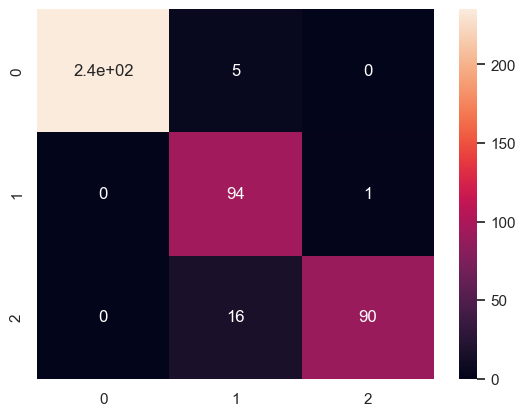

In [179]:
pred_train_y=svc.predict(train_x)
pred_test_y=svc.predict(test_x)
accuracy_score_svc_train=accuracy_score(train_y,pred_train_y)
accuracy_score_svc_test=accuracy_score(test_y,pred_test_y)
print("accuracy_score_svc_train= ",accuracy_score_svc_train)
print("accuracy_score_svc_test= ",accuracy_score_svc_test)
print("\nconfusion_matrix:-")
sns.heatmap(confusion_matrix(test_y,pred_test_y),annot=True)

In [180]:
precision_score_svc_train=precision_score(train_y,pred_train_y,average="weighted")
precision_score_svc_test=precision_score(test_y,pred_test_y,average="weighted")
print("precision_score_svc_train= ",precision_score_svc_train)
print("precision_score_svc_test= ",precision_score_svc_test)

precision_score_svc_train=  0.9529537232067716
precision_score_svc_test=  0.9580211762997921


In [181]:
scores=cross_validate(svc,train_x,train_y,scoring=["accuracy","precision_weighted"],cv=10)
scores

{'fit_time': array([0.02838349, 0.02708316, 0.03441429, 0.0308938 , 0.03406024,
        0.02803016, 0.02991128, 0.03034759, 0.02839518, 0.03013873]),
 'score_time': array([0.01100636, 0.01442361, 0.01165605, 0.01391697, 0.01240063,
        0.01154184, 0.01152396, 0.01302981, 0.01201081, 0.01101398]),
 'test_accuracy': array([0.93785311, 0.92090395, 0.94350282, 0.92090395, 0.9375    ,
        0.95454545, 0.96590909, 0.94318182, 0.93181818, 0.92613636]),
 'test_precision_weighted': array([0.94376445, 0.9268878 , 0.95480226, 0.93590493, 0.94105392,
        0.95676973, 0.96638643, 0.95018939, 0.94353525, 0.93560606])}

In [182]:
accuracy_score_svc_cross=scores["test_accuracy"].mean()
print("accuracy_score_svc_cross= ",accuracy_score_svc_cross)
precision_score_svc_cross=scores["test_precision_weighted"].mean()
print("precision_score_svc_cross= ",precision_score_svc_cross)

accuracy_score_svc_cross=  0.9382254750898819
precision_score_svc_cross=  0.9454900220139321


In [183]:
nbc=GaussianNB()

In [184]:
nbc.fit(train_x,train_y)

GaussianNB()

accuracy_score_nbc_train=  0.6054421768707483
accuracy_score_nbc_test=  0.5827664399092971

confusion_matrix:-


<Axes: >

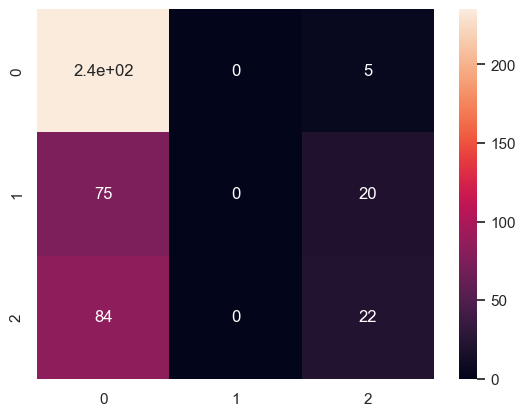

In [185]:
pred_train_y=nbc.predict(train_x)
pred_test_y=nbc.predict(test_x)
accuracy_score_nbc_train=accuracy_score(train_y,pred_train_y)
accuracy_score_nbc_test=accuracy_score(test_y,pred_test_y)
print("accuracy_score_nbc_train= ",accuracy_score_nbc_train)
print("accuracy_score_nbc_test= ",accuracy_score_nbc_test)
print("\nconfusion_matrix:-")
sns.heatmap(confusion_matrix(test_y,pred_test_y),annot=True)

In [186]:
precision_score_nbc_train=precision_score(train_y,pred_train_y,average="weighted")
precision_score_nbc_test=precision_score(test_y,pred_test_y,average="weighted")
print("precision_score_nbc_train= ",precision_score_nbc_train)
print("precision_score_nbc_test= ",precision_score_nbc_test)     #not accepted

precision_score_nbc_train=  0.4541299501830631
precision_score_nbc_test=  0.4371070961415491


In [187]:
pred_train_accuracy=[accuracy_score_lr_train,accuracy_score_knn_train,accuracy_score_svc_train,accuracy_score_nbc_train
                     ]
pred_test_accuracy=[accuracy_score_lr_test,accuracy_score_knn_test,accuracy_score_svc_test,accuracy_score_nbc_test
                     ]
pred_train_precision=[precision_score_lr_train,precision_score_knn_train,precision_score_svc_train,
                     precision_score_nbc_train]
pred_test_precision=[precision_score_lr_test,precision_score_knn_test,precision_score_svc_test,
                     precision_score_nbc_test]


In [188]:
df_train_accuracy=pd.DataFrame(pred_train_accuracy,columns=["train"])
df_test_accuracy=pd.DataFrame(pred_test_accuracy,columns=["test"])

In [189]:
df_train_precision=pd.DataFrame(pred_train_precision,columns=["train"])
df_test_precision=pd.DataFrame(pred_test_precision,columns=["test"])

In [190]:
df_accuracy = pd.concat([df_train_accuracy, df_test_accuracy], axis=1)
df_precision = pd.concat([df_train_precision, df_test_precision], axis=1)

# Concatenating accuracy and precision with hierarchical columns
df_best_model = pd.concat([df_accuracy, df_precision], keys=["accuracy", "precision"], axis=1)

# Assigning the model names as row labels
df_best_model = df_best_model.set_axis(["logistic_reg", "knn", "svc", "naive_bayes"], axis=0)

# Display the resulting DataFrame
df_best_model


accuracy           precision          
                 train      test     train      test
logistic_reg  0.988095  0.988662  0.988223  0.988918
knn           0.985261  0.979592  0.985362  0.980367
svc           0.949546  0.950113  0.952954  0.958021
naive_bayes   0.605442  0.582766  0.454130  0.437107

In [191]:
print("logistic_regression_target3= ",0.988918)

logistic_regression_target3=  0.988918


In [192]:
target3_pred_values=l_classifier.predict(test_x)


In [193]:
round((target_4.value_counts(normalize=True)),4)     #hydraulic accumulator's condition is not good


Hydraulic_Accumulator
90.0     0.3664
130.0    0.2717
115.0    0.1810
100.0    0.1810
Name: proportion, dtype: float64

In [194]:
train_x,test_x,train_y,test_y=train_test_split(x,target_4,test_size=0.2,random_state=1)

In [195]:
train_x=sc.fit_transform(train_x)
test_x=sc.transform(test_x)

In [196]:
l_classifier=LogisticRegression(random_state=1)

In [197]:
l_classifier.fit(train_x,train_y)

LogisticRegression(random_state=1)

accuracy_score_lr_train=  0.6456916099773242
accuracy_score_lr_test=  0.6122448979591837

confusion_matrix:-


<Axes: >

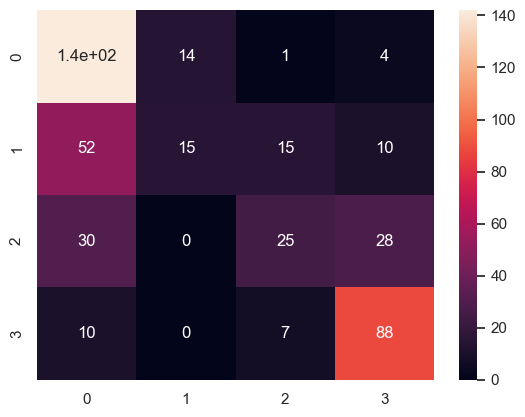

In [198]:
pred_train_y=l_classifier.predict(train_x)
pred_test_y=l_classifier.predict(test_x)
accuracy_score_lr_train=accuracy_score(train_y,pred_train_y)
accuracy_score_lr_test=accuracy_score(test_y,pred_test_y)
print("accuracy_score_lr_train= ",accuracy_score_lr_train)
print("accuracy_score_lr_test= ",accuracy_score_lr_test)
print("\nconfusion_matrix:-")
sns.heatmap(confusion_matrix(test_y,pred_test_y),annot=True)       #not accepted

In [199]:
precision_score_lr_train=precision_score(train_y,pred_train_y,average="weighted")
precision_score_lr_test=precision_score(test_y,pred_test_y,average="weighted")
print("precision_score_lr_train= ",precision_score_lr_train)
print("precision_score_lr_test= ",precision_score_lr_test)

precision_score_lr_train=  0.6160489166020213
precision_score_lr_test=  0.5886466016802635


In [200]:
knn=KNeighborsClassifier(n_neighbors=5,p=2)

In [201]:
knn.fit(train_x,train_y)

KNeighborsClassifier()

accuracy_score_knn_train=  0.9563492063492064
accuracy_score_knn_test=  0.9455782312925171

confusion_matrix:-


<Axes: >

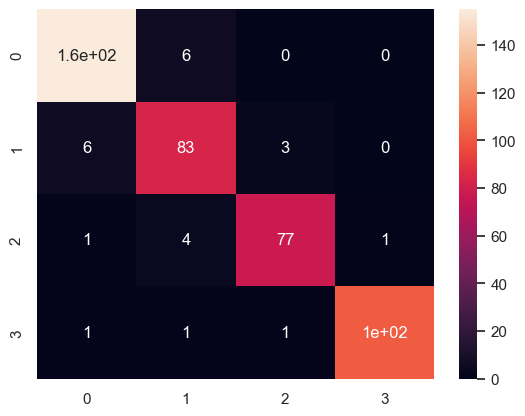

In [202]:
pred_train_y=knn.predict(train_x)
pred_test_y=knn.predict(test_x)
accuracy_score_knn_train=accuracy_score(train_y,pred_train_y)
accuracy_score_knn_test=accuracy_score(test_y,pred_test_y)
print("accuracy_score_knn_train= ",accuracy_score_knn_train)
print("accuracy_score_knn_test= ",accuracy_score_knn_test)
print("\nconfusion_matrix:-")
sns.heatmap(confusion_matrix(test_y,pred_test_y),annot=True)

In [203]:
precision_score_knn_train=precision_score(train_y,pred_train_y,average="weighted")
precision_score_knn_test=precision_score(test_y,pred_test_y,average="weighted")
print("precision_score_knn_train= ",precision_score_knn_train)
print("precision_score_knn_test= ",precision_score_knn_test)

precision_score_knn_train=  0.9563237596665205
precision_score_knn_test=  0.9460635354978844


In [204]:
scores=cross_validate(knn,train_x,train_y,scoring=["accuracy","precision_weighted"],cv=10)
scores

{'fit_time': array([0.00100493, 0.        , 0.00150394, 0.00099635, 0.00099969,
        0.00099874, 0.00100279, 0.        , 0.        , 0.00120068]),
 'score_time': array([0.00400138, 0.0029974 , 0.00257039, 0.00199962, 0.00199938,
        0.00200891, 0.00199986, 0.00400376, 0.00291681, 0.00196075]),
 'test_accuracy': array([0.93785311, 0.95480226, 0.92090395, 0.93785311, 0.92045455,
        0.90909091, 0.91477273, 0.93181818, 0.89204545, 0.93181818]),
 'test_precision_weighted': array([0.93992895, 0.95550847, 0.9219647 , 0.93973445, 0.91978743,
        0.91043586, 0.91970435, 0.93202459, 0.89752183, 0.93150704])}

In [205]:
accuracy_score_knn_cross=scores["test_accuracy"].mean()
print("accuracy_score_knn_cross= ",accuracy_score_knn_cross)
precision_score_knn_cross=scores["test_precision_weighted"].mean()
print("precision_score_knn_cross= ",precision_score_knn_cross)

accuracy_score_knn_cross=  0.9251412429378532
precision_score_knn_cross=  0.9268117674239533


In [206]:
svc=SVC(kernel="rbf")

In [207]:
svc.fit(train_x,train_y)

SVC()

accuracy_score_svc_train=  0.6003401360544217
accuracy_score_svc_test=  0.5714285714285714

confusion_matrix:-


<Axes: >

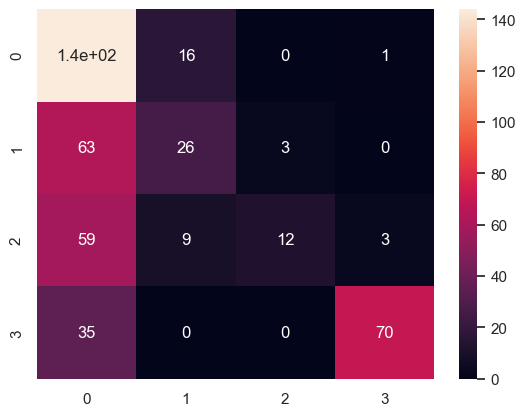

In [208]:
pred_train_y=svc.predict(train_x)
pred_test_y=svc.predict(test_x)
accuracy_score_svc_train=accuracy_score(train_y,pred_train_y)
accuracy_score_svc_test=accuracy_score(test_y,pred_test_y)
print("accuracy_score_svc_train= ",accuracy_score_svc_train)
print("accuracy_score_svc_test= ",accuracy_score_svc_test)
print("\nconfusion_matrix:-")
sns.heatmap(confusion_matrix(test_y,pred_test_y),annot=True)      #not accepted

In [209]:
precision_score_svc_train=precision_score(train_y,pred_train_y,average="weighted")
precision_score_svc_test=precision_score(test_y,pred_test_y,average="weighted")
print("precision_score_svc_train= ",precision_score_svc_train)
print("precision_score_svc_test= ",precision_score_svc_test)

precision_score_svc_train=  0.6764062562366435
precision_score_svc_test=  0.6568016800965795


In [210]:
nbc=GaussianNB()

In [211]:
nbc.fit(train_x,train_y)

GaussianNB()

accuracy_score_nbc_train=  0.41099773242630383
accuracy_score_nbc_test=  0.3741496598639456

confusion_matrix:-


<Axes: >

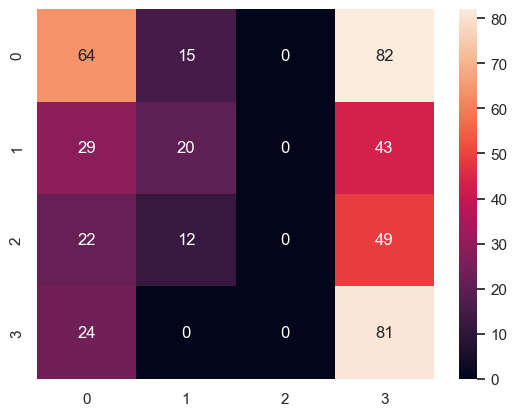

In [212]:
pred_train_y=nbc.predict(train_x)
pred_test_y=nbc.predict(test_x)
accuracy_score_nbc_train=accuracy_score(train_y,pred_train_y)
accuracy_score_nbc_test=accuracy_score(test_y,pred_test_y)
print("accuracy_score_nbc_train= ",accuracy_score_nbc_train)
print("accuracy_score_nbc_test= ",accuracy_score_nbc_test)
print("\nconfusion_matrix:-")
sns.heatmap(confusion_matrix(test_y,pred_test_y),annot=True)      #not accepted

In [213]:
precision_score_nbc_train=precision_score(train_y,pred_train_y,average="weighted")
precision_score_nbc_test=precision_score(test_y,pred_test_y,average="weighted")
print("precision_score_nbc_train= ",precision_score_nbc_train)
print("precision_score_nbc_test= ",precision_score_nbc_test)    

precision_score_nbc_train=  0.3412596859379081
precision_score_nbc_test=  0.33249744614412935


In [214]:
dtc=DecisionTreeClassifier(criterion="entropy",random_state=1)


In [215]:
dtc.fit(train_x,train_y)

DecisionTreeClassifier(criterion='entropy', random_state=1)

accuracy_score_dtc_train=  1.0
accuracy_score_dtc_test=  0.9523809523809523

confusion_matrix:-


<Axes: >

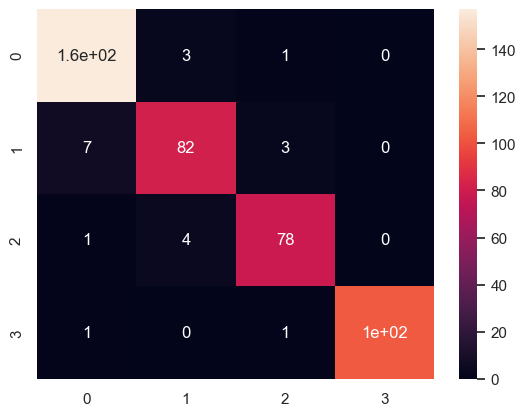

In [216]:
pred_train_y=dtc.predict(train_x)
pred_test_y=dtc.predict(test_x)
accuracy_score_dtc_train=accuracy_score(train_y,pred_train_y)
accuracy_score_dtc_test=accuracy_score(test_y,pred_test_y)
print("accuracy_score_dtc_train= ",accuracy_score_dtc_train)
print("accuracy_score_dtc_test= ",accuracy_score_dtc_test)
print("\nconfusion_matrix:-")
sns.heatmap(confusion_matrix(test_y,pred_test_y),annot=True)    #overfitting

In [217]:
precision_score_dtc_train=precision_score(train_y,pred_train_y,average="weighted")
precision_score_dtc_test=precision_score(test_y,pred_test_y,average="weighted")
print("precision_score_dtc_train= ",precision_score_dtc_train)
print("precision_score_dtc_test= ",precision_score_dtc_test)    

precision_score_dtc_train=  1.0
precision_score_dtc_test=  0.9524606106148972


In [218]:
scores=cross_validate(dtc,train_x,train_y,scoring=["accuracy","precision_weighted"],cv=10)
scores

{'fit_time': array([0.04393911, 0.04299688, 0.0459981 , 0.04210639, 0.04353499,
        0.04187799, 0.04410243, 0.04201889, 0.04288507, 0.04371881]),
 'score_time': array([0.00199914, 0.00204515, 0.00150275, 0.00300097, 0.00250626,
        0.0030067 , 0.00200391, 0.00200057, 0.00117111, 0.00200343]),
 'test_accuracy': array([0.92655367, 0.92090395, 0.93220339, 0.95480226, 0.90909091,
        0.94318182, 0.95454545, 0.9375    , 0.94886364, 0.94886364]),
 'test_precision_weighted': array([0.9296303 , 0.92254791, 0.93585279, 0.95568285, 0.9115754 ,
        0.94286845, 0.95471366, 0.94079288, 0.95109626, 0.94972261])}

In [219]:
accuracy_score_dtc_cross=scores["test_accuracy"].mean()
print("accuracy_score_dtc_cross= ",accuracy_score_dtc_cross)
precision_score_dtc_cross=scores["test_precision_weighted"].mean()
print("precision_score_dtc_cross= ",precision_score_dtc_cross)

accuracy_score_dtc_cross=  0.9376508731381612
precision_score_dtc_cross=  0.9394483098125861


In [220]:
rfc=RandomForestClassifier(n_estimators=100,random_state=1)

In [221]:
rfc.fit(train_x,train_y)

RandomForestClassifier(random_state=1)

accuracy_score_rfc_train=  1.0
accuracy_score_rfc_test=  0.9773242630385488

confusion_matrix:-


<Axes: >

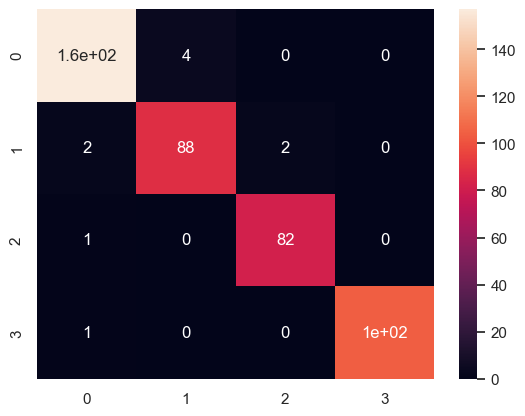

In [222]:
pred_train_y=rfc.predict(train_x)
pred_test_y=rfc.predict(test_x)
accuracy_score_rfc_train=accuracy_score(train_y,pred_train_y)
accuracy_score_rfc_test=accuracy_score(test_y,pred_test_y)
print("accuracy_score_rfc_train= ",accuracy_score_rfc_train)
print("accuracy_score_rfc_test= ",accuracy_score_rfc_test)
print("\nconfusion_matrix:-")
sns.heatmap(confusion_matrix(test_y,pred_test_y),annot=True) #overfitting

In [223]:
precision_score_rfc_train=precision_score(train_y,pred_train_y,average="weighted")
precision_score_rfc_test=precision_score(test_y,pred_test_y,average="weighted")
print("precision_score_rfc_train= ",precision_score_rfc_train)
print("precision_score_rfc_test= ",precision_score_rfc_test)   

precision_score_rfc_train=  1.0
precision_score_rfc_test=  0.9773782528884569


In [224]:
scores=cross_validate(rfc,train_x,train_y,scoring=["accuracy","precision_weighted"],cv=10)
scores

{'fit_time': array([0.79696703, 0.7829771 , 0.79765964, 0.78697324, 0.80340695,
        0.79383659, 0.78524756, 0.77903867, 0.78763223, 0.79309559]),
 'score_time': array([0.00750613, 0.00599861, 0.00514317, 0.0058043 , 0.00636744,
        0.00750637, 0.00599861, 0.00701165, 0.00600338, 0.00600219]),
 'test_accuracy': array([0.97740113, 0.98305085, 0.98870056, 1.        , 0.96590909,
        0.96022727, 0.97159091, 0.98295455, 0.94886364, 0.97727273]),
 'test_precision_weighted': array([0.97757768, 0.98357516, 0.98904832, 1.        , 0.96987875,
        0.96216475, 0.97187677, 0.98375689, 0.9525994 , 0.97848334])}

In [225]:
accuracy_score_rfc_cross=scores["test_accuracy"].mean()
print("accuracy_score_rfc_cross= ",accuracy_score_rfc_cross)
precision_score_rfc_cross=scores["test_precision_weighted"].mean()
print("precision_score_rfc_cross= ",precision_score_rfc_cross)

accuracy_score_rfc_cross=  0.9755970724191062
precision_score_rfc_cross=  0.9768961069727954


In [226]:
pred_train_accuracy=np.array([accuracy_score_lr_train,accuracy_score_knn_train,accuracy_score_svc_train,accuracy_score_nbc_train
                     ,accuracy_score_dtc_train,accuracy_score_rfc_train])
pred_test_accuracy=[accuracy_score_lr_test,accuracy_score_knn_test,accuracy_score_svc_test,accuracy_score_nbc_test
                     ,accuracy_score_dtc_test,accuracy_score_rfc_test]
pred_train_precision=[precision_score_lr_train,precision_score_knn_train,precision_score_svc_train,
                     precision_score_nbc_train,precision_score_dtc_train,precision_score_rfc_train]
pred_test_precision=[precision_score_lr_test,precision_score_knn_test,precision_score_svc_test,
                     precision_score_nbc_test,precision_score_dtc_test,precision_score_rfc_test]

In [227]:
df_train_accuracy=pd.DataFrame(pred_train_accuracy,columns=["train"])
df_test_accuracy=pd.DataFrame(pred_test_accuracy,columns=["test"])
df_train_precision=pd.DataFrame(pred_train_precision,columns=["train"])
df_test_precision=pd.DataFrame(pred_test_precision,columns=["test"])


In [228]:
df_accuracy = pd.concat([df_train_accuracy, df_test_accuracy], axis=1)
df_precision = pd.concat([df_train_precision, df_test_precision], axis=1)

# Concatenating accuracy and precision with hierarchical columns
df_best_model = pd.concat([df_accuracy, df_precision], keys=["accuracy", "precision"], axis=1)

# Assigning the model names as row indices
df_best_model = df_best_model.set_axis(["logistic_reg", "knn", "svc", "naive_bayes", "decision_tree_cl", "random_forest_cl"], axis=0)

# Display the resulting DataFrame
df_best_model


accuracy           precision          
                     train      test     train      test
logistic_reg      0.645692  0.612245  0.616049  0.588647
knn               0.956349  0.945578  0.956324  0.946064
svc               0.600340  0.571429  0.676406  0.656802
naive_bayes       0.410998  0.374150  0.341260  0.332497
decision_tree_cl  1.000000  0.952381  1.000000  0.952461
random_forest_cl  1.000000  0.977324  1.000000  0.977378

In [229]:
print("knearestneighbors_target4= ",0.946064)

knearestneighbors_target4=  0.946064


In [230]:
target4_pred_values=knn.predict(test_x)

In [231]:
y_ind=y.iloc[:,:-1]
y_ind.head()

,Cooler_Condition,Valve_Condition,Internal_Pump_Leakage,Hydraulic_Accumulator
0,3.0,100.0,0.0,130.0
1,3.0,100.0,0.0,130.0
2,3.0,100.0,0.0,130.0
3,3.0,100.0,0.0,130.0
4,3.0,100.0,0.0,130.0


In [232]:
final_target.head(2)

0    1
1    1
Name: Stable_Flag, dtype: int32

In [233]:
final_target.value_counts(normalize=True)

Stable_Flag
0    0.657143
1    0.342857
Name: proportion, dtype: float64

In [234]:
train_x,test_x,train_y,test_y=train_test_split(y_ind,final_target,test_size=0.2,random_state=1,stratify=final_target)

In [235]:
sc=StandardScaler()

In [236]:
train_x=sc.fit_transform(train_x)
test_x=sc.transform(test_x)

In [237]:
l_classifier=LogisticRegression(random_state=1)

In [238]:
l_classifier.fit(train_x,train_y)

LogisticRegression(random_state=1)

accuracy_score_lr_train=  0.9308390022675737
accuracy_score_lr_test=  0.9297052154195011

confusion_matrix:-


<Axes: >

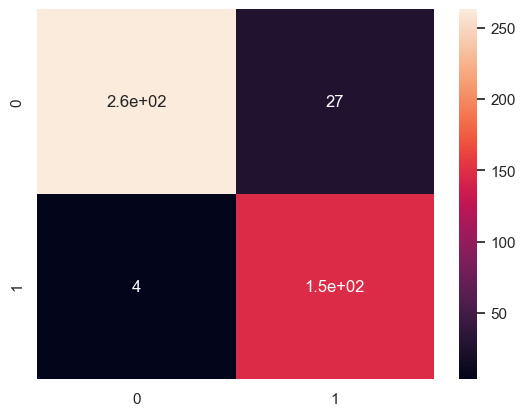

In [239]:
pred_train_y=l_classifier.predict(train_x)
pred_test_y=l_classifier.predict(test_x)
accuracy_score_lr_train=accuracy_score(train_y,pred_train_y)
accuracy_score_lr_test=accuracy_score(test_y,pred_test_y)
print("accuracy_score_lr_train= ",accuracy_score_lr_train)
print("accuracy_score_lr_test= ",accuracy_score_lr_test)
print("\nconfusion_matrix:-")
sns.heatmap(confusion_matrix(test_y,pred_test_y),annot=True)

In [240]:
precision_score_lr_train=precision_score(train_y,pred_train_y)
precision_score_lr_test=precision_score(test_y,pred_test_y)
print("precision_score_lr_train= ",precision_score_lr_train)
print("precision_score_lr_test= ",precision_score_lr_test)

precision_score_lr_train=  0.851528384279476
precision_score_lr_test=  0.8448275862068966


In [241]:
metrics.roc_auc_score(test_y,l_classifier.predict_proba(test_x)[:,1])

0.9581068737154601

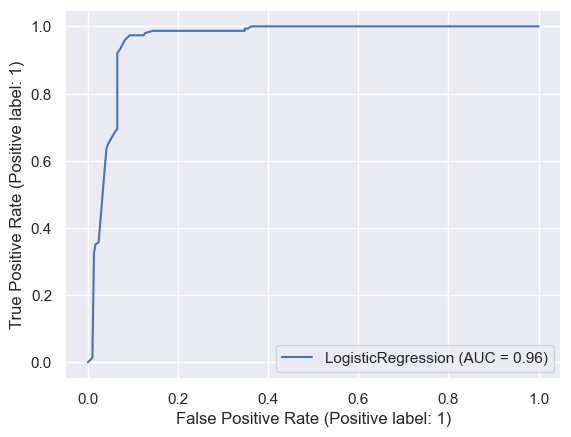

In [242]:
from sklearn.metrics import RocCurveDisplay

# Assuming l_classifier is your trained classifier, and test_x, test_y are your test features and labels
# First, get the predicted probabilities for the positive class
y_prob = l_classifier.predict_proba(test_x)[:, 1]  # Get the probabilities for the positive class

# Now, plot the ROC curve
RocCurveDisplay.from_estimator(l_classifier, test_x, test_y)

# Optionally, you can show the plot
import matplotlib.pyplot as plt
plt.show()


In [243]:
scores=cross_validate(l_classifier,train_x,train_y,scoring=["accuracy","precision"],cv=10)
scores


{'fit_time': array([0.00300455, 0.00199866, 0.00232625, 0.00199986, 0.00202227,
        0.00300527, 0.00353074, 0.00300002, 0.00200009, 0.00300455]),
 'score_time': array([0.00200129, 0.00369287, 0.0019989 , 0.00250697, 0.00150323,
        0.00099874, 0.00099969, 0.00099993, 0.0010066 , 0.00199866]),
 'test_accuracy': array([0.94350282, 0.92655367, 0.93220339, 0.93785311, 0.94886364,
        0.91477273, 0.94318182, 0.92613636, 0.91477273, 0.92045455]),
 'test_precision': array([0.85915493, 0.85294118, 0.84507042, 0.84722222, 0.89230769,
        0.81690141, 0.86764706, 0.85074627, 0.8358209 , 0.85074627])}

In [244]:
accuracy_score_lr_cross=scores["test_accuracy"].mean()
print("accuracy_score_lr_cross= ",accuracy_score_lr_cross)
precision_score_lr_cross=scores["test_precision"].mean()
print("precision_score_lr_cross= ",precision_score_lr_cross)  

accuracy_score_lr_cross=  0.9308294812532101
precision_score_lr_cross=  0.8518558343223234


In [245]:
knn=KNeighborsClassifier(n_neighbors=5,p=2)


In [246]:
knn.fit(train_x,train_y)

KNeighborsClassifier()

accuracy_score_knn_train=  0.93140589569161
accuracy_score_knn_test=  0.9206349206349206

confusion_matrix:-


<Axes: >

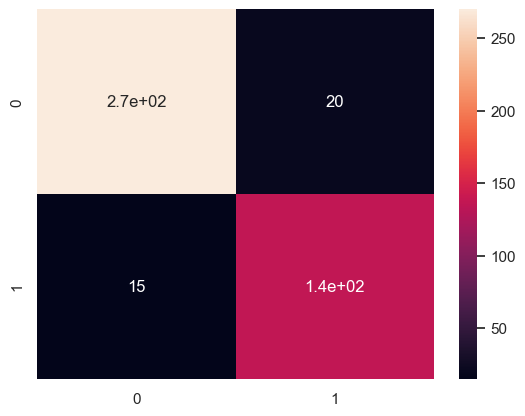

In [247]:
pred_train_y=knn.predict(train_x)
pred_test_y=knn.predict(test_x)
accuracy_score_knn_train=accuracy_score(train_y,pred_train_y)
accuracy_score_knn_test=accuracy_score(test_y,pred_test_y)
print("accuracy_score_knn_train= ",accuracy_score_knn_train)
print("accuracy_score_knn_test= ",accuracy_score_knn_test)
print("\nconfusion_matrix:-")
sns.heatmap(confusion_matrix(test_y,pred_test_y),annot=True)

In [248]:
precision_score_knn_train=precision_score(train_y,pred_train_y)
precision_score_knn_test=precision_score(test_y,pred_test_y)
print("precision_score_knn_train= ",precision_score_knn_train)
print("precision_score_knn_test= ",precision_score_knn_test)

precision_score_knn_train=  0.8769470404984424
precision_score_knn_test=  0.8717948717948718


In [249]:
scores=cross_validate(knn,train_x,train_y,scoring=["accuracy","precision"],cv=10)
scores

{'fit_time': array([0.0019989 , 0.00099897, 0.00100017, 0.00099993, 0.00150371,
        0.00099897, 0.00102139, 0.00199747, 0.00199986, 0.00099969]),
 'score_time': array([0.00489616, 0.00499988, 0.0050106 , 0.00399971, 0.00401425,
        0.00450611, 0.0050025 , 0.00400972, 0.00400019, 0.00450635]),
 'test_accuracy': array([0.92655367, 0.9039548 , 0.92655367, 0.93220339, 0.94318182,
        0.91477273, 0.93181818, 0.92045455, 0.90909091, 0.92045455]),
 'test_precision': array([0.86363636, 0.85483871, 0.85294118, 0.85507246, 0.90322581,
        0.82608696, 0.875     , 0.89655172, 0.85483871, 0.89830508])}

In [250]:
accuracy_score_knn_cross=scores["test_accuracy"].mean()
print("accuracy_score_knn_cross= ",accuracy_score_knn_cross)
precision_score_knn_cross=scores["test_precision"].mean()
print("precision_score_knn_cross= ",precision_score_knn_cross)

accuracy_score_knn_cross=  0.9229038263995889
precision_score_knn_cross=  0.8680496995086951


In [251]:
svc=SVC(kernel="rbf",probability=True)

In [252]:
svc.fit(train_x,train_y)

SVC(probability=True)

accuracy_score_svc_train=  0.9308390022675737
accuracy_score_svc_test=  0.9297052154195011

confusion_matrix:-


<Axes: >

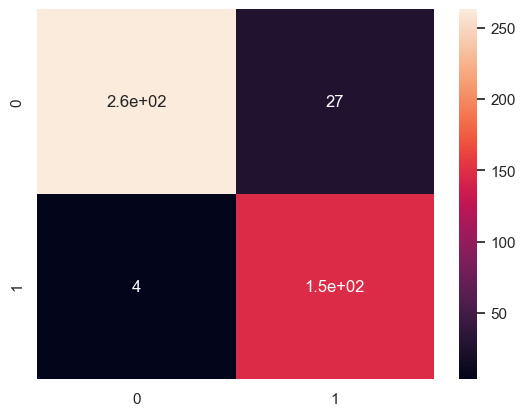

In [253]:
pred_train_y=svc.predict(train_x)
pred_test_y=svc.predict(test_x)
accuracy_score_svc_train=accuracy_score(train_y,pred_train_y)
accuracy_score_svc_test=accuracy_score(test_y,pred_test_y)
print("accuracy_score_svc_train= ",accuracy_score_svc_train)
print("accuracy_score_svc_test= ",accuracy_score_svc_test)
print("\nconfusion_matrix:-")
sns.heatmap(confusion_matrix(test_y,pred_test_y),annot=True)

In [254]:
precision_score_svc_train=precision_score(train_y,pred_train_y)
precision_score_svc_test=precision_score(test_y,pred_test_y)
print("precision_score_svc_train= ",precision_score_svc_train)
print("precision_score_svc_test= ",precision_score_svc_test)

precision_score_svc_train=  0.851528384279476
precision_score_svc_test=  0.8448275862068966


In [255]:
metrics.roc_auc_score(test_y,svc.predict_proba(test_x)[:,1])

0.9663736012788308

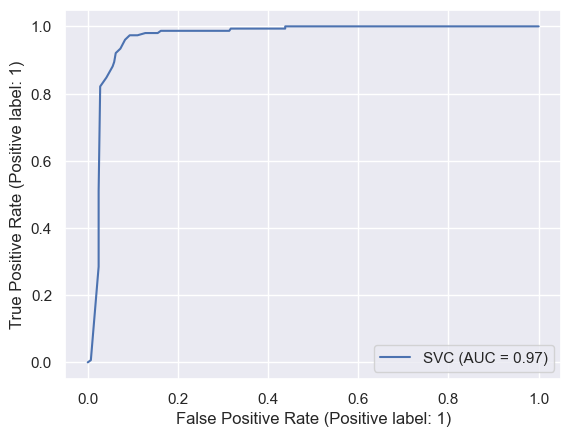

In [256]:
from sklearn.metrics import RocCurveDisplay

# Assuming `svc` is your trained Support Vector Classifier, and test_x, test_y are your test features and labels
RocCurveDisplay.from_estimator(svc, test_x, test_y)

# Optionally, you can display the plot
import matplotlib.pyplot as plt
plt.show()


In [257]:
scores=cross_validate(svc,train_x,train_y,scoring=["accuracy","precision"],cv=10)
scores

{'fit_time': array([0.05655384, 0.05435014, 0.05657697, 0.05406785, 0.05708408,
        0.05354953, 0.05612302, 0.05505681, 0.05576134, 0.05189371]),
 'score_time': array([0.00499964, 0.00400281, 0.00299954, 0.00400686, 0.00450683,
        0.00401115, 0.00400996, 0.00401044, 0.0040102 , 0.00714779]),
 'test_accuracy': array([0.93220339, 0.92655367, 0.93220339, 0.93220339, 0.94886364,
        0.91477273, 0.94318182, 0.92613636, 0.91477273, 0.91477273]),
 'test_precision': array([0.85507246, 0.85294118, 0.84507042, 0.84507042, 0.89230769,
        0.81690141, 0.86764706, 0.85074627, 0.8358209 , 0.859375  ])}

In [258]:
accuracy_score_svc_cross=scores["test_accuracy"].mean()
print("accuracy_score_svc_cross= ",accuracy_score_svc_cross)
precision_score_svc_cross=scores["test_precision"].mean()
print("precision_score_svc_cross= ",precision_score_svc_cross)

accuracy_score_svc_cross=  0.9285663841807908
precision_score_svc_cross=  0.8520952809070156


In [259]:
nbc=GaussianNB()

In [260]:
nbc.fit(train_x,train_y)

GaussianNB()

accuracy_score_nbc_train=  0.8849206349206349
accuracy_score_nbc_test=  0.8684807256235828

confusion_matrix:-


<Axes: >

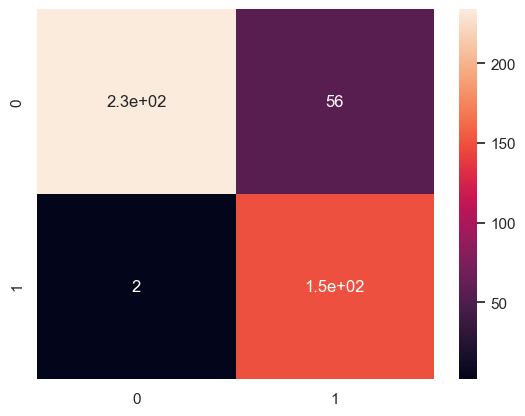

In [261]:
pred_train_y=nbc.predict(train_x)
pred_test_y=nbc.predict(test_x)
accuracy_score_nbc_train=accuracy_score(train_y,pred_train_y)
accuracy_score_nbc_test=accuracy_score(test_y,pred_test_y)
print("accuracy_score_nbc_train= ",accuracy_score_nbc_train)
print("accuracy_score_nbc_test= ",accuracy_score_nbc_test)
print("\nconfusion_matrix:-")
sns.heatmap(confusion_matrix(test_y,pred_test_y),annot=True)    

In [262]:
precision_score_nbc_train=precision_score(train_y,pred_train_y)
precision_score_nbc_test=precision_score(test_y,pred_test_y)
print("precision_score_nbc_train= ",precision_score_nbc_train)
print("precision_score_nbc_test= ",precision_score_nbc_test)     

precision_score_nbc_train=  0.7550761421319797
precision_score_nbc_test=  0.7268292682926829


In [263]:
dtc=DecisionTreeClassifier(criterion="entropy",random_state=1)

In [264]:
dtc.fit(train_x,train_y)

DecisionTreeClassifier(criterion='entropy', random_state=1)

accuracy_score_dtc_train=  0.9319727891156463
accuracy_score_dtc_test=  0.9160997732426304

confusion_matrix:-


<Axes: >

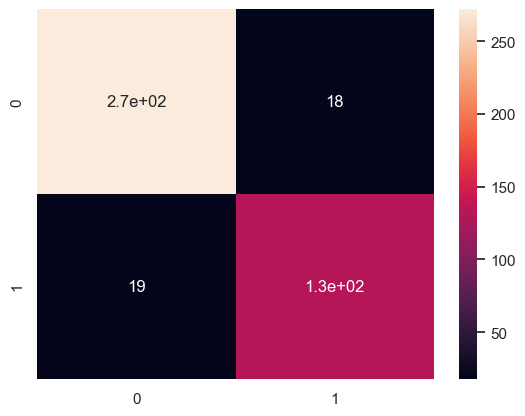

In [265]:
pred_train_y=dtc.predict(train_x)
pred_test_y=dtc.predict(test_x)
accuracy_score_dtc_train=accuracy_score(train_y,pred_train_y)
accuracy_score_dtc_test=accuracy_score(test_y,pred_test_y)
print("accuracy_score_dtc_train= ",accuracy_score_dtc_train)
print("accuracy_score_dtc_test= ",accuracy_score_dtc_test)
print("\nconfusion_matrix:-")
sns.heatmap(confusion_matrix(test_y,pred_test_y),annot=True)  

In [266]:
precision_score_dtc_train=precision_score(train_y,pred_train_y)
precision_score_dtc_test=precision_score(test_y,pred_test_y)
print("precision_score_dtc_train= ",precision_score_dtc_train)
print("precision_score_dtc_test= ",precision_score_dtc_test)    

precision_score_dtc_train=  0.886762360446571
precision_score_dtc_test=  0.88


In [267]:
metrics.roc_auc_score(test_y,dtc.predict_proba(test_x)[:,1])

0.9681776661338204

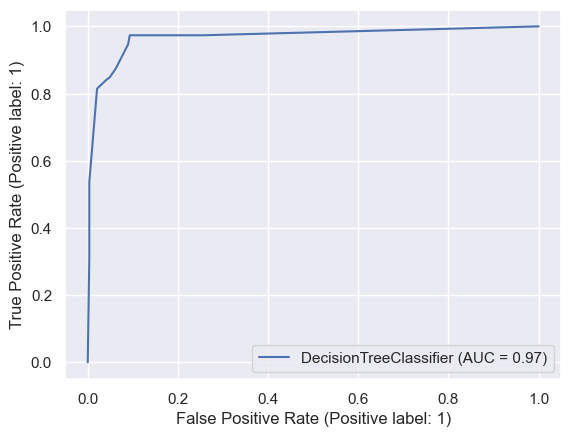

In [268]:
from sklearn.metrics import RocCurveDisplay

# Assuming `dtc` is your trained decision tree classifier, and test_x, test_y are your test features and labels
RocCurveDisplay.from_estimator(dtc, test_x, test_y)

# Optionally, display the plot
import matplotlib.pyplot as plt
plt.show()


In [269]:
scores=cross_validate(dtc,train_x,train_y,scoring=["accuracy","precision"],cv=10)
scores

{'fit_time': array([0.0010097 , 0.00099993, 0.00100064, 0.00150442, 0.00099945,
        0.        , 0.00100756, 0.00094366, 0.0010066 , 0.00100064]),
 'score_time': array([0.00200462, 0.00200009, 0.00199914, 0.00151229, 0.0010016 ,
        0.00203586, 0.00209236, 0.00159669, 0.00195169, 0.00150347]),
 'test_accuracy': array([0.92090395, 0.89830508, 0.9039548 , 0.91525424, 0.9375    ,
        0.91477273, 0.92613636, 0.90340909, 0.90909091, 0.90909091]),
 'test_precision': array([0.8852459 , 0.85245902, 0.87931034, 0.83823529, 0.91525424,
        0.82608696, 0.8852459 , 0.87719298, 0.84375   , 0.85714286])}

In [270]:
accuracy_score_dtc_cross=scores["test_accuracy"].mean()
print("accuracy_score_dtc_cross= ",accuracy_score_dtc_cross)
precision_score_dtc_cross=scores["test_precision"].mean()
print("precision_score_dtc_cross= ",precision_score_dtc_cross)

accuracy_score_dtc_cross=  0.9138418079096043
precision_score_dtc_cross=  0.8659923492026238


In [271]:
rfc=RandomForestClassifier(n_estimators=100,random_state=1)

In [272]:
rfc.fit(train_x,train_y)

RandomForestClassifier(random_state=1)

accuracy_score_rfc_train=  0.9319727891156463
accuracy_score_rfc_test=  0.9183673469387755

confusion_matrix:-


<Axes: >

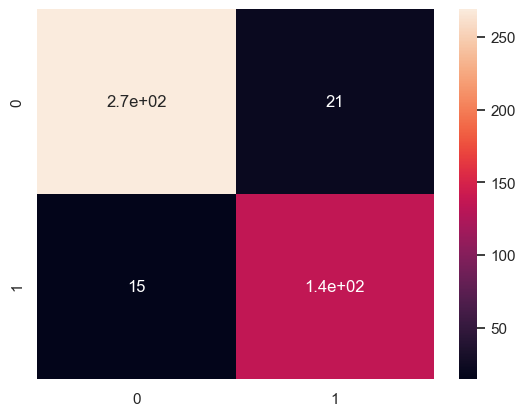

In [273]:
pred_train_y=rfc.predict(train_x)
pred_test_y=rfc.predict(test_x)
accuracy_score_rfc_train=accuracy_score(train_y,pred_train_y)
accuracy_score_rfc_test=accuracy_score(test_y,pred_test_y)
print("accuracy_score_rfc_train= ",accuracy_score_rfc_train)
print("accuracy_score_rfc_test= ",accuracy_score_rfc_test)
print("\nconfusion_matrix:-")
sns.heatmap(confusion_matrix(test_y,pred_test_y),annot=True) #overfitting

In [274]:
precision_score_rfc_train=precision_score(train_y,pred_train_y)
precision_score_rfc_test=precision_score(test_y,pred_test_y)
print("precision_score_rfc_train= ",precision_score_rfc_train)
print("precision_score_rfc_test= ",precision_score_rfc_test)  

precision_score_rfc_train=  0.8783151326053042
precision_score_rfc_test=  0.8662420382165605


In [275]:
metrics.roc_auc_score(test_y,rfc.predict_proba(test_x)[:,1])

0.9689312628453983

In [276]:
metrics.roc_auc_score(train_y,rfc.predict_proba(train_x)[:,1])

0.9771875155983714

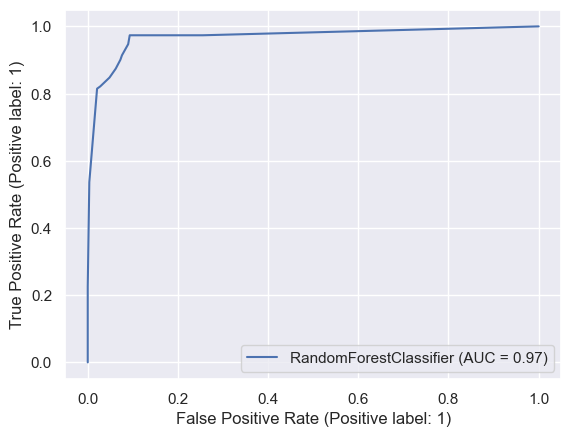

In [277]:
from sklearn.metrics import RocCurveDisplay

# Assuming `rfc` is your trained Random Forest Classifier, and test_x, test_y are your test features and labels
RocCurveDisplay.from_estimator(rfc, test_x, test_y)

# Optionally, display the plot
import matplotlib.pyplot as plt
plt.show()


In [278]:
scores=cross_validate(rfc,train_x,train_y,scoring=["accuracy","precision"],cv=10)
scores

{'fit_time': array([0.10894561, 0.10745907, 0.1089642 , 0.10218787, 0.10743475,
        0.11476231, 0.11998892, 0.09907317, 0.10408592, 0.10403156]),
 'score_time': array([0.006001  , 0.00560379, 0.00700855, 0.0065167 , 0.00808215,
        0.00994325, 0.00578642, 0.00400019, 0.00500679, 0.00600004]),
 'test_accuracy': array([0.93220339, 0.89830508, 0.90960452, 0.91525424, 0.9375    ,
        0.91477273, 0.92613636, 0.91477273, 0.90909091, 0.90909091]),
 'test_precision': array([0.85507246, 0.85245902, 0.85714286, 0.83823529, 0.91525424,
        0.82608696, 0.8852459 , 0.88135593, 0.84375   , 0.85714286])}

In [279]:
accuracy_score_rfc_cross=scores["test_accuracy"].mean()
print("accuracy_score_rfc_cross= ",accuracy_score_rfc_cross)
precision_score_rfc_cross=scores["test_precision"].mean()
print("precision_score_rfc_cross= ",precision_score_rfc_cross)

accuracy_score_rfc_cross=  0.9166730868002053
precision_score_rfc_cross=  0.8611745516217528


In [280]:
print("random_forest_classifier_roc_auc_score= ",round(0.9689312628453983,4))

random_forest_classifier_roc_auc_score=  0.9689


In [281]:
df_final_data_testing_final_target=pd.DataFrame({"Cooler_Condition":target1_pred_values,"Valve_Condition":target2_pred_values
                                                 ,"Internal_Pump_Leakage":target3_pred_values,"Hydraulic_Accumulator":target4_pred_values})

In [282]:
df_final_data_testing_final_target.head()

,Cooler_Condition,Valve_Condition,Internal_Pump_Leakage,Hydraulic_Accumulator
0,20.0,100.0,0.0,90.0
1,3.0,73.0,1.0,90.0
2,3.0,80.0,0.0,115.0
3,100.0,100.0,0.0,90.0
4,20.0,90.0,2.0,90.0


In [283]:
df_final_data_testing_final_target.var()

Cooler_Condition         1733.179293
Valve_Condition           120.691538
Internal_Pump_Leakage       0.688384
Hydraulic_Accumulator     252.270666
dtype: float64

In [284]:
std_final_data_testing_final_target=StandardScaler().fit_transform(df_final_data_testing_final_target)
std_final_data_testing_final_target

array([[-0.47102702,  0.95075406, -0.84273252, -1.01265345],
       [-0.87983572, -1.50971727,  0.36390722, -1.01265345],
       [-0.87983572, -0.8718173 , -0.84273252,  0.56314108],
       ...,
       [ 1.45277864, -1.50971727,  1.57054696,  0.56314108],
       [ 1.45277864, -0.8718173 ,  0.36390722, -1.01265345],
       [ 1.45277864,  0.95075406,  0.36390722,  1.5086178 ]])

In [285]:
pred_values_per_minute=rfc.predict(std_final_data_testing_final_target)
pred_values_per_minute

array([1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,

In [286]:
np.sum(pred_values_per_minute==0)/len(test_x)

0.6598639455782312

In [287]:
np.sum(pred_values_per_minute==1)/len(test_x)

0.3401360544217687

In [288]:
df_final.head()

,PS1,PS2,PS3,PS4,PS5,PS6,ESP1,FS1,FS2,TS1,...,TS4,VS1,CE,CP,SE,Cooler_Condition,Valve_Condition,Internal_Pump_Leakage,Hydraulic_Accumulator,Stable_Flag
0,160.673492,109.466914,1.991475,0.0,9.842169,9.728098,2538.929167,6.709815,10.304592,35.621983,...,31.745250,0.576950,39.601350,1.862750,59.157183,3.0,100.0,0.0,130.0,1.0
1,160.603320,109.354890,1.976234,0.0,9.635142,9.529488,2531.498900,6.715315,10.403098,36.676967,...,34.493867,0.565850,25.786433,1.255550,59.335617,3.0,100.0,0.0,130.0,1.0
2,160.347720,109.158845,1.972224,0.0,9.530548,9.427949,2519.928000,6.718522,10.366250,37.880800,...,35.646150,0.576533,22.218233,1.113217,59.543150,3.0,100.0,0.0,130.0,1.0
3,160.188088,109.064807,1.946576,0.0,9.438827,9.337429,2511.541633,6.720565,10.302678,38.879050,...,36.579467,0.569267,20.459817,1.062150,59.794900,3.0,100.0,0.0,130.0,1.0
4,160.000472,108.931434,1.922707,0.0,9.358762,9.260636,2503.449500,6.690308,10.237750,39.803917,...,37.427900,0.577367,19.787017,1.070467,59.455267,3.0,100.0,0.0,130.0,1.0


In [289]:
len(df_final)

2205

In [290]:
2205/15

147.0

In [291]:
x.head()

,PS1,PS2,PS3,PS4,PS5,PS6,ESP1,FS1,FS2,TS1,TS2,TS3,TS4,VS1,CE,CP,SE
0,160.673492,109.466914,1.991475,0.0,9.842169,9.728098,2538.929167,6.709815,10.304592,35.621983,40.978767,38.471017,31.745250,0.576950,39.601350,1.862750,59.157183
1,160.603320,109.354890,1.976234,0.0,9.635142,9.529488,2531.498900,6.715315,10.403098,36.676967,41.532767,38.978967,34.493867,0.565850,25.786433,1.255550,59.335617
2,160.347720,109.158845,1.972224,0.0,9.530548,9.427949,2519.928000,6.718522,10.366250,37.880800,42.442450,39.631950,35.646150,0.576533,22.218233,1.113217,59.543150
3,160.188088,109.064807,1.946576,0.0,9.438827,9.337429,2511.541633,6.720565,10.302678,38.879050,43.403983,40.403383,36.579467,0.569267,20.459817,1.062150,59.794900
4,160.000472,108.931434,1.922707,0.0,9.358762,9.260636,2503.449500,6.690308,10.237750,39.803917,44.332750,41.310550,37.427900,0.577367,19.787017,1.070467,59.455267


In [292]:
y.head()

,Cooler_Condition,Valve_Condition,Internal_Pump_Leakage,Hydraulic_Accumulator,Stable_Flag
0,3.0,100.0,0.0,130.0,1.0
1,3.0,100.0,0.0,130.0,1.0
2,3.0,100.0,0.0,130.0,1.0
3,3.0,100.0,0.0,130.0,1.0
4,3.0,100.0,0.0,130.0,1.0


In [293]:
y_15=y.iloc[:,:-1]


In [294]:
y_15=y_15.iloc[14:,:]
y_15

,Cooler_Condition,Valve_Condition,Internal_Pump_Leakage,Hydraulic_Accumulator
14,3.0,100.0,0.0,130.0
15,3.0,100.0,0.0,130.0
16,3.0,100.0,0.0,130.0
17,3.0,100.0,0.0,130.0
18,3.0,100.0,0.0,130.0
...,...,...,...,...
2200,100.0,100.0,0.0,90.0
2201,100.0,100.0,0.0,90.0
2202,100.0,100.0,0.0,90.0
2203,100.0,100.0,0.0,90.0


In [295]:
y_15=y_15.set_axis(range(2191),axis=0)
y_15.head()

,Cooler_Condition,Valve_Condition,Internal_Pump_Leakage,Hydraulic_Accumulator
0,3.0,100.0,0.0,130.0
1,3.0,100.0,0.0,130.0
2,3.0,100.0,0.0,130.0
3,3.0,100.0,0.0,130.0
4,3.0,100.0,0.0,130.0


In [296]:
len(y_15)

2191

In [297]:
x_15=x.iloc[:-14,:]
x_15

,PS1,PS2,PS3,PS4,PS5,PS6,ESP1,FS1,FS2,TS1,TS2,TS3,TS4,VS1,CE,CP,SE
0,160.673492,109.466914,1.991475,0.000000,9.842169,9.728098,2538.929167,6.709815,10.304592,35.621983,40.978767,38.471017,31.745250,0.576950,39.601350,1.862750,59.157183
1,160.603320,109.354890,1.976234,0.000000,9.635142,9.529488,2531.498900,6.715315,10.403098,36.676967,41.532767,38.978967,34.493867,0.565850,25.786433,1.255550,59.335617
2,160.347720,109.158845,1.972224,0.000000,9.530548,9.427949,2519.928000,6.718522,10.366250,37.880800,42.442450,39.631950,35.646150,0.576533,22.218233,1.113217,59.543150
3,160.188088,109.064807,1.946576,0.000000,9.438827,9.337429,2511.541633,6.720565,10.302678,38.879050,43.403983,40.403383,36.579467,0.569267,20.459817,1.062150,59.794900
4,160.000472,108.931434,1.922707,0.000000,9.358762,9.260636,2503.449500,6.690308,10.237750,39.803917,44.332750,41.310550,37.427900,0.577367,19.787017,1.070467,59.455267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2186,161.205853,109.776600,1.993403,10.190875,9.958828,9.838262,2542.299033,6.694062,10.178625,35.404933,41.019383,38.386100,30.538517,0.547483,46.220433,2.152333,59.067717
2187,161.221512,109.760709,2.004699,10.190570,9.960782,9.840654,2544.374667,6.693118,10.180423,35.397683,41.007183,38.378233,30.443167,0.548450,46.735950,2.176400,59.049367
2188,161.206088,109.753828,2.000701,10.190674,9.961115,9.841230,2542.845567,6.691213,10.178522,35.391017,41.007283,38.362933,30.528667,0.546333,46.185100,2.149250,59.031867
2189,161.223148,109.780725,2.002671,10.196765,9.966036,9.846218,2545.004300,6.694732,10.181055,35.380583,40.994550,38.356117,30.474417,0.549417,46.492533,2.163483,59.043150


In [298]:
x_15=x_15.set_axis(range(2191),axis=0)
x_15.head()

,PS1,PS2,PS3,PS4,PS5,PS6,ESP1,FS1,FS2,TS1,TS2,TS3,TS4,VS1,CE,CP,SE
0,160.673492,109.466914,1.991475,0.0,9.842169,9.728098,2538.929167,6.709815,10.304592,35.621983,40.978767,38.471017,31.745250,0.576950,39.601350,1.862750,59.157183
1,160.603320,109.354890,1.976234,0.0,9.635142,9.529488,2531.498900,6.715315,10.403098,36.676967,41.532767,38.978967,34.493867,0.565850,25.786433,1.255550,59.335617
2,160.347720,109.158845,1.972224,0.0,9.530548,9.427949,2519.928000,6.718522,10.366250,37.880800,42.442450,39.631950,35.646150,0.576533,22.218233,1.113217,59.543150
3,160.188088,109.064807,1.946576,0.0,9.438827,9.337429,2511.541633,6.720565,10.302678,38.879050,43.403983,40.403383,36.579467,0.569267,20.459817,1.062150,59.794900
4,160.000472,108.931434,1.922707,0.0,9.358762,9.260636,2503.449500,6.690308,10.237750,39.803917,44.332750,41.310550,37.427900,0.577367,19.787017,1.070467,59.455267


In [299]:
df_final_15=pd.concat([x_15,y_15],axis=1)
df_final_15.head()

,PS1,PS2,PS3,PS4,PS5,PS6,ESP1,FS1,FS2,TS1,...,TS3,TS4,VS1,CE,CP,SE,Cooler_Condition,Valve_Condition,Internal_Pump_Leakage,Hydraulic_Accumulator
0,160.673492,109.466914,1.991475,0.0,9.842169,9.728098,2538.929167,6.709815,10.304592,35.621983,...,38.471017,31.745250,0.576950,39.601350,1.862750,59.157183,3.0,100.0,0.0,130.0
1,160.603320,109.354890,1.976234,0.0,9.635142,9.529488,2531.498900,6.715315,10.403098,36.676967,...,38.978967,34.493867,0.565850,25.786433,1.255550,59.335617,3.0,100.0,0.0,130.0
2,160.347720,109.158845,1.972224,0.0,9.530548,9.427949,2519.928000,6.718522,10.366250,37.880800,...,39.631950,35.646150,0.576533,22.218233,1.113217,59.543150,3.0,100.0,0.0,130.0
3,160.188088,109.064807,1.946576,0.0,9.438827,9.337429,2511.541633,6.720565,10.302678,38.879050,...,40.403383,36.579467,0.569267,20.459817,1.062150,59.794900,3.0,100.0,0.0,130.0
4,160.000472,108.931434,1.922707,0.0,9.358762,9.260636,2503.449500,6.690308,10.237750,39.803917,...,41.310550,37.427900,0.577367,19.787017,1.070467,59.455267,3.0,100.0,0.0,130.0


In [300]:
len(df_final_15)

2191

In [301]:
(((y.iloc[:,-1]).iloc[14:]).set_axis(range(2191),axis=0)).astype(int)

0       1
1       1
2       1
3       1
4       1
       ..
2186    0
2187    0
2188    0
2189    0
2190    0
Name: Stable_Flag, Length: 2191, dtype: int32

In [302]:
target_15_1=df_final_15.iloc[:,-4]
target_15_2=df_final_15.iloc[:,-3]
target_15_3=df_final_15.iloc[:,-2]
target_15_4=df_final_15.iloc[:,-1]
final_target_15=(((y.iloc[:,-1]).iloc[14:]).set_axis(range(2191),axis=0)).astype(int)


In [303]:
final_target_15

0       1
1       1
2       1
3       1
4       1
       ..
2186    0
2187    0
2188    0
2189    0
2190    0
Name: Stable_Flag, Length: 2191, dtype: int32

<Axes: >

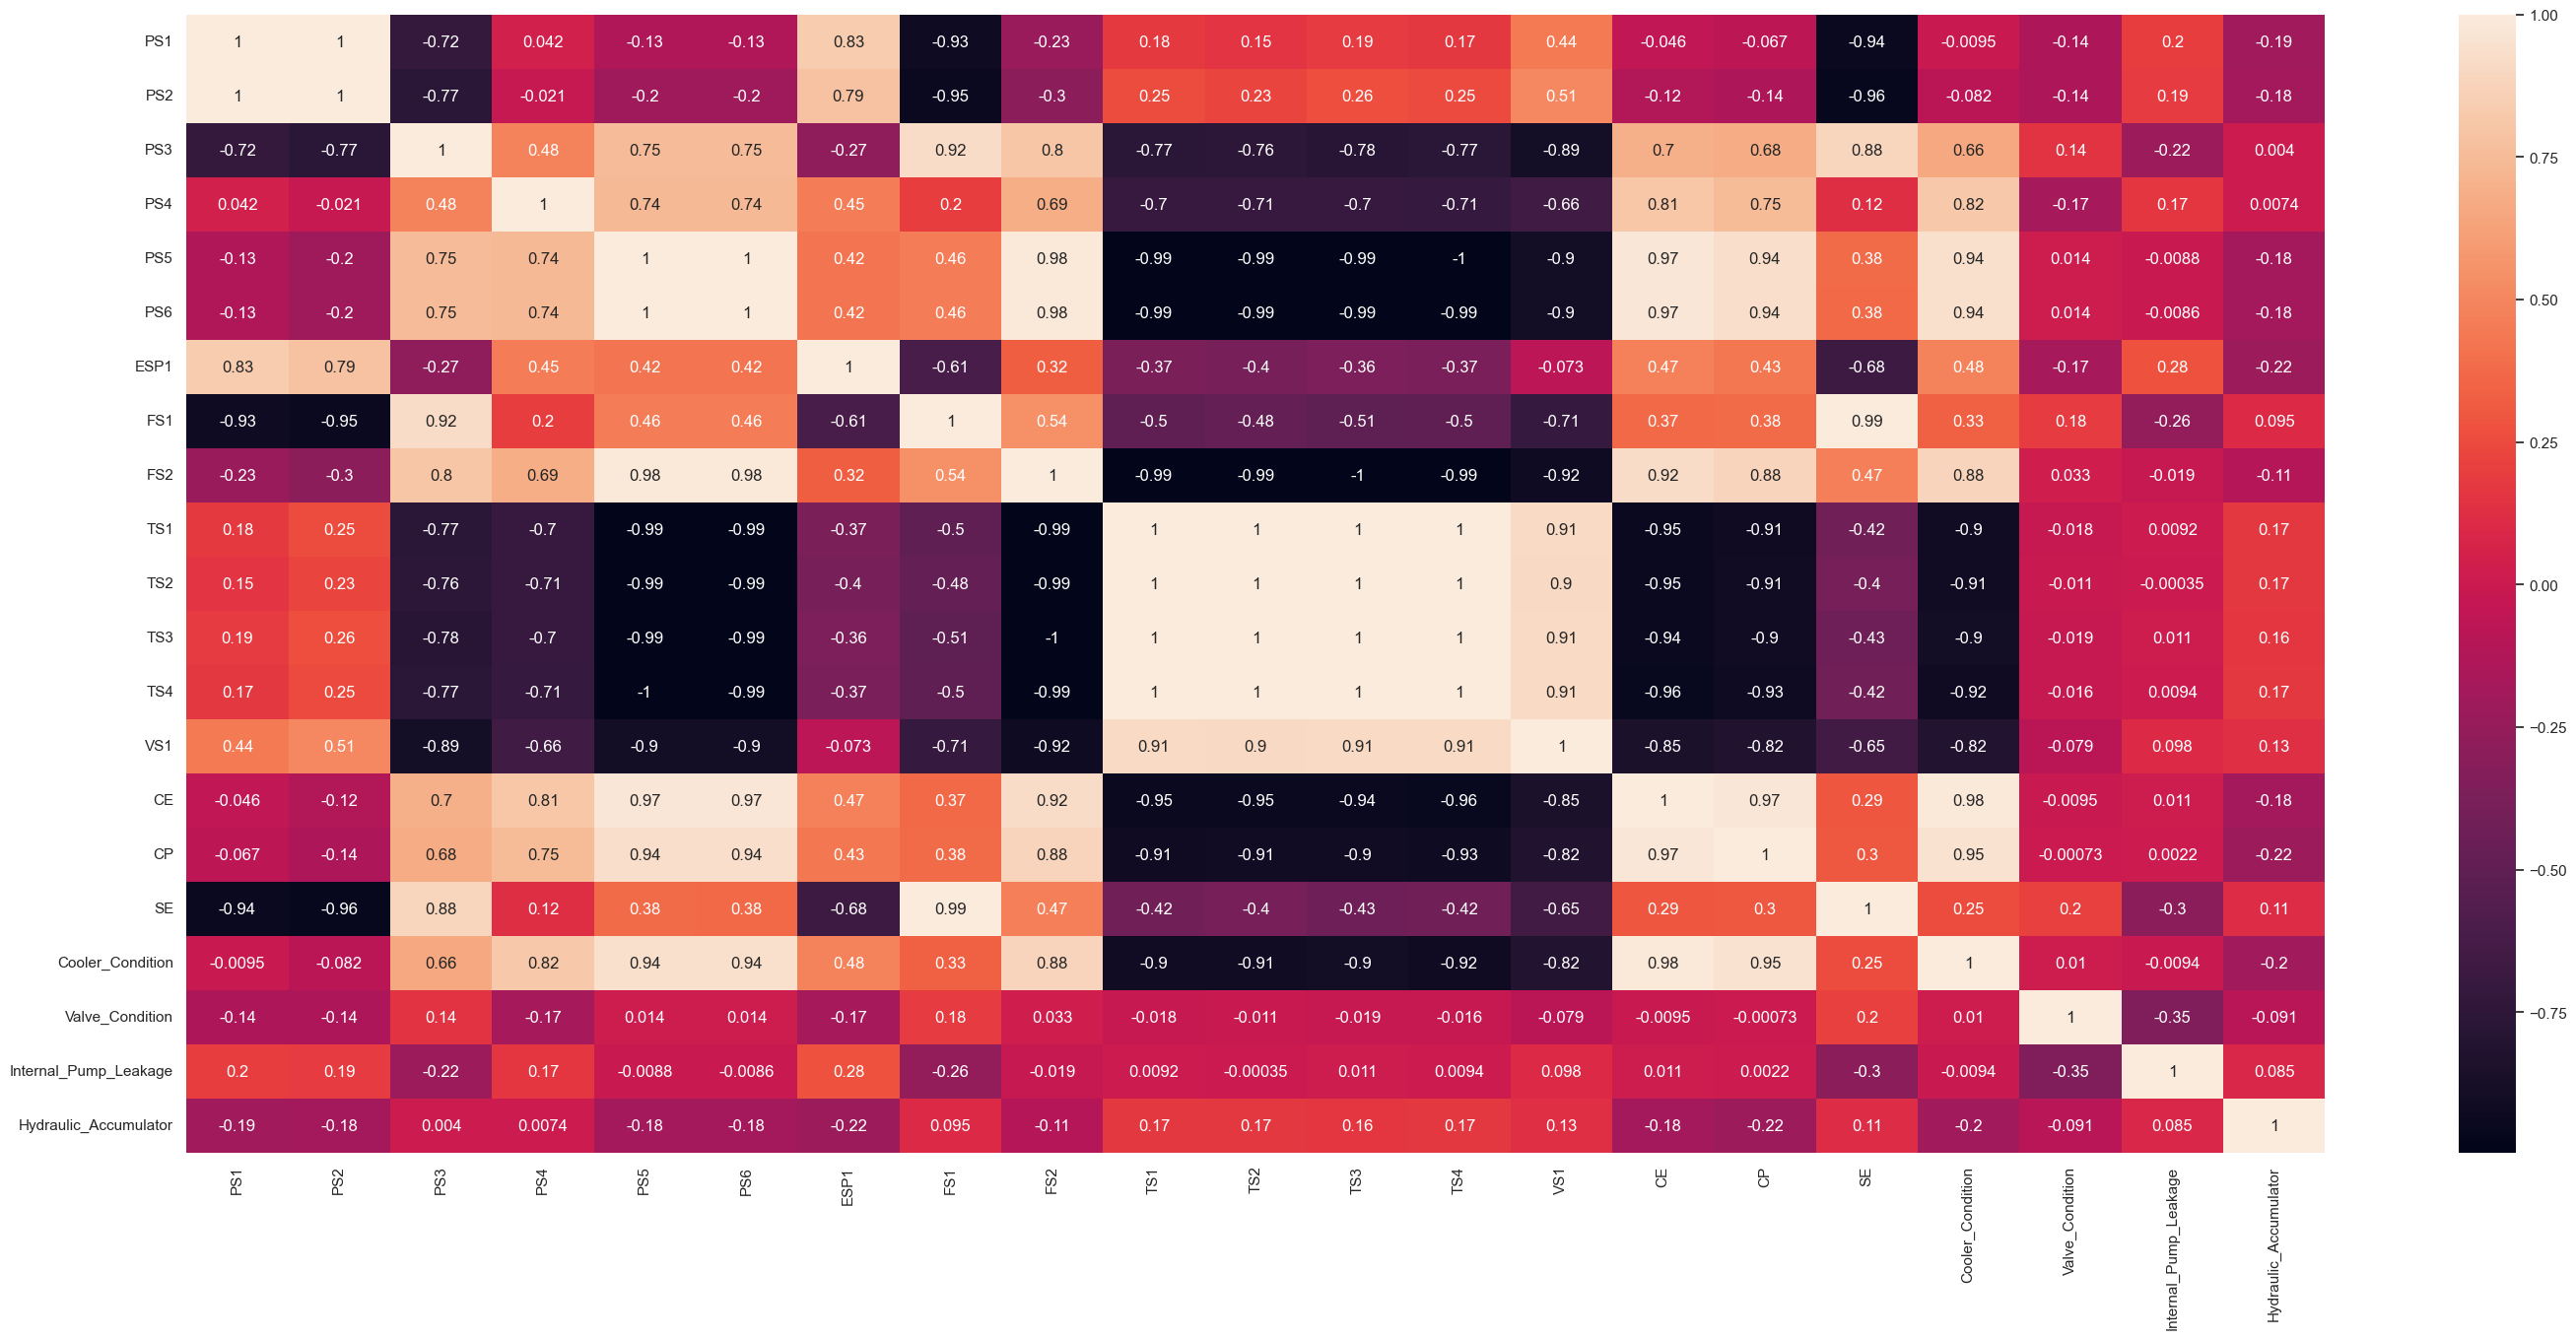

In [304]:
fig=plt.gcf()
fig.set_size_inches((35,15))
sns.heatmap(df_final_15.corr(),annot=True)

In [305]:
fig.savefig("corr_15.png")

In [306]:
class Singleclass_Classification_Models:
    def __init__(self,train_x,test_x,train_y,test_y):
        self.train_x=train_x
        self.test_x=test_x
        self.train_y=train_y
        self.test_y=test_y
    
    def logistic_regression(self):
        global accuracy_score_log_reg_train,accuracy_score_log_reg_test,precision_score_log_reg_train,precision_score_log_reg_test,recall_score_log_reg_train,recall_score_log_reg_test
        log_reg=LogisticRegression(random_state=42)
        log_reg.fit(self.train_x,self.train_y)
        pred_train_y=log_reg.predict(self.train_x)
        pred_test_y=log_reg.predict(self.test_x)
    
        # accuracy_score
        accuracy_score_log_reg_train=accuracy_score(self.train_y,pred_train_y)
        accuracy_score_log_reg_test=accuracy_score(self.test_y,pred_test_y)
        print("accuracy_score_log_reg_train= ",accuracy_score_log_reg_train)
        print("accuracy_score_log_reg_test= ",accuracy_score_log_reg_test)
        print("\n")
        
        # precision-score
        precision_score_log_reg_train=precision_score(self.train_y,pred_train_y)
        precision_score_log_reg_test=precision_score(self.test_y,pred_test_y)
        print("precision_score_log_reg_train= ",precision_score_log_reg_train)
        print("precision_score_log_reg_test= ",precision_score_log_reg_test)  
        print("\n")
        
        # recall-score
        recall_score_log_reg_train=recall_score(self.train_y,pred_train_y)
        recall_score_log_reg_test=recall_score(self.test_y,pred_test_y)
        print("recall_score_log_reg_train= ",recall_score_log_reg_train)
        print("recall_score_log_reg_test= ",recall_score_log_reg_test)
        print("\n")
        
        # cross-validate
        scores=cross_validate(log_reg,self.train_x,self.train_y,scoring=["accuracy","precision","recall"],cv=10)
        accuracy_score_log_reg_cross=scores["test_accuracy"].mean()
        print("accuracy_score_log_reg_cross= ",accuracy_score_log_reg_cross)
        precision_score_log_reg_cross=scores["test_precision"].mean()
        print("precision_score_log_reg_cross= ",precision_score_log_reg_cross)
        recall_score_log_reg_cross=scores["test_recall"].mean()
        print("recall_score_log_reg_cross= ",recall_score_log_reg_cross)
        
        # confusion_matrix
        print("\nconfusion_matrix:-")
        sns.heatmap(confusion_matrix(self.test_y,pred_test_y),annot=True)
        print("\n")
      
    def knearestneighbors(self):
        global accuracy_score_kn_neighbors_train,accuracy_score_kn_neighbors_test,precision_score_kn_neighbors_train,precision_score_kn_neighbors_test,recall_score_kn_neighbors_train,recall_score_kn_neighbors_test
        kn_neighbors=KNeighborsClassifier(n_neighbors=7,p=2)
        kn_neighbors.fit(self.train_x,self.train_y)
        pred_train_y=kn_neighbors.predict(self.train_x)
        pred_test_y=kn_neighbors.predict(self.test_x)
        
        # accuracy_score
        accuracy_score_kn_neighbors_train=accuracy_score(self.train_y,pred_train_y)
        accuracy_score_kn_neighbors_test=accuracy_score(self.test_y,pred_test_y)
        print("accuracy_score_kn_neighbors_train= ",accuracy_score_kn_neighbors_train)
        print("accuracy_score_kn_neighbors_test= ",accuracy_score_kn_neighbors_test)
        print("\n")
        
        # precision-score
        precision_score_kn_neighbors_train=precision_score(self.train_y,pred_train_y)
        precision_score_kn_neighbors_test=precision_score(self.test_y,pred_test_y)
        print("precision_score_kn_neighbors_train= ",precision_score_kn_neighbors_train)
        print("precision_score_kn_neighbors_test= ",precision_score_kn_neighbors_test) 
        print("\n")
        
        # recall-score
        recall_score_kn_neighbors_train=recall_score(self.train_y,pred_train_y)
        recall_score_kn_neighbors_test=recall_score(self.test_y,pred_test_y)
        print("recall_score_kn_neighbors_train= ",recall_score_kn_neighbors_train)
        print("recall_score_kn_neighbors_test= ",recall_score_kn_neighbors_test)
        print("\n")
        
        # cross-validate
        scores=cross_validate(kn_neighbors,self.train_x,self.train_y,scoring=["accuracy","precision","recall"],cv=10)
        accuracy_score_kn_neighbors_cross=scores["test_accuracy"].mean()
        print("accuracy_score_kn_neighbors_cross= ",accuracy_score_kn_neighbors_cross)
        precision_score_kn_neighbors_cross=scores["test_precision"].mean()
        print("precision_score_kn_neighbors_cross= ",precision_score_kn_neighbors_cross)
        recall_score_kn_neighbors_cross=scores["test_recall"].mean()
        print("recall_score_kn_neighbors_cross= ",recall_score_kn_neighbors_cross)
        
        # confusion_matrix
        print("\nconfusion_matrix:-")
        sns.heatmap(confusion_matrix(self.test_y,pred_test_y),annot=True)
        print("\n")
        
    def Svc(self):
        global accuracy_score_svc_train,accuracy_score_svc_test,precision_score_svc_train,precision_score_svc_test,recall_score_svc_train,recall_score_svc_test
        svc=SVC(kernel="rbf")
        svc.fit(self.train_x,self.train_y)
        pred_train_y=svc.predict(self.train_x)
        pred_test_y=svc.predict(self.test_x)
        
        # accuracy_score
        accuracy_score_svc_train=accuracy_score(self.train_y,pred_train_y)
        accuracy_score_svc_test=accuracy_score(self.test_y,pred_test_y)
        print("accuracy_score_svc_train= ",accuracy_score_svc_train)
        print("accuracy_score_svc_test= ",accuracy_score_svc_test)
        print("\n")
        
        # precision-score
        precision_score_svc_train=precision_score(self.train_y,pred_train_y)
        precision_score_svc_test=precision_score(self.test_y,pred_test_y)
        print("precision_score_svc_train= ",precision_score_svc_train)
        print("precision_score_svc_test= ",precision_score_svc_test) 
        print("\n")
        
        # recall-score
        recall_score_svc_train=recall_score(self.train_y,pred_train_y)
        recall_score_svc_test=recall_score(self.test_y,pred_test_y)
        print("recall_score_svc_train= ",recall_score_svc_train)
        print("recall_score_svc_test= ",recall_score_svc_test)
        print("\n")
        
        # cross-validate
        scores=cross_validate(svc,self.train_x,self.train_y,scoring=["accuracy","precision","recall"],cv=10)
        accuracy_score_svc_cross=scores["test_accuracy"].mean()
        print("accuracy_score_svc_cross= ",accuracy_score_svc_cross)
        precision_score_svc_cross=scores["test_precision"].mean()
        print("precision_score_svc_cross= ",precision_score_svc_cross)
        recall_score_svc_cross=scores["test_recall"].mean()
        print("recall_score_svc_cross= ",recall_score_svc_cross)
        
        # confusion_matrix
        print("\nconfusion_matrix:-")
        sns.heatmap(confusion_matrix(self.test_y,pred_test_y),annot=True)
        print("\n")
        
    def naive_bayes(self):
        global accuracy_score_nbc_train,accuracy_score_nbc_test,precision_score_nbc_train,precision_score_nbc_test,recall_score_nbc_train,recall_score_nbc_test
        nbc=GaussianNB()
        nbc.fit(train_x,train_y)
        pred_train_y=nbc.predict(self.train_x)
        pred_test_y=nbc.predict(self.test_x)
        
        # accuracy_score
        accuracy_score_nbc_train=accuracy_score(self.train_y,pred_train_y)
        accuracy_score_nbc_test=accuracy_score(self.test_y,pred_test_y)
        print("accuracy_score_nbc_train= ",accuracy_score_nbc_train)
        print("accuracy_score_nbc_test= ",accuracy_score_nbc_test)
        print("\n")
        
        # precision-score
        precision_score_nbc_train=precision_score(self.train_y,pred_train_y)
        precision_score_nbc_test=precision_score(self.test_y,pred_test_y)
        print("precision_score_nbc_train= ",precision_score_nbc_train)
        print("precision_score_nbc_test= ",precision_score_nbc_test)
        print("\n")
        
        # recall-score
        recall_score_nbc_train=recall_score(self.train_y,pred_train_y)
        recall_score_nbc_test=recall_score(self.test_y,pred_test_y)
        print("recall_score_nbc_train= ",recall_score_nbc_train)
        print("recall_score_nbc_test= ",recall_score_nbc_test)
        print("\n")
        
        # cross-validate
        scores=cross_validate(nbc,self.train_x,self.train_y,scoring=["accuracy","precision","recall"],cv=10)
        accuracy_score_nbc_cross=scores["test_accuracy"].mean()
        print("accuracy_score_nbc_cross= ",accuracy_score_nbc_cross)
        precision_score_nbc_cross=scores["test_precision"].mean()
        print("precision_score_nbc_cross= ",precision_score_nbc_cross)
        recall_score_nbc_cross=scores["test_recall"].mean()
        print("recall_score_nbc_cross= ",recall_score_nbc_cross)
        
        # confusion_matrix
        print("\nconfusion_matrix:-")
        sns.heatmap(confusion_matrix(self.test_y,pred_test_y),annot=True)   
        print("\n")
        
    def decision_tree(self):
        global accuracy_score_dtc_train,accuracy_score_dtc_test,precision_score_dtc_train,precision_score_dtc_test,recall_score_dtc_train,recall_score_dtc_test
        dtc=DecisionTreeClassifier(criterion="entropy",random_state=42)
        dtc.fit(train_x,train_y)
        pred_train_y=dtc.predict(self.train_x)
        pred_test_y=dtc.predict(self.test_x)
        
        # accuracy_score
        accuracy_score_dtc_train=accuracy_score(self.train_y,pred_train_y)
        accuracy_score_dtc_test=accuracy_score(self.test_y,pred_test_y)
        print("accuracy_score_dtc_train= ",accuracy_score_dtc_train)
        print("accuracy_score_dtc_test= ",accuracy_score_dtc_test)
        print("\n")
        
        # precision-score
        precision_score_dtc_train=precision_score(self.train_y,pred_train_y)
        precision_score_dtc_test=precision_score(self.test_y,pred_test_y)
        print("precision_score_dtc_train= ",precision_score_dtc_train)
        print("precision_score_dtc_test= ",precision_score_dtc_test)
        print("\n")
        
        # recall-score
        recall_score_dtc_train=recall_score(self.train_y,pred_train_y)
        recall_score_dtc_test=recall_score(self.test_y,pred_test_y)
        print("recall_score_dtc_train= ",recall_score_dtc_train)
        print("recall_score_dtc_test= ",recall_score_dtc_test)
        print("\n")
        
        # cross-validate
        scores=cross_validate(dtc,self.train_x,self.train_y,scoring=["accuracy","precision","recall"],cv=10)
        accuracy_score_nbc_cross=scores["test_accuracy"].mean()
        print("accuracy_score_dtc_cross= ",accuracy_score_dtc_cross)
        precision_score_dtc_cross=scores["test_precision"].mean()
        print("precision_score_dtc_cross= ",precision_score_dtc_cross)
        recall_score_dtc_cross=scores["test_recall"].mean()
        print("recall_score_dtc_cross= ",recall_score_dtc_cross)
        
        # confusion_matrix
        print("\nconfusion_matrix:-")
        sns.heatmap(confusion_matrix(self.test_y,pred_test_y),annot=True)      
        print("\n")
        
    def random_forest(self):
        global accuracy_score_rfc_train,accuracy_score_rfc_test,precision_score_rfc_train,precision_score_rfc_test,recall_score_rfc_train,recall_score_rfc_test
        rfc=RandomForestClassifier(n_estimators=100,random_state=42,n_jobs=-1)
        rfc.fit(train_x,train_y)
        pred_train_y=rfc.predict(self.train_x)
        pred_test_y=rfc.predict(self.test_x)
        
        # accuracy_score
        accuracy_score_rfc_train=accuracy_score(self.train_y,pred_train_y)
        accuracy_score_rfc_test=accuracy_score(self.test_y,pred_test_y)
        print("accuracy_score_rfc_train= ",accuracy_score_rfc_train)
        print("accuracy_score_rfc_test= ",accuracy_score_rfc_test)
        print("\n")
        
        # precision-score
        precision_score_rfc_train=precision_score(self.train_y,pred_train_y)
        precision_score_rfc_test=precision_score(self.test_y,pred_test_y)
        print("precision_score_rfc_train= ",precision_score_rfc_train)
        print("precision_score_rfc_test= ",precision_score_rfc_test)
        print("\n")
        
        # recall-score
        recall_score_rfc_train=recall_score(self.train_y,pred_train_y)
        recall_score_rfc_test=recall_score(self.test_y,pred_test_y)
        print("recall_score_rfc_train= ",recall_score_rfc_train)
        print("recall_score_rfc_test= ",recall_score_rfc_test)
        print("\n")
        
        # cross-validate
        scores=cross_validate(rfc,self.train_x,self.train_y,scoring=["accuracy","precision","recall"],cv=10)
        accuracy_score_rfc_cross=scores["test_accuracy"].mean()
        print("accuracy_score_rfc_cross= ",accuracy_score_rfc_cross)
        precision_score_rfc_cross=scores["test_precision"].mean()
        print("precision_score_rfc_cross= ",precision_score_rfc_cross)
        recall_score_rfc_cross=scores["test_recall"].mean()
        print("recall_score_rfc_cross= ",recall_score_rfc_cross)
        
        # confusion_matrix
        print("\nconfusion_matrix:-")
        sns.heatmap(confusion_matrix(self.test_y,pred_test_y),annot=True)
        print("\n")
    
    def best_model(self):
        pred_train_accuracy=[accuracy_score_log_reg_train,accuracy_score_kn_neighbors_train,accuracy_score_svc_train
                     ,accuracy_score_nbc_train,accuracy_score_dtc_train,accuracy_score_rfc_train]
        pred_test_accuracy=[accuracy_score_log_reg_test,accuracy_score_kn_neighbors_test,accuracy_score_svc_test
                             ,accuracy_score_nbc_test,accuracy_score_dtc_test,accuracy_score_rfc_test]
        pred_train_precision=[precision_score_log_reg_train,precision_score_kn_neighbors_train,precision_score_svc_train
                            ,precision_score_nbc_train,precision_score_dtc_train,precision_score_rfc_train]
        pred_test_precision=[precision_score_log_reg_test,precision_score_kn_neighbors_test,precision_score_svc_test
                             ,precision_score_nbc_test,precision_score_dtc_test,precision_score_rfc_test]
        pred_train_recall=[recall_score_log_reg_train,recall_score_kn_neighbors_train,recall_score_svc_train,recall_score_nbc_train
                          ,recall_score_dtc_train,recall_score_rfc_train]
        pred_test_recall=[recall_score_log_reg_test,recall_score_kn_neighbors_test,recall_score_svc_test,recall_score_nbc_test
                         ,recall_score_dtc_test,recall_score_rfc_test]

        df_train_accuracy=pd.DataFrame(pred_train_accuracy,columns=["train"])
        df_test_accuracy=pd.DataFrame(pred_test_accuracy,columns=["test"])
        
        df_train_precision=pd.DataFrame(pred_train_precision,columns=["train"])
        df_test_precision=pd.DataFrame(pred_test_precision,columns=["test"])
        
        df_train_recall=pd.DataFrame(pred_train_recall,columns=["train"])
        df_test_recall=pd.DataFrame(pred_test_recall,columns=["test"])
        
        df_accuracy=pd.concat([df_train_accuracy,df_test_accuracy],axis=1)
        df_precision=pd.concat([df_train_precision,df_test_precision],axis=1)
        df_recall=pd.concat([df_train_recall,df_test_recall],axis=1)
        df_best_model=pd.concat([df_accuracy,df_precision,df_recall],keys=["accuracy","precision","recall"],axis=1)
        df_best_model.set_axis(["logistic_reg_cl","knn_cl","sv_cl","naive-bayes_cl","decision_tree_cl","random_forest_cl"],axis=0)
        return df_best_model

In [307]:
class Multiclass_Classification_Models:
    def __init__(self,train_x,test_x,train_y,test_y):
        self.train_x=train_x
        self.test_x=test_x
        self.train_y=train_y
        self.test_y=test_y
    
    def logistic_regression(self):
        global accuracy_score_log_reg_train,accuracy_score_log_reg_test,precision_score_log_reg_train,precision_score_log_reg_test,recall_score_log_reg_train,recall_score_log_reg_test
        log_reg=LogisticRegression(random_state=42)
        log_reg.fit(self.train_x,self.train_y)
        pred_train_y=log_reg.predict(self.train_x)
        pred_test_y=log_reg.predict(self.test_x)
    
        # accuracy_score
        accuracy_score_log_reg_train=accuracy_score(self.train_y,pred_train_y)
        accuracy_score_log_reg_test=accuracy_score(self.test_y,pred_test_y)
        print("accuracy_score_log_reg_train= ",accuracy_score_log_reg_train)
        print("accuracy_score_log_reg_test= ",accuracy_score_log_reg_test)
        print("\n")
        
        # precision-score
        precision_score_log_reg_train=precision_score(self.train_y,pred_train_y,average="weighted")
        precision_score_log_reg_test=precision_score(self.test_y,pred_test_y,average="weighted")
        print("precision_score_log_reg_train= ",precision_score_log_reg_train)
        print("precision_score_log_reg_test= ",precision_score_log_reg_test)  
        print("\n")
        
        # recall-score
        recall_score_log_reg_train=recall_score(self.train_y,pred_train_y,average="weighted")
        recall_score_log_reg_test=recall_score(self.test_y,pred_test_y,average="weighted")
        print("recall_score_log_reg_train= ",recall_score_log_reg_train)
        print("recall_score_log_reg_test= ",recall_score_log_reg_test)
        print("\n")
        
        # cross-validate
        scores=cross_validate(log_reg,self.train_x,self.train_y,scoring=["accuracy","precision_weighted","recall_weighted"],cv=10)
        accuracy_score_log_reg_cross=scores["test_accuracy"].mean()
        print("accuracy_score_log_reg_cross= ",accuracy_score_log_reg_cross)
        precision_score_log_reg_cross=scores["test_precision_weighted"].mean()
        print("precision_score_log_reg_cross= ",precision_score_log_reg_cross)
        recall_score_log_reg_cross=scores["test_recall_weighted"].mean()
        print("recall_score_log_reg_cross= ",recall_score_log_reg_cross)
        
        # confusion_matrix
        print("\nconfusion_matrix:-")
        sns.heatmap(confusion_matrix(self.test_y,pred_test_y),annot=True)
        print("\n")
      
    def knearestneighbors(self):
        global accuracy_score_kn_neighbors_train,accuracy_score_kn_neighbors_test,precision_score_kn_neighbors_train,precision_score_kn_neighbors_test,recall_score_kn_neighbors_train,recall_score_kn_neighbors_test
        kn_neighbors=KNeighborsClassifier(n_neighbors=7,p=2)
        kn_neighbors.fit(self.train_x,self.train_y)
        pred_train_y=kn_neighbors.predict(self.train_x)
        pred_test_y=kn_neighbors.predict(self.test_x)
        
        # accuracy_score
        accuracy_score_kn_neighbors_train=accuracy_score(self.train_y,pred_train_y)
        accuracy_score_kn_neighbors_test=accuracy_score(self.test_y,pred_test_y)
        print("accuracy_score_kn_neighbors_train= ",accuracy_score_kn_neighbors_train)
        print("accuracy_score_kn_neighbors_test= ",accuracy_score_kn_neighbors_test)
        print("\n")
        
        # precision-score
        precision_score_kn_neighbors_train=precision_score(self.train_y,pred_train_y,average="weighted")
        precision_score_kn_neighbors_test=precision_score(self.test_y,pred_test_y,average="weighted")
        print("precision_score_kn_neighbors_train= ",precision_score_kn_neighbors_train)
        print("precision_score_kn_neighbors_test= ",precision_score_kn_neighbors_test) 
        print("\n")
        
        # recall-score
        recall_score_kn_neighbors_train=recall_score(self.train_y,pred_train_y,average="weighted")
        recall_score_kn_neighbors_test=recall_score(self.test_y,pred_test_y,average="weighted")
        print("recall_score_kn_neighbors_train= ",recall_score_kn_neighbors_train)
        print("recall_score_kn_neighbors_test= ",recall_score_kn_neighbors_test)
        print("\n")
        
        # cross-validate
        scores=cross_validate(kn_neighbors,self.train_x,self.train_y,scoring=["accuracy","precision_weighted","recall_weighted"],cv=10)
        accuracy_score_kn_neighbors_cross=scores["test_accuracy"].mean()
        print("accuracy_score_kn_neighbors_cross= ",accuracy_score_kn_neighbors_cross)
        precision_score_kn_neighbors_cross=scores["test_precision_weighted"].mean()
        print("precision_score_kn_neighbors_cross= ",precision_score_kn_neighbors_cross)
        recall_score_kn_neighbors_cross=scores["test_recall_weighted"].mean()
        print("recall_score_kn_neighbors_cross= ",recall_score_kn_neighbors_cross)
        
        # confusion_matrix
        print("\nconfusion_matrix:-")
        sns.heatmap(confusion_matrix(self.test_y,pred_test_y),annot=True)
        print("\n")
        
    def Svc(self):
        global accuracy_score_svc_train,accuracy_score_svc_test,precision_score_svc_train,precision_score_svc_test,recall_score_svc_train,recall_score_svc_test
        svc=SVC(kernel="rbf")
        svc.fit(self.train_x,self.train_y)
        pred_train_y=svc.predict(self.train_x)
        pred_test_y=svc.predict(self.test_x)
        
        # accuracy_score
        accuracy_score_svc_train=accuracy_score(self.train_y,pred_train_y)
        accuracy_score_svc_test=accuracy_score(self.test_y,pred_test_y)
        print("accuracy_score_svc_train= ",accuracy_score_svc_train)
        print("accuracy_score_svc_test= ",accuracy_score_svc_test)
        print("\n")
        
        # precision-score
        precision_score_svc_train=precision_score(self.train_y,pred_train_y,average="weighted")
        precision_score_svc_test=precision_score(self.test_y,pred_test_y,average="weighted")
        print("precision_score_svc_train= ",precision_score_svc_train)
        print("precision_score_svc_test= ",precision_score_svc_test) 
        print("\n")
        
        # recall-score
        recall_score_svc_train=recall_score(self.train_y,pred_train_y,average="weighted")
        recall_score_svc_test=recall_score(self.test_y,pred_test_y,average="weighted")
        print("recall_score_svc_train= ",recall_score_svc_train)
        print("recall_score_svc_test= ",recall_score_svc_test)
        print("\n")
        
        # cross-validate
        scores=cross_validate(svc,self.train_x,self.train_y,scoring=["accuracy","precision_weighted","recall_weighted"],cv=10)
        accuracy_score_svc_cross=scores["test_accuracy"].mean()
        print("accuracy_score_svc_cross= ",accuracy_score_svc_cross)
        precision_score_svc_cross=scores["test_precision_weighted"].mean()
        print("precision_score_svc_cross= ",precision_score_svc_cross)
        recall_score_svc_cross=scores["test_recall_weighted"].mean()
        print("recall_score_svc_cross= ",recall_score_svc_cross)
        
        # confusion_matrix
        print("\nconfusion_matrix:-")
        sns.heatmap(confusion_matrix(self.test_y,pred_test_y),annot=True)
        print("\n")
        
    def naive_bayes(self):
        global accuracy_score_nbc_train,accuracy_score_nbc_test,precision_score_nbc_train,precision_score_nbc_test,recall_score_nbc_train,recall_score_nbc_test
        nbc=GaussianNB()
        nbc.fit(train_x,train_y)
        pred_train_y=nbc.predict(self.train_x)
        pred_test_y=nbc.predict(self.test_x)
        
        # accuracy_score
        accuracy_score_nbc_train=accuracy_score(self.train_y,pred_train_y)
        accuracy_score_nbc_test=accuracy_score(self.test_y,pred_test_y)
        print("accuracy_score_nbc_train= ",accuracy_score_nbc_train)
        print("accuracy_score_nbc_test= ",accuracy_score_nbc_test)
        print("\n")
        
        # precision-score
        precision_score_nbc_train=precision_score(self.train_y,pred_train_y,average="weighted")
        precision_score_nbc_test=precision_score(self.test_y,pred_test_y,average="weighted")
        print("precision_score_nbc_train= ",precision_score_nbc_train)
        print("precision_score_nbc_test= ",precision_score_nbc_test)
        print("\n")
        
        # recall-score
        recall_score_nbc_train=recall_score(self.train_y,pred_train_y,average="weighted")
        recall_score_nbc_test=recall_score(self.test_y,pred_test_y,average="weighted")
        print("recall_score_nbc_train= ",recall_score_nbc_train)
        print("recall_score_nbc_test= ",recall_score_nbc_test)
        print("\n")
        
        # cross-validate
        scores=cross_validate(nbc,self.train_x,self.train_y,scoring=["accuracy","precision_weighted","recall_weighted"],cv=10)
        accuracy_score_nbc_cross=scores["test_accuracy"].mean()
        print("accuracy_score_nbc_cross= ",accuracy_score_nbc_cross)
        precision_score_nbc_cross=scores["test_precision_weighted"].mean()
        print("precision_score_nbc_cross= ",precision_score_nbc_cross)
        recall_score_nbc_cross=scores["test_recall_weighted"].mean()
        print("recall_score_nbc_cross= ",recall_score_nbc_cross)
        
        # confusion_matrix
        print("\nconfusion_matrix:-")
        sns.heatmap(confusion_matrix(self.test_y,pred_test_y),annot=True)   
        print("\n")
        
    def decision_tree(self):
        global accuracy_score_dtc_train,accuracy_score_dtc_test,precision_score_dtc_train,precision_score_dtc_test,recall_score_dtc_train,recall_score_dtc_test
        dtc=DecisionTreeClassifier(criterion="entropy",random_state=42)
        dtc.fit(train_x,train_y)
        pred_train_y=dtc.predict(self.train_x)
        pred_test_y=dtc.predict(self.test_x)
        
        # accuracy_score
        accuracy_score_dtc_train=accuracy_score(self.train_y,pred_train_y)
        accuracy_score_dtc_test=accuracy_score(self.test_y,pred_test_y)
        print("accuracy_score_dtc_train= ",accuracy_score_dtc_train)
        print("accuracy_score_dtc_test= ",accuracy_score_dtc_test)
        print("\n")
        
        # precision-score
        precision_score_dtc_train=precision_score(self.train_y,pred_train_y,average="weighted")
        precision_score_dtc_test=precision_score(self.test_y,pred_test_y,average="weighted")
        print("precision_score_dtc_train= ",precision_score_dtc_train)
        print("precision_score_dtc_test= ",precision_score_dtc_test)
        print("\n")
        
        # recall-score
        recall_score_dtc_train=recall_score(self.train_y,pred_train_y,average="weighted")
        recall_score_dtc_test=recall_score(self.test_y,pred_test_y,average="weighted")
        print("recall_score_dtc_train= ",recall_score_dtc_train)
        print("recall_score_dtc_test= ",recall_score_dtc_test)
        print("\n")
        
        # cross-validate
        scores=cross_validate(dtc,self.train_x,self.train_y,scoring=["accuracy","precision_weighted","recall_weighted"],cv=10)
        accuracy_score_nbc_cross=scores["test_accuracy"].mean()
        print("accuracy_score_dtc_cross= ",accuracy_score_dtc_cross)
        precision_score_dtc_cross=scores["test_precision_weighted"].mean()
        print("precision_score_dtc_cross= ",precision_score_dtc_cross)
        recall_score_dtc_cross=scores["test_recall_weighted"].mean()
        print("recall_score_dtc_cross= ",recall_score_dtc_cross)
        
        # confusion_matrix
        print("\nconfusion_matrix:-")
        sns.heatmap(confusion_matrix(self.test_y,pred_test_y),annot=True)      
        print("\n")
        
    def random_forest(self):
        global accuracy_score_rfc_train,accuracy_score_rfc_test,precision_score_rfc_train,precision_score_rfc_test,recall_score_rfc_train,recall_score_rfc_test
        rfc=RandomForestClassifier(n_estimators=100,random_state=42,n_jobs=-1)
        rfc.fit(train_x,train_y)
        pred_train_y=rfc.predict(self.train_x)
        pred_test_y=rfc.predict(self.test_x)
        
        # accuracy_score
        accuracy_score_rfc_train=accuracy_score(self.train_y,pred_train_y)
        accuracy_score_rfc_test=accuracy_score(self.test_y,pred_test_y)
        print("accuracy_score_rfc_train= ",accuracy_score_rfc_train)
        print("accuracy_score_rfc_test= ",accuracy_score_rfc_test)
        print("\n")
        
        # precision-score
        precision_score_rfc_train=precision_score(self.train_y,pred_train_y,average="weighted")
        precision_score_rfc_test=precision_score(self.test_y,pred_test_y,average="weighted")
        print("precision_score_rfc_train= ",precision_score_rfc_train)
        print("precision_score_rfc_test= ",precision_score_rfc_test)
        print("\n")
        
        # recall-score
        recall_score_rfc_train=recall_score(self.train_y,pred_train_y,average="weighted")
        recall_score_rfc_test=recall_score(self.test_y,pred_test_y,average="weighted")
        print("recall_score_rfc_train= ",recall_score_rfc_train)
        print("recall_score_rfc_test= ",recall_score_rfc_test)
        print("\n")
        
        # cross-validate
        scores=cross_validate(rfc,self.train_x,self.train_y,scoring=["accuracy","precision_weighted","recall_weighted"],cv=10)
        accuracy_score_rfc_cross=scores["test_accuracy"].mean()
        print("accuracy_score_rfc_cross= ",accuracy_score_rfc_cross)
        precision_score_rfc_cross=scores["test_precision_weighted"].mean()
        print("precision_score_rfc_cross= ",precision_score_rfc_cross)
        recall_score_rfc_cross=scores["test_recall_weighted"].mean()
        print("recall_score_rfc_cross= ",recall_score_rfc_cross)
        
        # confusion_matrix
        print("\nconfusion_matrix:-")
        sns.heatmap(confusion_matrix(self.test_y,pred_test_y),annot=True)
        print("\n")
    
    def best_model(self):
        pred_train_accuracy=[accuracy_score_log_reg_train,accuracy_score_kn_neighbors_train,accuracy_score_svc_train
                     ,accuracy_score_nbc_train,accuracy_score_dtc_train,accuracy_score_rfc_train]
        pred_test_accuracy=[accuracy_score_log_reg_test,accuracy_score_kn_neighbors_test,accuracy_score_svc_test
                             ,accuracy_score_nbc_test,accuracy_score_dtc_test,accuracy_score_rfc_test]
        pred_train_precision=[precision_score_log_reg_train,precision_score_kn_neighbors_train,precision_score_svc_train
                            ,precision_score_nbc_train,precision_score_dtc_train,precision_score_rfc_train]
        pred_test_precision=[precision_score_log_reg_test,precision_score_kn_neighbors_test,precision_score_svc_test
                             ,precision_score_nbc_test,precision_score_dtc_test,precision_score_rfc_test]
        pred_train_recall=[recall_score_log_reg_train,recall_score_kn_neighbors_train,recall_score_svc_train,recall_score_nbc_train
                          ,recall_score_dtc_train,recall_score_rfc_train]
        pred_test_recall=[recall_score_log_reg_test,recall_score_kn_neighbors_test,recall_score_svc_test,recall_score_nbc_test
                         ,recall_score_dtc_test,recall_score_rfc_test]

        df_train_accuracy=pd.DataFrame(pred_train_accuracy,columns=["train"])
        df_test_accuracy=pd.DataFrame(pred_test_accuracy,columns=["test"])
        
        df_train_precision=pd.DataFrame(pred_train_precision,columns=["train"])
        df_test_precision=pd.DataFrame(pred_test_precision,columns=["test"])
        
        df_train_recall=pd.DataFrame(pred_train_recall,columns=["train"])
        df_test_recall=pd.DataFrame(pred_test_recall,columns=["test"])
        
        df_accuracy=pd.concat([df_train_accuracy,df_test_accuracy],axis=1)
        df_precision=pd.concat([df_train_precision,df_test_precision],axis=1)
        df_recall=pd.concat([df_train_recall,df_test_recall],axis=1)
        df_best_model=pd.concat([df_accuracy,df_precision,df_recall],keys=["accuracy","precision","recall"],axis=1)
        df_best_model.set_axis(["logistic_reg_cl","knn_cl","sv_cl","naive-bayes_cl","decision_tree_cl","random_forest_cl"],axis=0)
        return df_best_model

In [308]:
round((target_15_1.value_counts(normalize=True)),4)

Cooler_Condition
100.0    0.3382
20.0     0.3341
3.0      0.3277
Name: proportion, dtype: float64

In [309]:
train_x=sc.fit_transform(train_x)
test_x=sc.transform(test_x)

In [310]:
all_models1=Multiclass_Classification_Models(train_x,test_x,train_y,test_y)

accuracy_score_log_reg_train=  0.9308390022675737
accuracy_score_log_reg_test=  0.9297052154195011


precision_score_log_reg_train=  0.9368775080011149
precision_score_log_reg_test=  0.9370167714939951


recall_score_log_reg_train=  0.9308390022675737
recall_score_log_reg_test=  0.9297052154195011


accuracy_score_log_reg_cross=  0.9308294812532101
precision_score_log_reg_cross=  0.9370839262437866
recall_score_log_reg_cross=  0.9308294812532101

confusion_matrix:-




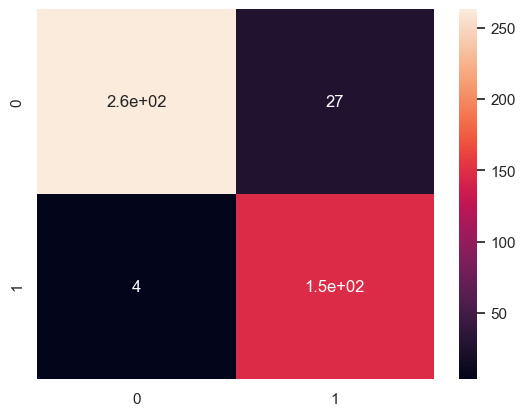

In [311]:
all_models1.logistic_regression()

accuracy_score_kn_neighbors_train=  0.9308390022675737
accuracy_score_kn_neighbors_test=  0.9206349206349206


precision_score_kn_neighbors_train=  0.9316193183741157
precision_score_kn_neighbors_test=  0.9207700624109293


recall_score_kn_neighbors_train=  0.9308390022675737
recall_score_kn_neighbors_test=  0.9206349206349206


accuracy_score_kn_neighbors_cross=  0.9212057010785824
precision_score_kn_neighbors_cross=  0.923580820333765
recall_score_kn_neighbors_cross=  0.9212057010785824

confusion_matrix:-




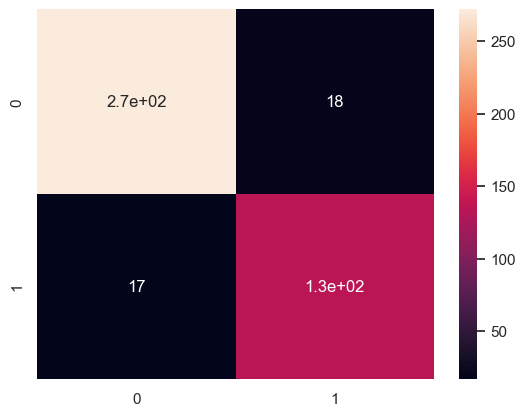

In [312]:
all_models1.knearestneighbors()

accuracy_score_svc_train=  0.9308390022675737
accuracy_score_svc_test=  0.9297052154195011


precision_score_svc_train=  0.9368775080011149
precision_score_svc_test=  0.9370167714939951


recall_score_svc_train=  0.9308390022675737
recall_score_svc_test=  0.9297052154195011


accuracy_score_svc_cross=  0.9285663841807908
precision_score_svc_cross=  0.9342336486974918
recall_score_svc_cross=  0.9285663841807908

confusion_matrix:-




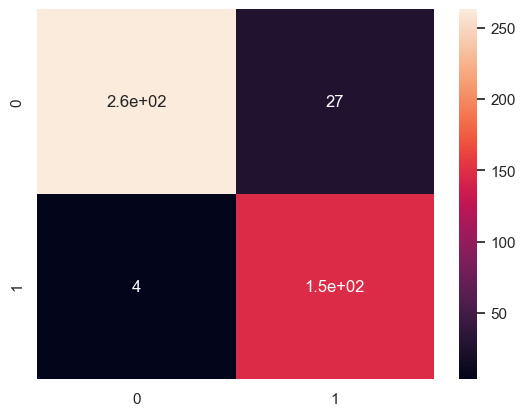

In [313]:
all_models1.Svc()

accuracy_score_nbc_train=  0.8849206349206349
accuracy_score_nbc_test=  0.8684807256235828


precision_score_nbc_train=  0.9092664773185077
precision_score_nbc_test=  0.9008924997586192


recall_score_nbc_train=  0.8849206349206349
recall_score_nbc_test=  0.8684807256235828


accuracy_score_nbc_cross=  0.8849287365177195
precision_score_nbc_cross=  0.9101842952444527
recall_score_nbc_cross=  0.8849287365177195

confusion_matrix:-




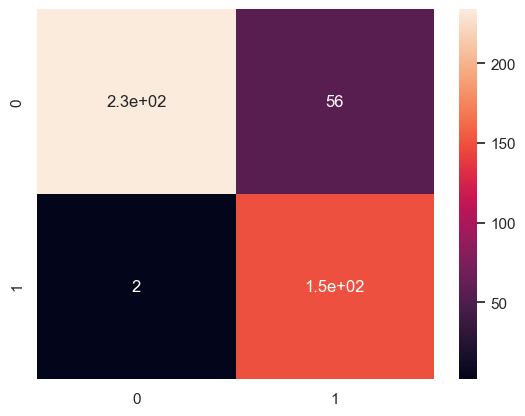

In [314]:
all_models1.naive_bayes()

accuracy_score_dtc_train=  0.9319727891156463
accuracy_score_dtc_test=  0.9160997732426304


precision_score_dtc_train=  0.9328475731356284
precision_score_dtc_test=  0.9159757190390475


recall_score_dtc_train=  0.9319727891156463
recall_score_dtc_test=  0.9160997732426304


accuracy_score_dtc_cross=  0.9138418079096043
precision_score_dtc_cross=  0.9152960074383817
recall_score_dtc_cross=  0.9138418079096043

confusion_matrix:-




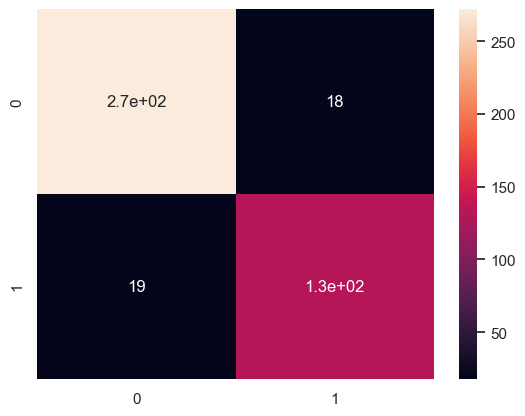

In [315]:
all_models1.decision_tree()    #overfitting

accuracy_score_rfc_train=  0.9319727891156463
accuracy_score_rfc_test=  0.9229024943310657


precision_score_rfc_train=  0.9362342210143098
precision_score_rfc_test=  0.9279814489898522


recall_score_rfc_train=  0.9319727891156463
recall_score_rfc_test=  0.9229024943310657


accuracy_score_rfc_cross=  0.9172380585516178
precision_score_rfc_cross=  0.9195740592478092
recall_score_rfc_cross=  0.9172380585516178

confusion_matrix:-




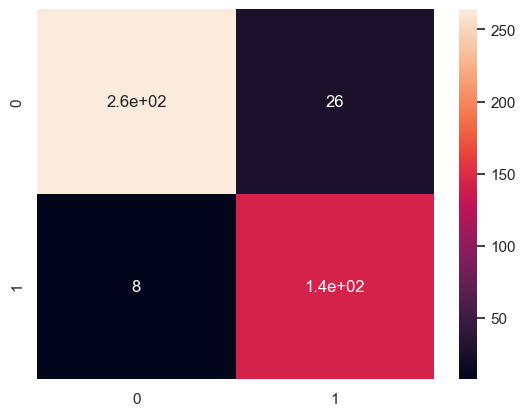

In [316]:
all_models1.random_forest()    #overfitting

In [317]:
all_models1.best_model()

accuracy           precision              recall          
      train      test     train      test     train      test
0  0.930839  0.929705  0.936878  0.937017  0.930839  0.929705
1  0.930839  0.920635  0.931619  0.920770  0.930839  0.920635
2  0.930839  0.929705  0.936878  0.937017  0.930839  0.929705
3  0.884921  0.868481  0.909266  0.900892  0.884921  0.868481
4  0.931973  0.916100  0.932848  0.915976  0.931973  0.916100
5  0.931973  0.922902  0.936234  0.927981  0.931973  0.922902

In [318]:
print("logistic_regression= ",round(0.986471,4))

logistic_regression=  0.9865


In [319]:
l_classifier=LogisticRegression(random_state=42)
l_classifier.fit(train_x,train_y)
pred_test_y=l_classifier.predict(test_x)

In [320]:
target1_15_pred_values=pred_test_y

In [321]:
round((target_15_2.value_counts(normalize=True)),4)

Valve_Condition
100.0    0.5071
73.0     0.1643
80.0     0.1643
90.0     0.1643
Name: proportion, dtype: float64

In [322]:
train_x,test_x,train_y,test_y=train_test_split(x_15,target_15_2,test_size=0.2,random_state=1)

In [323]:
train_x=sc.fit_transform(train_x)
test_x=sc.transform(test_x)

In [324]:
all_models2=Multiclass_Classification_Models(train_x,test_x,train_y,test_y)

accuracy_score_log_reg_train=  0.5753424657534246
accuracy_score_log_reg_test=  0.55125284738041


precision_score_log_reg_train=  0.5273528253341933
precision_score_log_reg_test=  0.5074526548909425


recall_score_log_reg_train=  0.5753424657534246
recall_score_log_reg_test=  0.55125284738041


accuracy_score_log_reg_cross=  0.5610714285714286
precision_score_log_reg_cross=  0.5102844490390704
recall_score_log_reg_cross=  0.5610714285714286

confusion_matrix:-




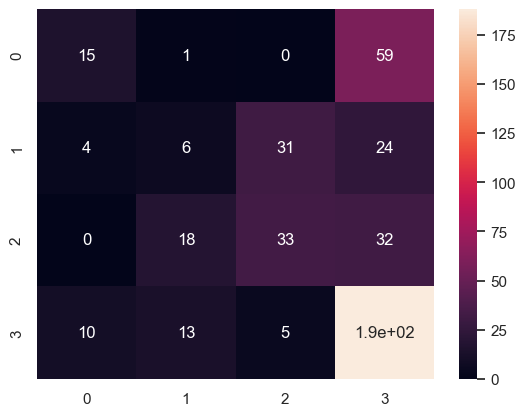

In [325]:
all_models2.logistic_regression()    # not accepted

accuracy_score_kn_neighbors_train=  0.7842465753424658
accuracy_score_kn_neighbors_test=  0.6400911161731208


precision_score_kn_neighbors_train=  0.7887073218959187
precision_score_kn_neighbors_test=  0.6393010531366468


recall_score_kn_neighbors_train=  0.7842465753424658
recall_score_kn_neighbors_test=  0.6400911161731208


accuracy_score_kn_neighbors_cross=  0.6758084415584414
precision_score_kn_neighbors_cross=  0.669634507989729
recall_score_kn_neighbors_cross=  0.6758084415584414

confusion_matrix:-




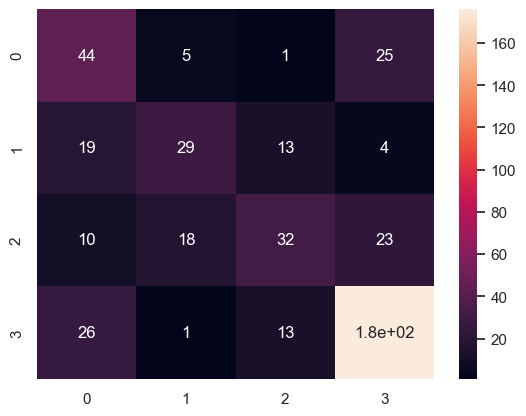

In [326]:
all_models2.knearestneighbors()         #not accepted

accuracy_score_svc_train=  0.5154109589041096
accuracy_score_svc_test=  0.4920273348519362


precision_score_svc_train=  0.44051011341972773
precision_score_svc_test=  0.31720475361281936


recall_score_svc_train=  0.5154109589041096
recall_score_svc_test=  0.4920273348519362


accuracy_score_svc_cross=  0.5074123376623377
precision_score_svc_cross=  0.3061199231431798
recall_score_svc_cross=  0.5074123376623377

confusion_matrix:-




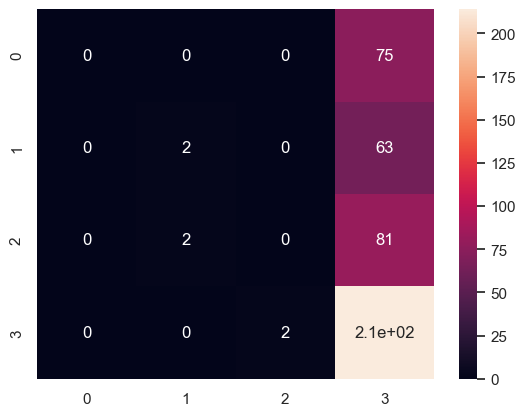

In [327]:
all_models2.Svc()      #not accepted

accuracy_score_nbc_train=  0.5114155251141552
accuracy_score_nbc_test=  0.48291571753986334


precision_score_nbc_train=  0.38470107276142845
precision_score_nbc_test=  0.28637565915688307


recall_score_nbc_train=  0.5114155251141552
recall_score_nbc_test=  0.48291571753986334


accuracy_score_nbc_cross=  0.502288961038961
precision_score_nbc_cross=  0.32493354550988707
recall_score_nbc_cross=  0.502288961038961

confusion_matrix:-




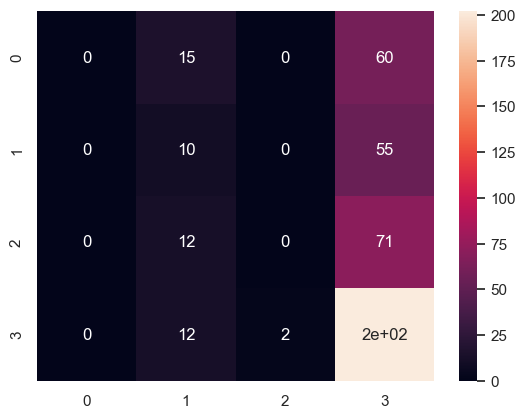

In [328]:
all_models2.naive_bayes()     #not accepted

accuracy_score_dtc_train=  1.0
accuracy_score_dtc_test=  0.6810933940774487


precision_score_dtc_train=  1.0
precision_score_dtc_test=  0.6819277230477746


recall_score_dtc_train=  1.0
recall_score_dtc_test=  0.6810933940774487


accuracy_score_dtc_cross=  0.9138418079096043
precision_score_dtc_cross=  0.7255383469047019
recall_score_dtc_cross=  0.7243376623376625

confusion_matrix:-




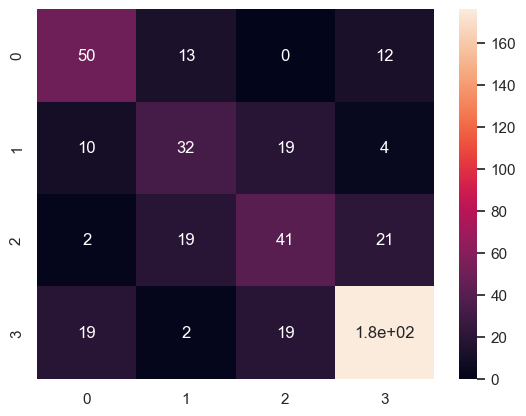

In [329]:
all_models2.decision_tree()     

accuracy_score_rfc_train=  1.0
accuracy_score_rfc_test=  0.7904328018223234


precision_score_rfc_train=  1.0
precision_score_rfc_test=  0.7876091007437719


recall_score_rfc_train=  1.0
recall_score_rfc_test=  0.7904328018223234


accuracy_score_rfc_cross=  0.8025162337662337
precision_score_rfc_cross=  0.8043897683088324
recall_score_rfc_cross=  0.8025162337662337

confusion_matrix:-




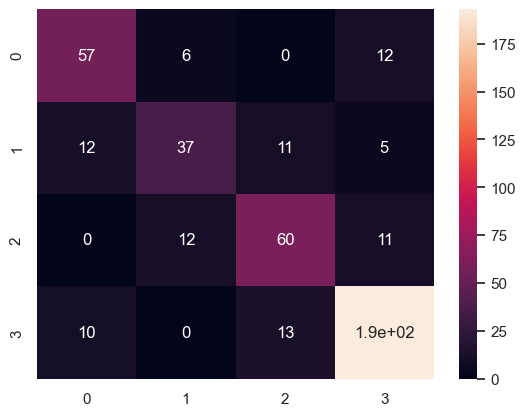

In [330]:
all_models2.random_forest()      

In [331]:
all_models2.best_model()

accuracy           precision              recall          
      train      test     train      test     train      test
0  0.575342  0.551253  0.527353  0.507453  0.575342  0.551253
1  0.784247  0.640091  0.788707  0.639301  0.784247  0.640091
2  0.515411  0.492027  0.440510  0.317205  0.515411  0.492027
3  0.511416  0.482916  0.384701  0.286376  0.511416  0.482916
4  1.000000  0.681093  1.000000  0.681928  1.000000  0.681093
5  1.000000  0.790433  1.000000  0.787609  1.000000  0.790433

In [332]:
print("random_forest_classifier= ",round(0.787609,4))

random_forest_classifier=  0.7876


In [333]:
rfc=RandomForestClassifier(n_estimators=100,random_state=42)
rfc.fit(train_x,train_y)
pred_test_y=rfc.predict(test_x)

In [334]:
target2_15_pred_values=pred_test_y

In [335]:
target_15_3=target_15_3.astype(int)
target_15_3

0       0
1       0
2       0
3       0
4       0
       ..
2186    0
2187    0
2188    0
2189    0
2190    0
Name: Internal_Pump_Leakage, Length: 2191, dtype: int32

In [336]:
round((target_15_3.value_counts(normalize=True)),4)

Internal_Pump_Leakage
0    0.5509
2    0.2246
1    0.2246
Name: proportion, dtype: float64

In [337]:
train_x,test_x,train_y,test_y=train_test_split(x_15,target_15_3,test_size=0.2,random_state=1)

In [338]:
train_x=sc.fit_transform(train_x)
test_x=sc.transform(test_x)

In [339]:
all_models3=Multiclass_Classification_Models(train_x,test_x,train_y,test_y)

accuracy_score_log_reg_train=  0.7248858447488584
accuracy_score_log_reg_test=  0.6924829157175398


precision_score_log_reg_train=  0.7058034810385635
precision_score_log_reg_test=  0.6779124958026664


recall_score_log_reg_train=  0.7248858447488584
recall_score_log_reg_test=  0.6924829157175398


accuracy_score_log_reg_cross=  0.7140324675324675
precision_score_log_reg_cross=  0.694709222773897
recall_score_log_reg_cross=  0.7140324675324675

confusion_matrix:-




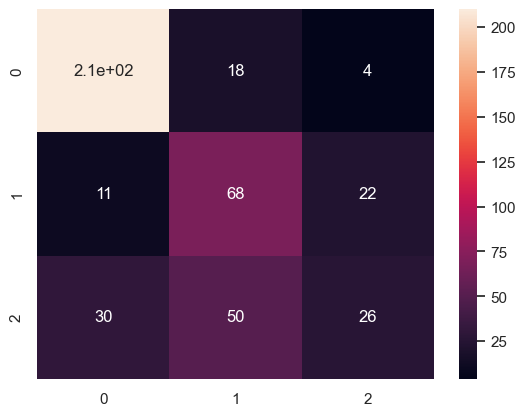

In [340]:
all_models3.logistic_regression()

accuracy_score_kn_neighbors_train=  0.9240867579908676
accuracy_score_kn_neighbors_test=  0.8451025056947609


precision_score_kn_neighbors_train=  0.92490053565937
precision_score_kn_neighbors_test=  0.8463532348704809


recall_score_kn_neighbors_train=  0.9240867579908676
recall_score_kn_neighbors_test=  0.8451025056947609


accuracy_score_kn_neighbors_cross=  0.8744155844155845
precision_score_kn_neighbors_cross=  0.8758049187153473
recall_score_kn_neighbors_cross=  0.8744155844155845

confusion_matrix:-




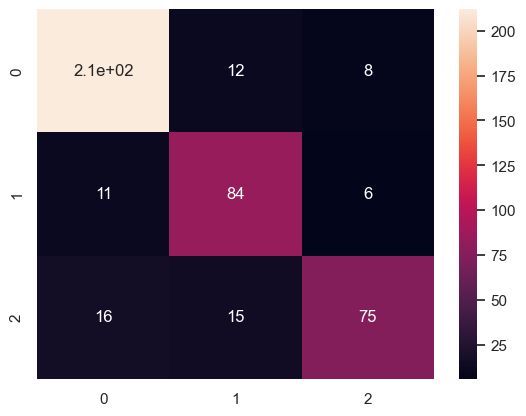

In [341]:
all_models3.knearestneighbors()

accuracy_score_svc_train=  0.7146118721461188
accuracy_score_svc_test=  0.6651480637813212


precision_score_svc_train=  0.7069670571255752
precision_score_svc_test=  0.6508662046802898


recall_score_svc_train=  0.7146118721461188
recall_score_svc_test=  0.6651480637813212


accuracy_score_svc_cross=  0.6883571428571429
precision_score_svc_cross=  0.679034884308179
recall_score_svc_cross=  0.6883571428571429

confusion_matrix:-




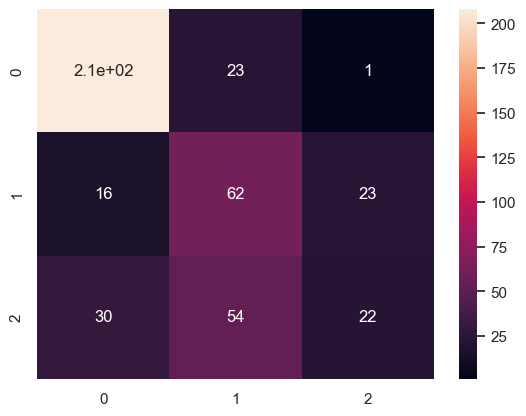

In [342]:
all_models3.Svc()       

accuracy_score_nbc_train=  0.591324200913242
accuracy_score_nbc_test=  0.5239179954441914


precision_score_nbc_train=  0.6662045340022457
precision_score_nbc_test=  0.35862104595730687


recall_score_nbc_train=  0.591324200913242
recall_score_nbc_test=  0.5239179954441914


accuracy_score_nbc_cross=  0.5907467532467533
precision_score_nbc_cross=  0.44537754423779996
recall_score_nbc_cross=  0.5907467532467533

confusion_matrix:-




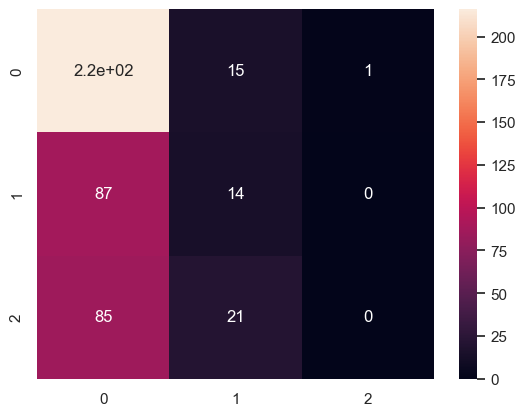

In [343]:
all_models3.naive_bayes()

accuracy_score_dtc_train=  1.0
accuracy_score_dtc_test=  0.9020501138952164


precision_score_dtc_train=  1.0
precision_score_dtc_test=  0.9024899218323007


recall_score_dtc_train=  1.0
recall_score_dtc_test=  0.9020501138952164


accuracy_score_dtc_cross=  0.9138418079096043
precision_score_dtc_cross=  0.9045093350395179
recall_score_dtc_cross=  0.9035681818181818

confusion_matrix:-




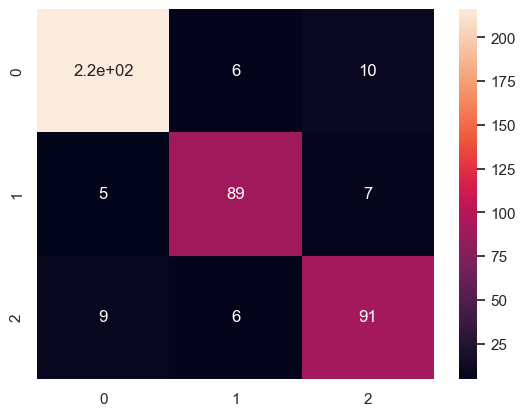

In [344]:
all_models3.decision_tree()

accuracy_score_rfc_train=  1.0
accuracy_score_rfc_test=  0.929384965831435


precision_score_rfc_train=  1.0
precision_score_rfc_test=  0.9290443021732071


recall_score_rfc_train=  1.0
recall_score_rfc_test=  0.929384965831435


accuracy_score_rfc_cross=  0.9412305194805194
precision_score_rfc_cross=  0.9425476872772917
recall_score_rfc_cross=  0.9412305194805194

confusion_matrix:-




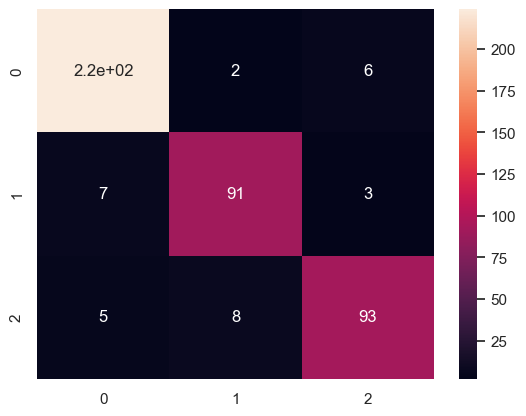

In [345]:
all_models3.random_forest()

In [346]:
all_models3.best_model()

accuracy           precision              recall          
      train      test     train      test     train      test
0  0.724886  0.692483  0.705803  0.677912  0.724886  0.692483
1  0.924087  0.845103  0.924901  0.846353  0.924087  0.845103
2  0.714612  0.665148  0.706967  0.650866  0.714612  0.665148
3  0.591324  0.523918  0.666205  0.358621  0.591324  0.523918
4  1.000000  0.902050  1.000000  0.902490  1.000000  0.902050
5  1.000000  0.929385  1.000000  0.929044  1.000000  0.929385

In [347]:
print("knn= ",round(0.846353,4))

knn=  0.8464


In [348]:
knn=KNeighborsClassifier(n_neighbors=7,p=2)
knn.fit(train_x,train_y)

KNeighborsClassifier(n_neighbors=7)

In [349]:
pred_test_y=knn.predict(test_x)

In [350]:
target3_15_pred_values=pred_test_y

In [351]:
round((target_15_4.value_counts(normalize=True)),4)

Hydraulic_Accumulator
90.0     0.3688
130.0    0.2670
115.0    0.1821
100.0    0.1821
Name: proportion, dtype: float64

In [352]:
train_x,test_x,train_y,test_y=train_test_split(x_15,target_15_4,test_size=0.2,random_state=1)

In [353]:
train_x=sc.fit_transform(train_x)
test_x=sc.transform(test_x)

In [354]:
all_models4=Multiclass_Classification_Models(train_x,test_x,train_y,test_y)

accuracy_score_log_reg_train=  0.6375570776255708
accuracy_score_log_reg_test=  0.5945330296127562


precision_score_log_reg_train=  0.6114989644741352
precision_score_log_reg_test=  0.5660216468872504


recall_score_log_reg_train=  0.6375570776255708
recall_score_log_reg_test=  0.5945330296127562


accuracy_score_log_reg_cross=  0.6284383116883118
precision_score_log_reg_cross=  0.604618177420798
recall_score_log_reg_cross=  0.6284383116883118

confusion_matrix:-




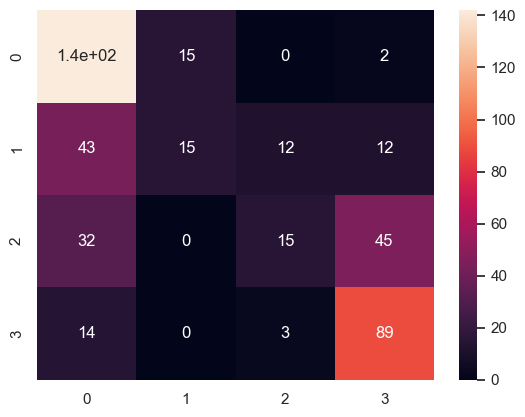

In [355]:
all_models4.logistic_regression()

accuracy_score_kn_neighbors_train=  0.9434931506849316
accuracy_score_kn_neighbors_test=  0.9271070615034168


precision_score_kn_neighbors_train=  0.9437764250238682
precision_score_kn_neighbors_test=  0.9277383729885978


recall_score_kn_neighbors_train=  0.9434931506849316
recall_score_kn_neighbors_test=  0.9271070615034168


accuracy_score_kn_neighbors_cross=  0.9178051948051948
precision_score_kn_neighbors_cross=  0.9199005359958841
recall_score_kn_neighbors_cross=  0.9178051948051948

confusion_matrix:-




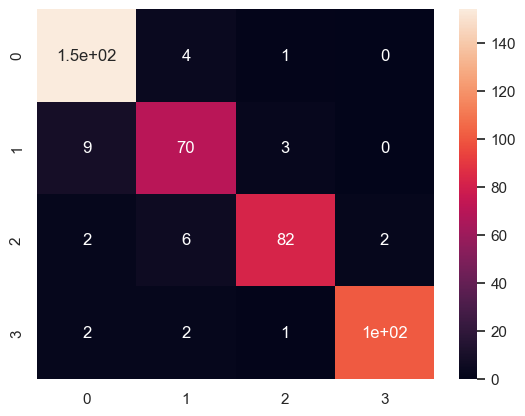

In [356]:
all_models4.knearestneighbors()

accuracy_score_svc_train=  0.5924657534246576
accuracy_score_svc_test=  0.5763097949886105


precision_score_svc_train=  0.6635920803677962
precision_score_svc_test=  0.6515771482679843


recall_score_svc_train=  0.5924657534246576
recall_score_svc_test=  0.5763097949886105


accuracy_score_svc_cross=  0.5828181818181818
precision_score_svc_cross=  0.6490880010664201
recall_score_svc_cross=  0.5828181818181818

confusion_matrix:-




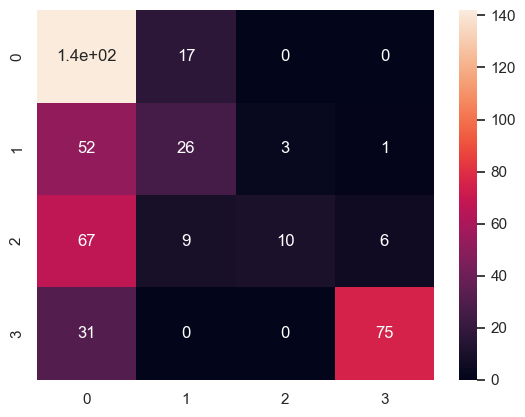

In [357]:
all_models4.Svc()

accuracy_score_nbc_train=  0.3984018264840183
accuracy_score_nbc_test=  0.3690205011389522


precision_score_nbc_train=  0.3358782427611588
precision_score_nbc_test=  0.30420347093623507


recall_score_nbc_train=  0.3984018264840183
recall_score_nbc_test=  0.3690205011389522


accuracy_score_nbc_cross=  0.3978701298701298
precision_score_nbc_cross=  0.33829924340196793
recall_score_nbc_cross=  0.3978701298701298

confusion_matrix:-




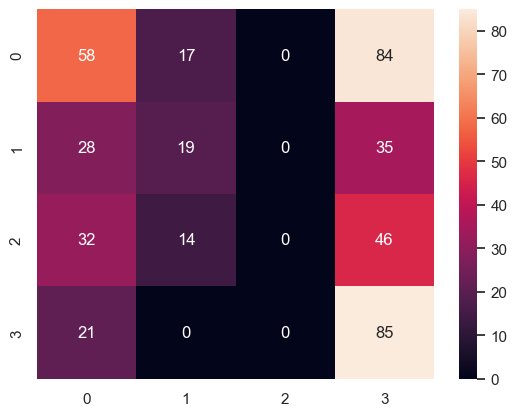

In [358]:
all_models4.naive_bayes()          #not accepted

accuracy_score_dtc_train=  1.0
accuracy_score_dtc_test=  0.9407744874715261


precision_score_dtc_train=  1.0
precision_score_dtc_test=  0.9417023674327035


recall_score_dtc_train=  1.0
recall_score_dtc_test=  0.9407744874715261


accuracy_score_dtc_cross=  0.9138418079096043
precision_score_dtc_cross=  0.936689123984779
recall_score_dtc_cross=  0.9354837662337664

confusion_matrix:-




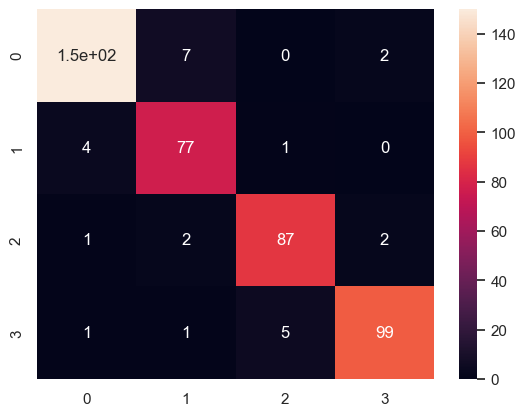

In [359]:
all_models4.decision_tree()

accuracy_score_rfc_train=  1.0
accuracy_score_rfc_test=  0.9726651480637813


precision_score_rfc_train=  1.0
precision_score_rfc_test=  0.972854830268069


recall_score_rfc_train=  1.0
recall_score_rfc_test=  0.9726651480637813


accuracy_score_rfc_cross=  0.9680292207792206
precision_score_rfc_cross=  0.9691744641700073
recall_score_rfc_cross=  0.9680292207792206

confusion_matrix:-




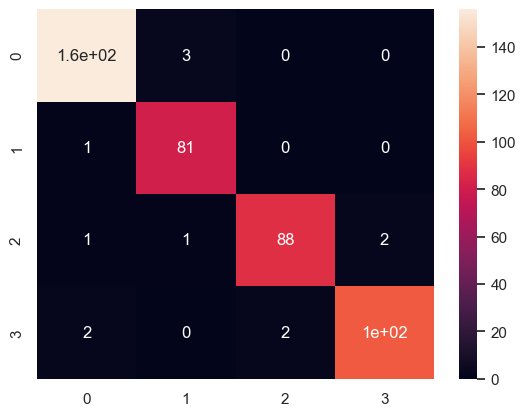

In [360]:
all_models4.random_forest()

In [361]:
all_models4.best_model()

accuracy           precision              recall          
      train      test     train      test     train      test
0  0.637557  0.594533  0.611499  0.566022  0.637557  0.594533
1  0.943493  0.927107  0.943776  0.927738  0.943493  0.927107
2  0.592466  0.576310  0.663592  0.651577  0.592466  0.576310
3  0.398402  0.369021  0.335878  0.304203  0.398402  0.369021
4  1.000000  0.940774  1.000000  0.941702  1.000000  0.940774
5  1.000000  0.972665  1.000000  0.972855  1.000000  0.972665

In [362]:
print("knn= ",round(0.927738,4))

knn=  0.9277


In [363]:
knn=KNeighborsClassifier(n_neighbors=7,p=2)
knn.fit(train_x,train_y)

KNeighborsClassifier(n_neighbors=7)

In [364]:
pred_test_y=knn.predict(test_x)

In [365]:
target4_15_pred_values=pred_test_y

In [366]:
final_target_15.value_counts(normalize=True)

Stable_Flag
0    0.661342
1    0.338658
Name: proportion, dtype: float64

In [367]:
y_15_ind=y_15
y_15_ind

,Cooler_Condition,Valve_Condition,Internal_Pump_Leakage,Hydraulic_Accumulator
0,3.0,100.0,0.0,130.0
1,3.0,100.0,0.0,130.0
2,3.0,100.0,0.0,130.0
3,3.0,100.0,0.0,130.0
4,3.0,100.0,0.0,130.0
...,...,...,...,...
2186,100.0,100.0,0.0,90.0
2187,100.0,100.0,0.0,90.0
2188,100.0,100.0,0.0,90.0
2189,100.0,100.0,0.0,90.0


In [368]:
train_x,test_x,train_y,test_y=train_test_split(y_15_ind,final_target_15,test_size=0.2,random_state=1,stratify=final_target_15)

In [369]:
train_x=sc.fit_transform(train_x)
test_x=sc.transform(test_x)

In [370]:
all_models5=Singleclass_Classification_Models(train_x,test_x,train_y,test_y)

accuracy_score_log_reg_train=  0.9297945205479452
accuracy_score_log_reg_test=  0.9316628701594533


precision_score_log_reg_train=  0.8486646884272997
precision_score_log_reg_test=  0.8439306358381503


recall_score_log_reg_train=  0.9645868465430016
recall_score_log_reg_test=  0.9798657718120806


accuracy_score_log_reg_cross=  0.9298051948051949
precision_score_log_reg_cross=  0.8501273998483624
recall_score_log_reg_cross=  0.964632768361582

confusion_matrix:-




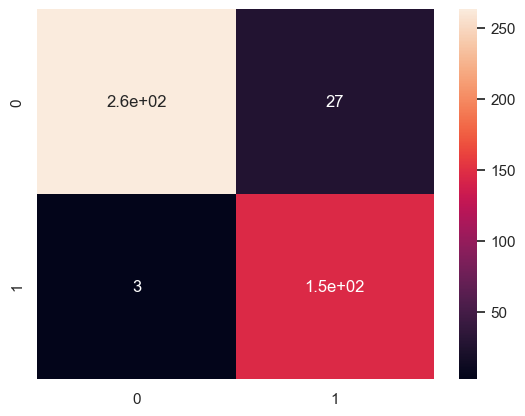

In [371]:
all_models5.logistic_regression()

In [372]:
l_classifier=LogisticRegression(random_state=1)
l_classifier.fit(train_x,train_y)

LogisticRegression(random_state=1)

In [373]:
metrics.roc_auc_score(test_y,l_classifier.predict_proba(test_x)[:,1])

0.9609118259662115

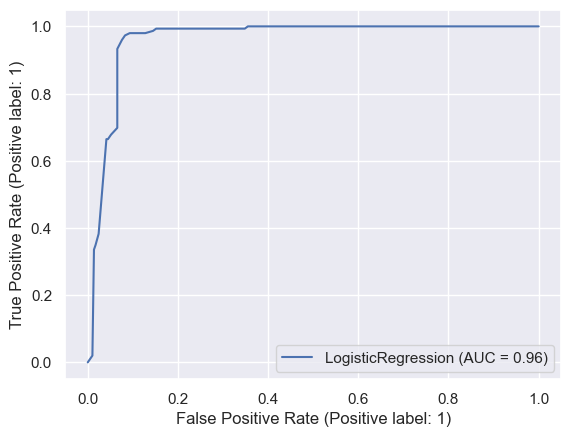

In [374]:
from sklearn.metrics import RocCurveDisplay

# Assuming l_classifier is the trained classifier and test_x, test_y are the test dataset
RocCurveDisplay.from_estimator(l_classifier, test_x, test_y)

# Optionally, display the plot
import matplotlib.pyplot as plt
plt.show()


accuracy_score_kn_neighbors_train=  0.9292237442922374
accuracy_score_kn_neighbors_test=  0.9248291571753986


precision_score_kn_neighbors_train=  0.88379705400982
precision_score_kn_neighbors_test=  0.881578947368421


recall_score_kn_neighbors_train=  0.9106239460370995
recall_score_kn_neighbors_test=  0.8993288590604027


accuracy_score_kn_neighbors_cross=  0.920107142857143
precision_score_kn_neighbors_cross=  0.8713363493708035
recall_score_kn_neighbors_cross=  0.9005367231638418

confusion_matrix:-




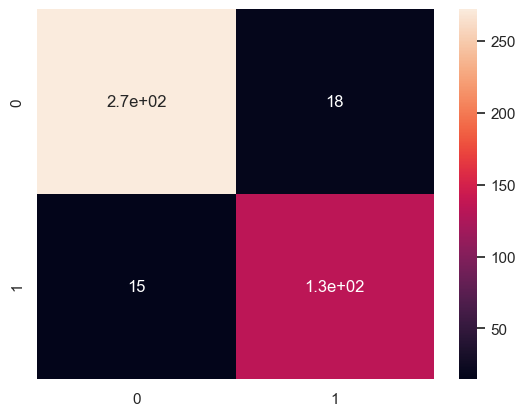

In [375]:
all_models5.knearestneighbors()

In [376]:
knn=KNeighborsClassifier(n_neighbors=7,p=2)
knn.fit(train_x,train_y)

KNeighborsClassifier(n_neighbors=7)

In [377]:
metrics.roc_auc_score(test_y,knn.predict_proba(test_x)[:,1])

0.9679703772274937

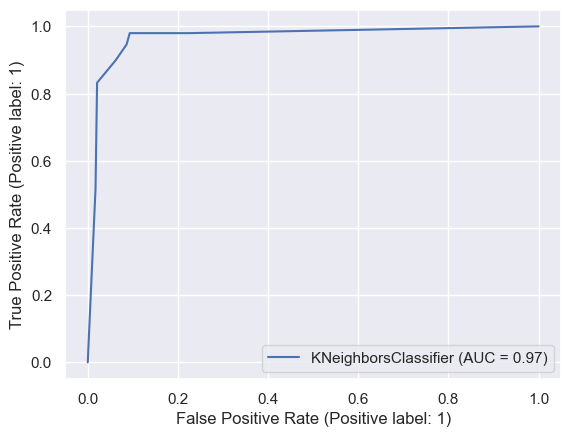

In [378]:
from sklearn.metrics import RocCurveDisplay

# Assuming knn is the trained classifier and test_x, test_y are the test dataset
RocCurveDisplay.from_estimator(knn, test_x, test_y)

# Optionally, display the plot
import matplotlib.pyplot as plt
plt.show()


accuracy_score_svc_train=  0.9297945205479452
accuracy_score_svc_test=  0.9316628701594533


precision_score_svc_train=  0.8486646884272997
precision_score_svc_test=  0.8439306358381503


recall_score_svc_train=  0.9645868465430016
recall_score_svc_test=  0.9798657718120806


accuracy_score_svc_cross=  0.9298051948051949
precision_score_svc_cross=  0.8501273998483624
recall_score_svc_cross=  0.964632768361582

confusion_matrix:-




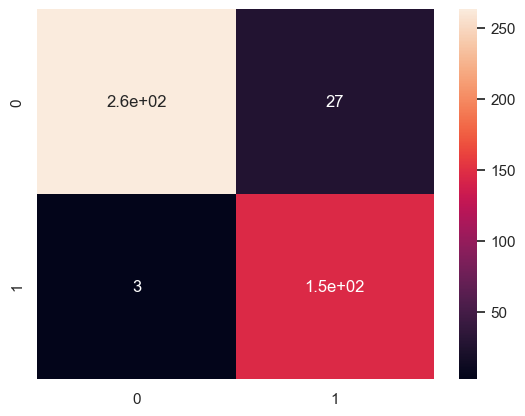

In [379]:
all_models5.Svc()      

In [380]:
svc=SVC(kernel="linear",probability=True)
svc.fit(train_x,train_y)

SVC(kernel='linear', probability=True)

In [381]:
metrics.roc_auc_score(test_y,svc.predict_proba(test_x)[:,1])

0.9474890071742652

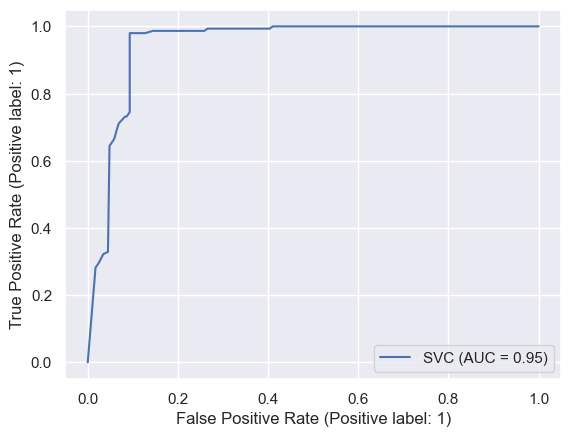

In [382]:
from sklearn.metrics import RocCurveDisplay

# Assuming svc is the trained classifier and test_x, test_y are the test dataset
RocCurveDisplay.from_estimator(svc, test_x, test_y)

# Optionally, display the plot
import matplotlib.pyplot as plt
plt.show()


accuracy_score_nbc_train=  0.8835616438356164
accuracy_score_nbc_test=  0.8701594533029613


precision_score_nbc_train=  0.7509677419354839
precision_score_nbc_test=  0.7254901960784313


recall_score_nbc_train=  0.9814502529510961
recall_score_nbc_test=  0.9932885906040269


accuracy_score_nbc_cross=  0.8835681818181819
precision_score_nbc_cross=  0.7524232487074374
recall_score_nbc_cross=  0.9814689265536722

confusion_matrix:-




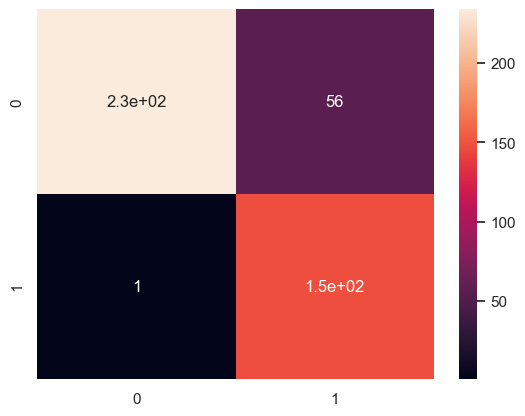

In [383]:
all_models5.naive_bayes()

accuracy_score_dtc_train=  0.9309360730593608
accuracy_score_dtc_test=  0.9202733485193622


precision_score_dtc_train=  0.8757961783439491
precision_score_dtc_test=  0.8653846153846154


recall_score_dtc_train=  0.927487352445194
recall_score_dtc_test=  0.9060402684563759


accuracy_score_dtc_cross=  0.9138418079096043
precision_score_dtc_cross=  0.8648257681210747
recall_score_dtc_cross=  0.9005649717514123

confusion_matrix:-




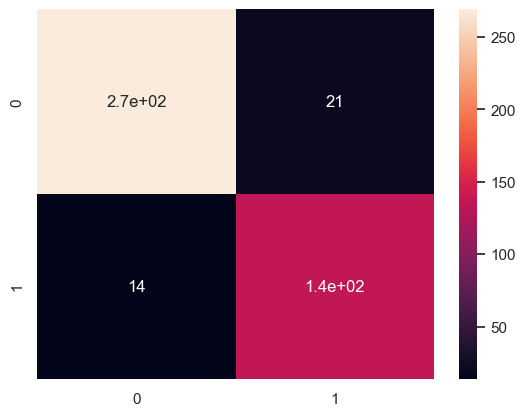

In [384]:
all_models5.decision_tree()

accuracy_score_rfc_train=  0.9309360730593608
accuracy_score_rfc_test=  0.9202733485193622


precision_score_rfc_train=  0.8757961783439491
precision_score_rfc_test=  0.8653846153846154


recall_score_rfc_train=  0.927487352445194
recall_score_rfc_test=  0.9060402684563759


accuracy_score_rfc_cross=  0.9229642857142857
precision_score_rfc_cross=  0.8621951026732271
recall_score_rfc_cross=  0.9225141242937852

confusion_matrix:-




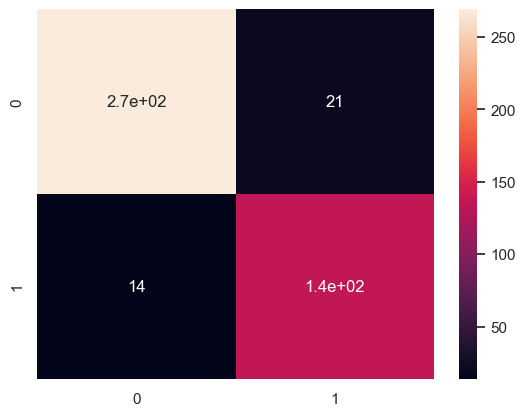

In [385]:
all_models5.random_forest()

In [386]:
all_models5.best_model()

accuracy           precision              recall          
      train      test     train      test     train      test
0  0.929795  0.931663  0.848665  0.843931  0.964587  0.979866
1  0.929224  0.924829  0.883797  0.881579  0.910624  0.899329
2  0.929795  0.931663  0.848665  0.843931  0.964587  0.979866
3  0.883562  0.870159  0.750968  0.725490  0.981450  0.993289
4  0.930936  0.920273  0.875796  0.865385  0.927487  0.906040
5  0.930936  0.920273  0.875796  0.865385  0.927487  0.906040

In [387]:
print("knearestneighbors_cl= ",round(0.903448,4))

knearestneighbors_cl=  0.9034


In [388]:
#line 400 error

In [389]:
print(len(target1_15_pred_values))
print(len(target2_15_pred_values))
print(len(target3_15_pred_values))
print(len(target4_15_pred_values))


441
439
439
439


In [392]:
min_length = min(len(target1_15_pred_values), len(target2_15_pred_values), 
                 len(target3_15_pred_values), len(target4_15_pred_values))

target1_15_pred_values = target1_15_pred_values[:min_length]


In [393]:
df_final_data_testing_final_target15=pd.DataFrame({"Cooler_Condition":target1_15_pred_values,"Valve_Condition":target2_15_pred_values
                                                 ,"Internal_Pump_Leakage":target3_15_pred_values,"Hydraulic_Accumulator":target4_15_pred_values})

In [394]:
df_final_data_testing_final_target15.head()

,Cooler_Condition,Valve_Condition,Internal_Pump_Leakage,Hydraulic_Accumulator
0,0,0,2,115.0
1,0,0,0,90.0
2,0,0,1,115.0
3,0,0,2,100.0
4,0,0,0,90.0
